In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from matplotlib import gridspec
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
def parse_file_to_dt(fname):
    chrom_states = ["Promoter", "Enhancer", "Transcribed",
                    "PRC_Repressed", "Insulator", "HetChrom_CNV"]
    dt = {k : 1 for k in chrom_states}
    with open(fname, 'r') as fn:
        for line in fn:
            pair = line.strip().split(' ')
            dt[pair[1]] = pair[0]
    return dt

## 1. Посмотреть на то, как изменяются доли ChromHMM от ChIP-Seq до ДНК-частей триад

### ChIP-Seq

In [4]:
dt = {}

for FILE in glob.glob(f"ChromHMM_annotation/ChIP-Seq/WINDOW_2000/*"):
        protein = '_'.join(FILE.split('/')[-1].split('.')[0::2])
        window = FILE.split('/')[-2]
        dt[(protein,window)] = parse_file_to_dt(FILE)
        
chip_df = pd.DataFrame.from_dict(dt).transpose()
chip_df = chip_df.reset_index().rename(columns={"level_0":"PROTEIN", "level_1":"WINDOW"})
del chip_df["WINDOW"]
chip_df = chip_df[chip_df["PROTEIN"].str.endswith("K562")]
chip_df["PROTEIN"] = chip_df.PROTEIN.apply(lambda k: k.split('_')[0] + "_ChIP")
chip_df = chip_df.set_index("PROTEIN").astype("int")
chip_df["s"] = chip_df.sum(axis=1)
chip_df = chip_df.div(chip_df.s, axis=0).iloc[:, :-1]
chip_df

,Promoter,Enhancer,Transcribed,PRC_Repressed,Insulator,HetChrom_CNV
PROTEIN,,,,,,
ZC3H11A_ChIP,0.212240,0.481468,0.155610,0.020781,0.023781,0.106120
CBP_ChIP,0.084215,0.324164,0.191282,0.096064,0.035548,0.268726
HNRNPH_ChIP,0.077586,0.306897,0.300000,0.075862,0.037931,0.201724
U2AF1_ChIP,0.320141,0.456317,0.149533,0.014302,0.011427,0.048280
NONO_ChIP,0.272933,0.515397,0.143318,0.015479,0.012771,0.040102
SAFB_ChIP,0.323061,0.437422,0.136833,0.029990,0.017594,0.055101
CTCF_ChIP,0.103410,0.275037,0.182324,0.072354,0.159770,0.207106
CHD7_ChIP,0.202456,0.408751,0.202648,0.018423,0.014201,0.153521
YBX3_ChIP,0.228075,0.509928,0.172458,0.019489,0.013514,0.056536


### Триады

In [5]:
dt = {}

for FILE in glob.glob(f"ChromHMM_annotation/RNA_WINDOW_100_DNA_WINDOW_2000/*"):
        protein = '_'.join(FILE.split('/')[-1].split('.')[0::2])
        window = FILE.split('/')[-2]
        dt[(protein,window)] = parse_file_to_dt(FILE)
        
triads = pd.DataFrame.from_dict(dt).transpose()
triads = triads.reset_index().rename(columns={"level_0":"PROTEIN", "level_1":"WINDOW"})
del triads["WINDOW"]
triads = triads[triads["PROTEIN"].str.endswith("K562")]
triads["PROTEIN"] = triads.PROTEIN.apply(lambda k: k.split('_')[0] + "_TRIAD")
triads = triads.set_index("PROTEIN").astype("int")
triads["s"] = triads.sum(axis=1)
triads = triads.div(triads.s, axis=0).iloc[:, :-1]

In [6]:
chip_df.to_csv("ChIP-Seq_props.tsv", sep='\t')
triads.to_csv("Triads_props.tsv", sep='\t')

In [5]:
triads.to_csv("../../07_simulations/real_chrom_triads.tsv", sep='\t')

In [6]:
! mkdir pictures

mkdir: cannot create directory ‘pictures’: File exists


0it [00:00, ?it/s]

/tmp/ipykernel_1186877/3561228585.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(20,20))


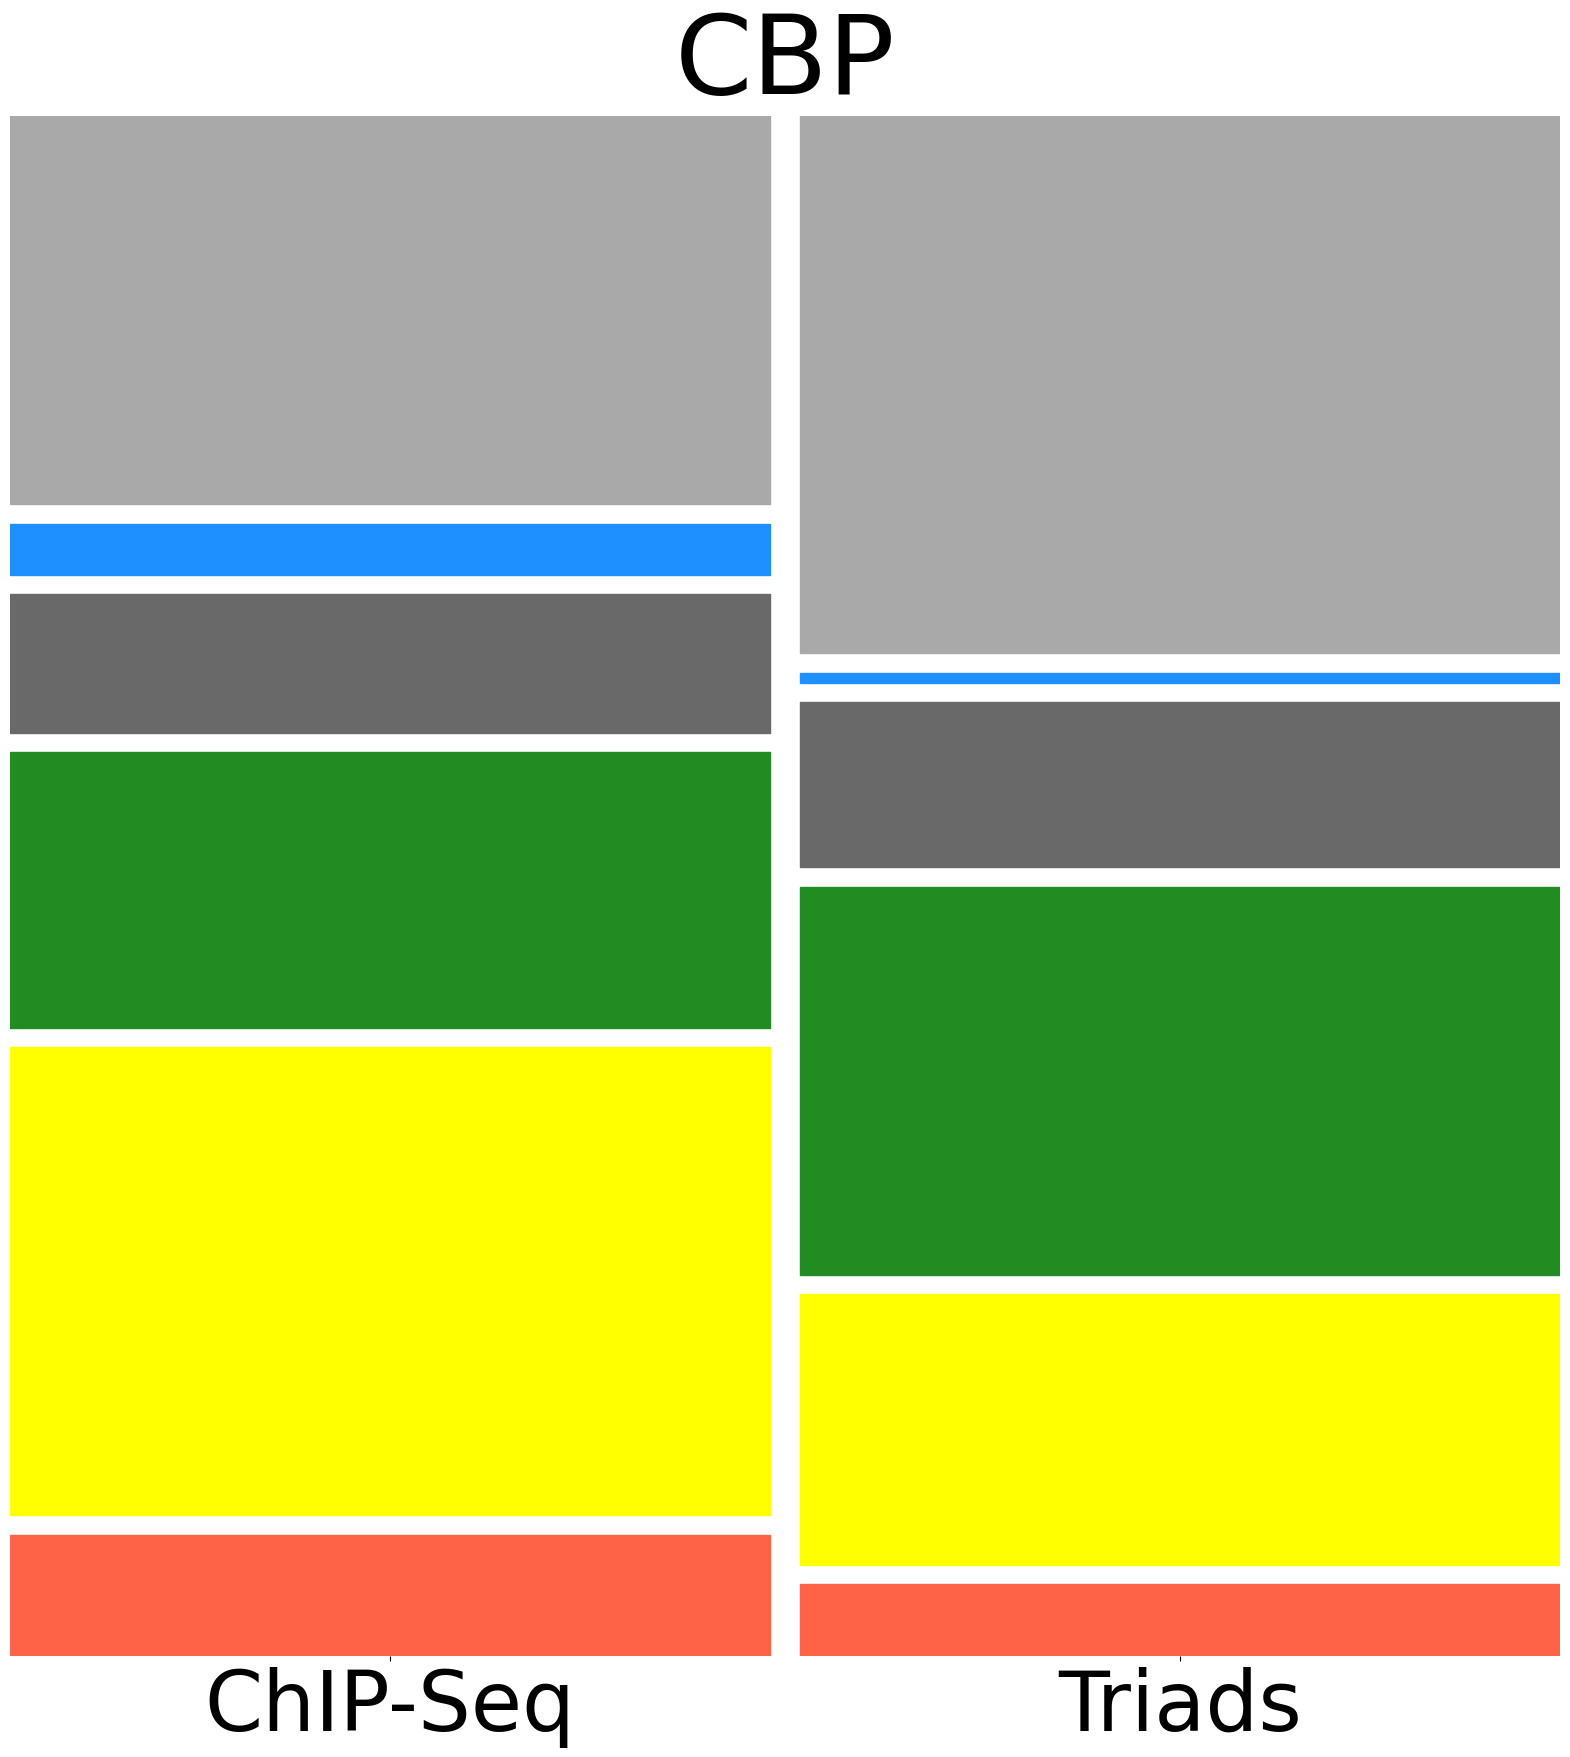

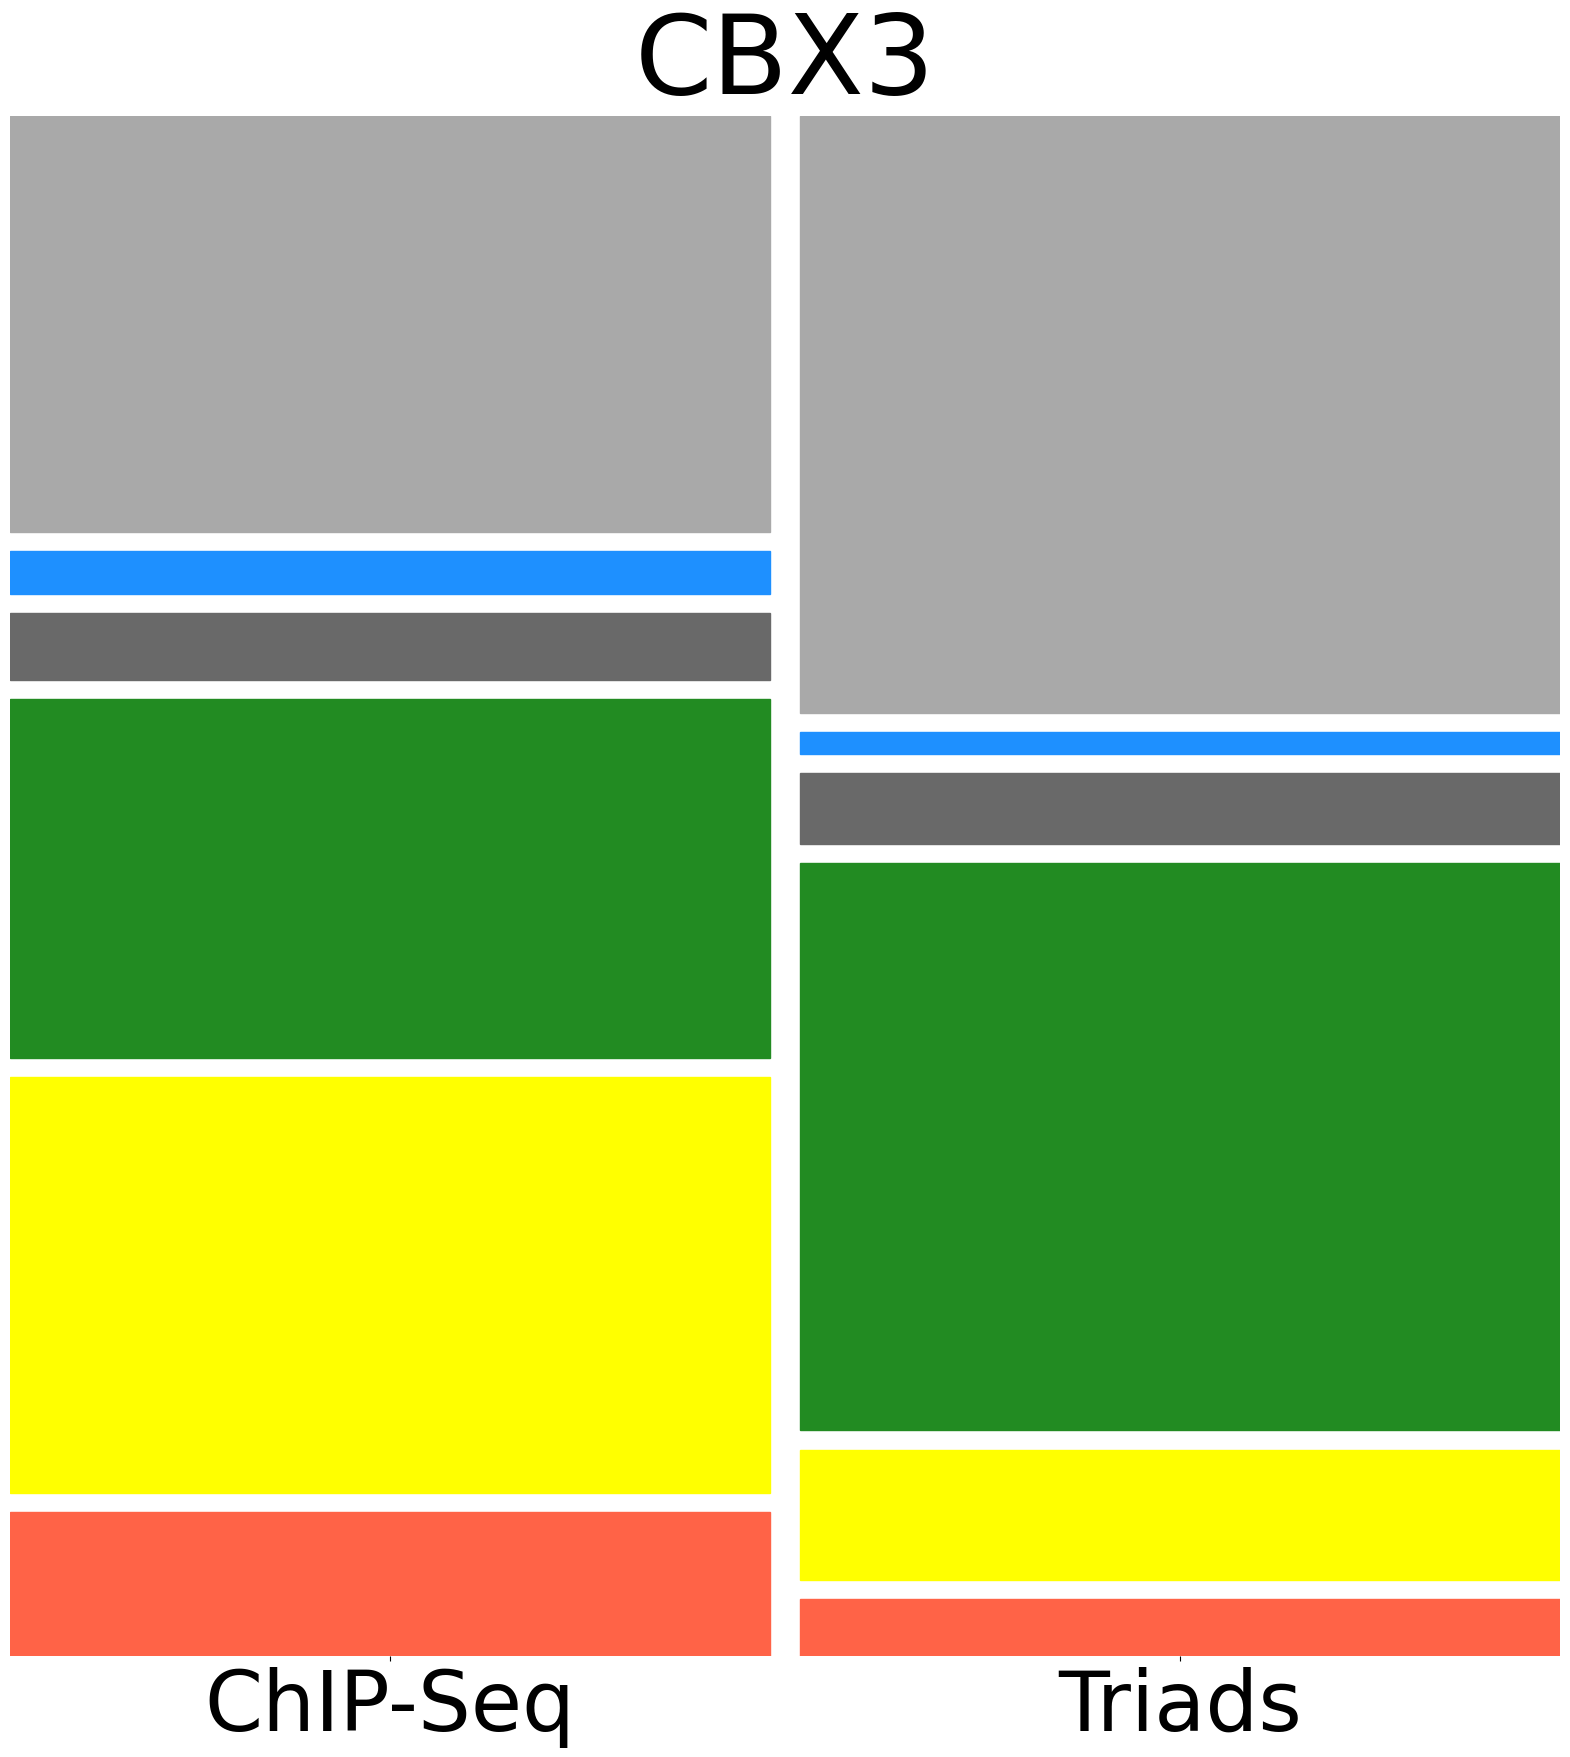

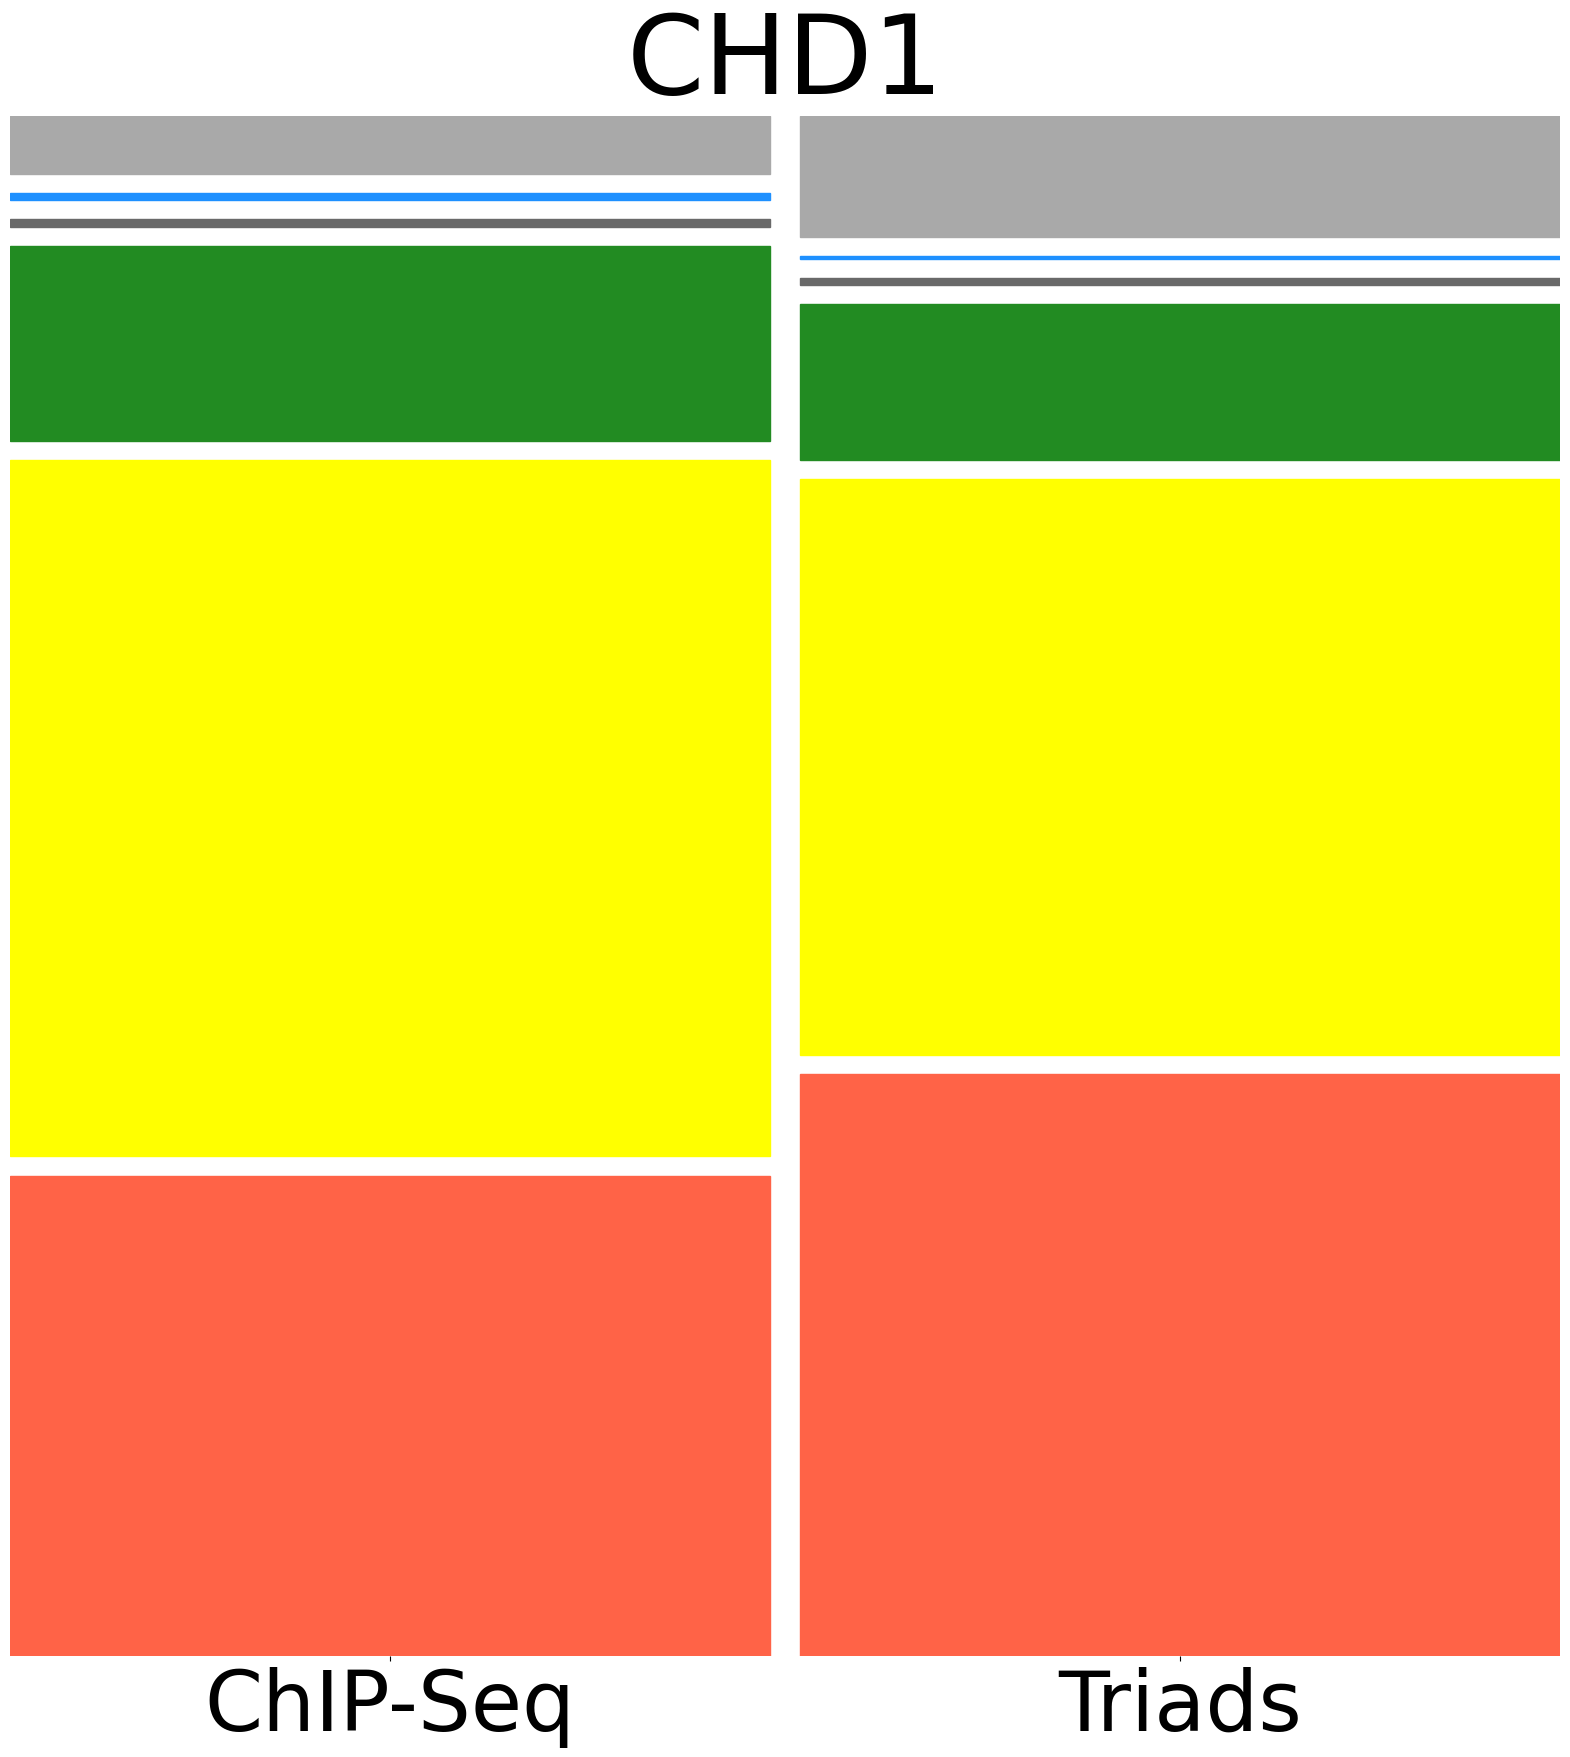

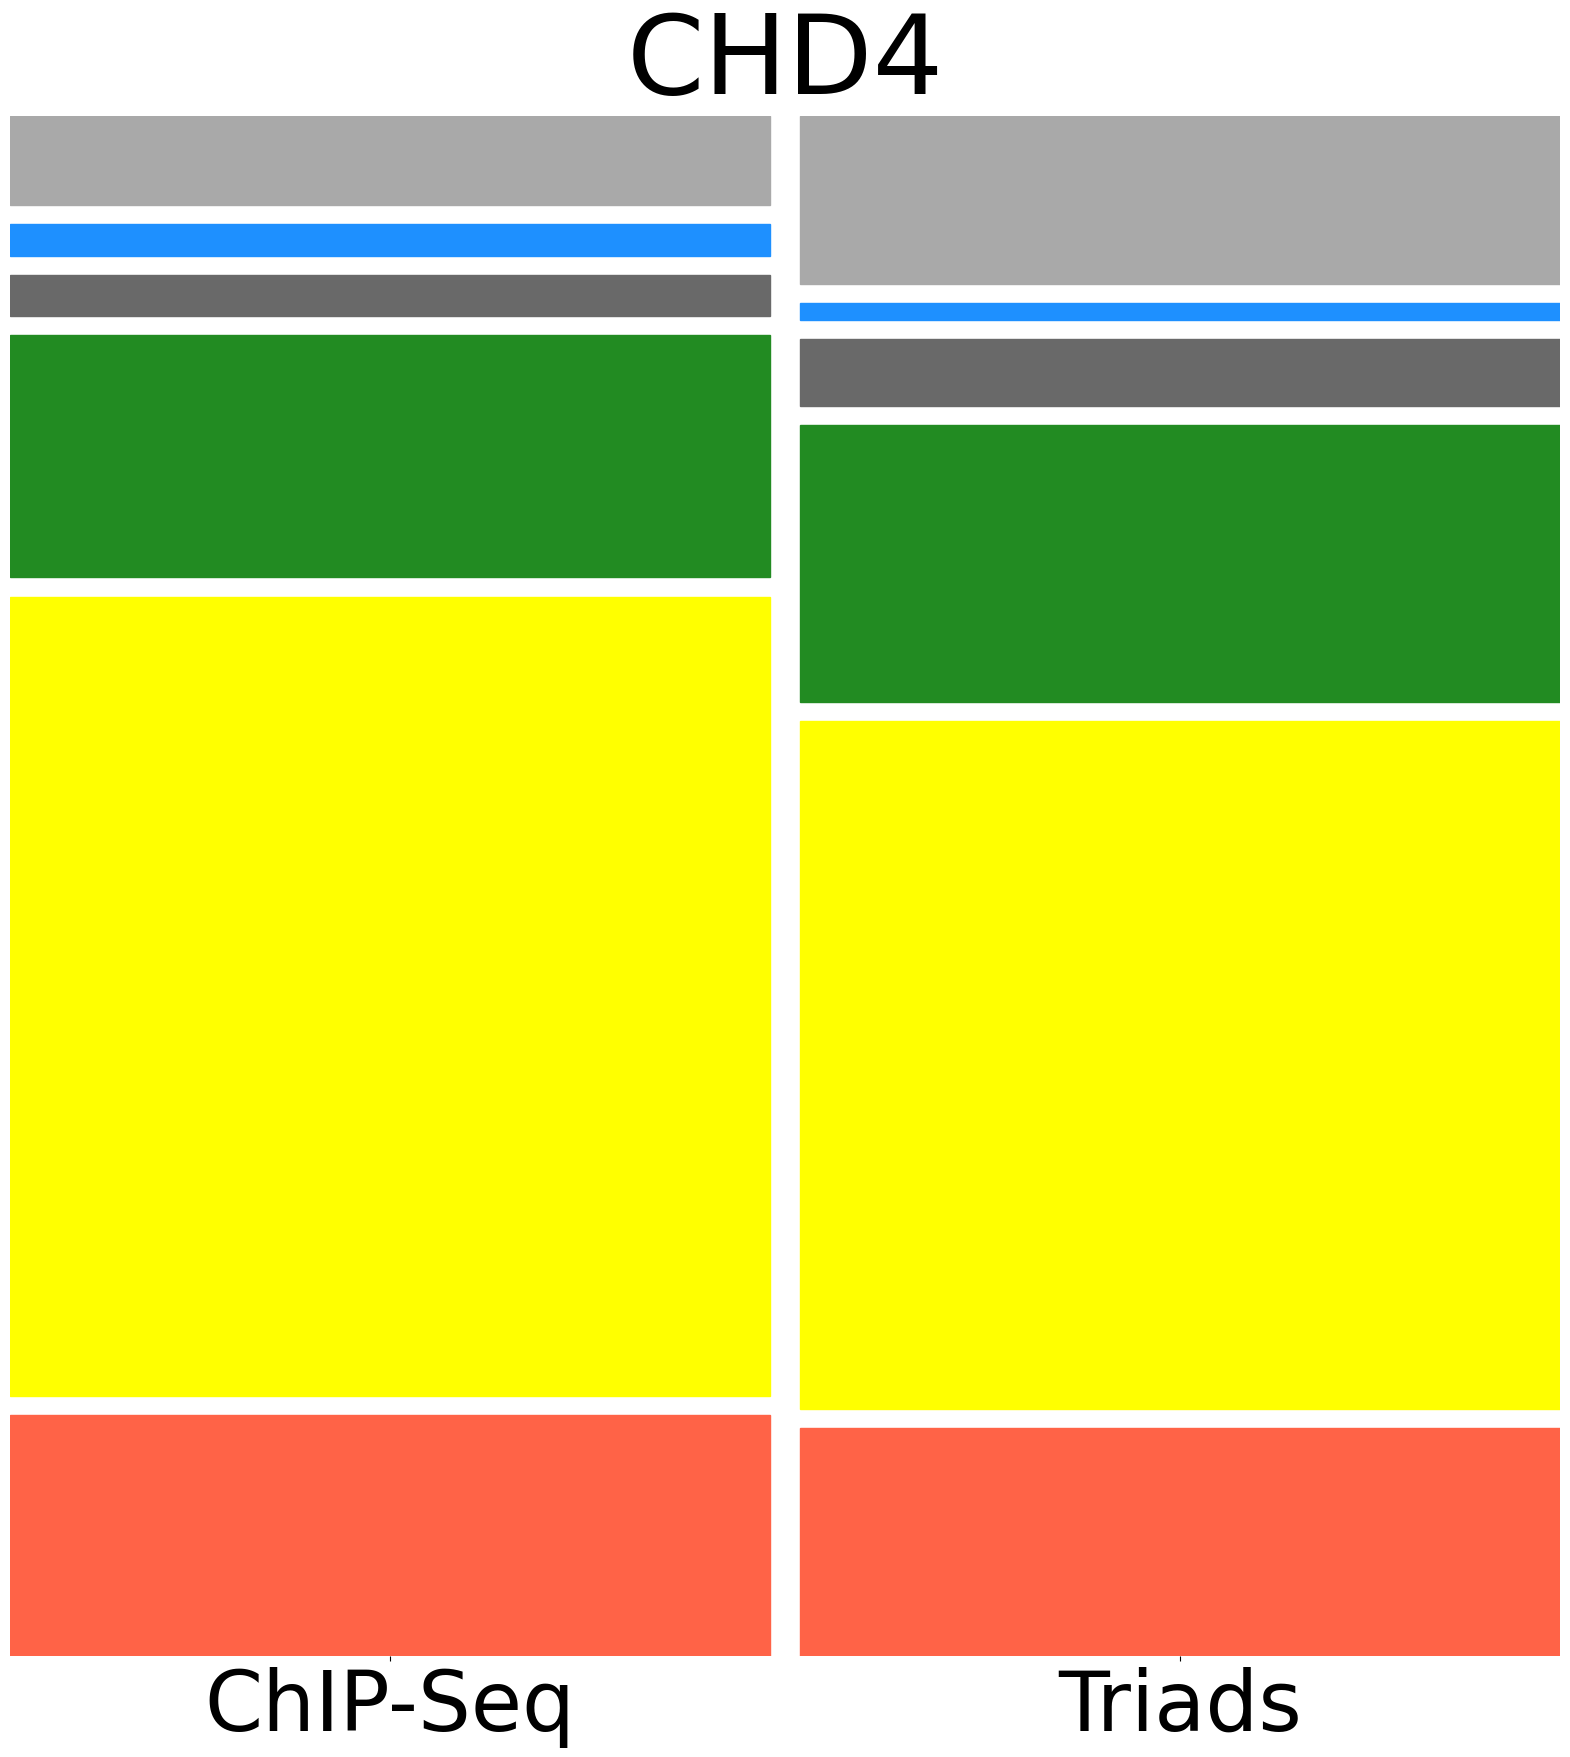

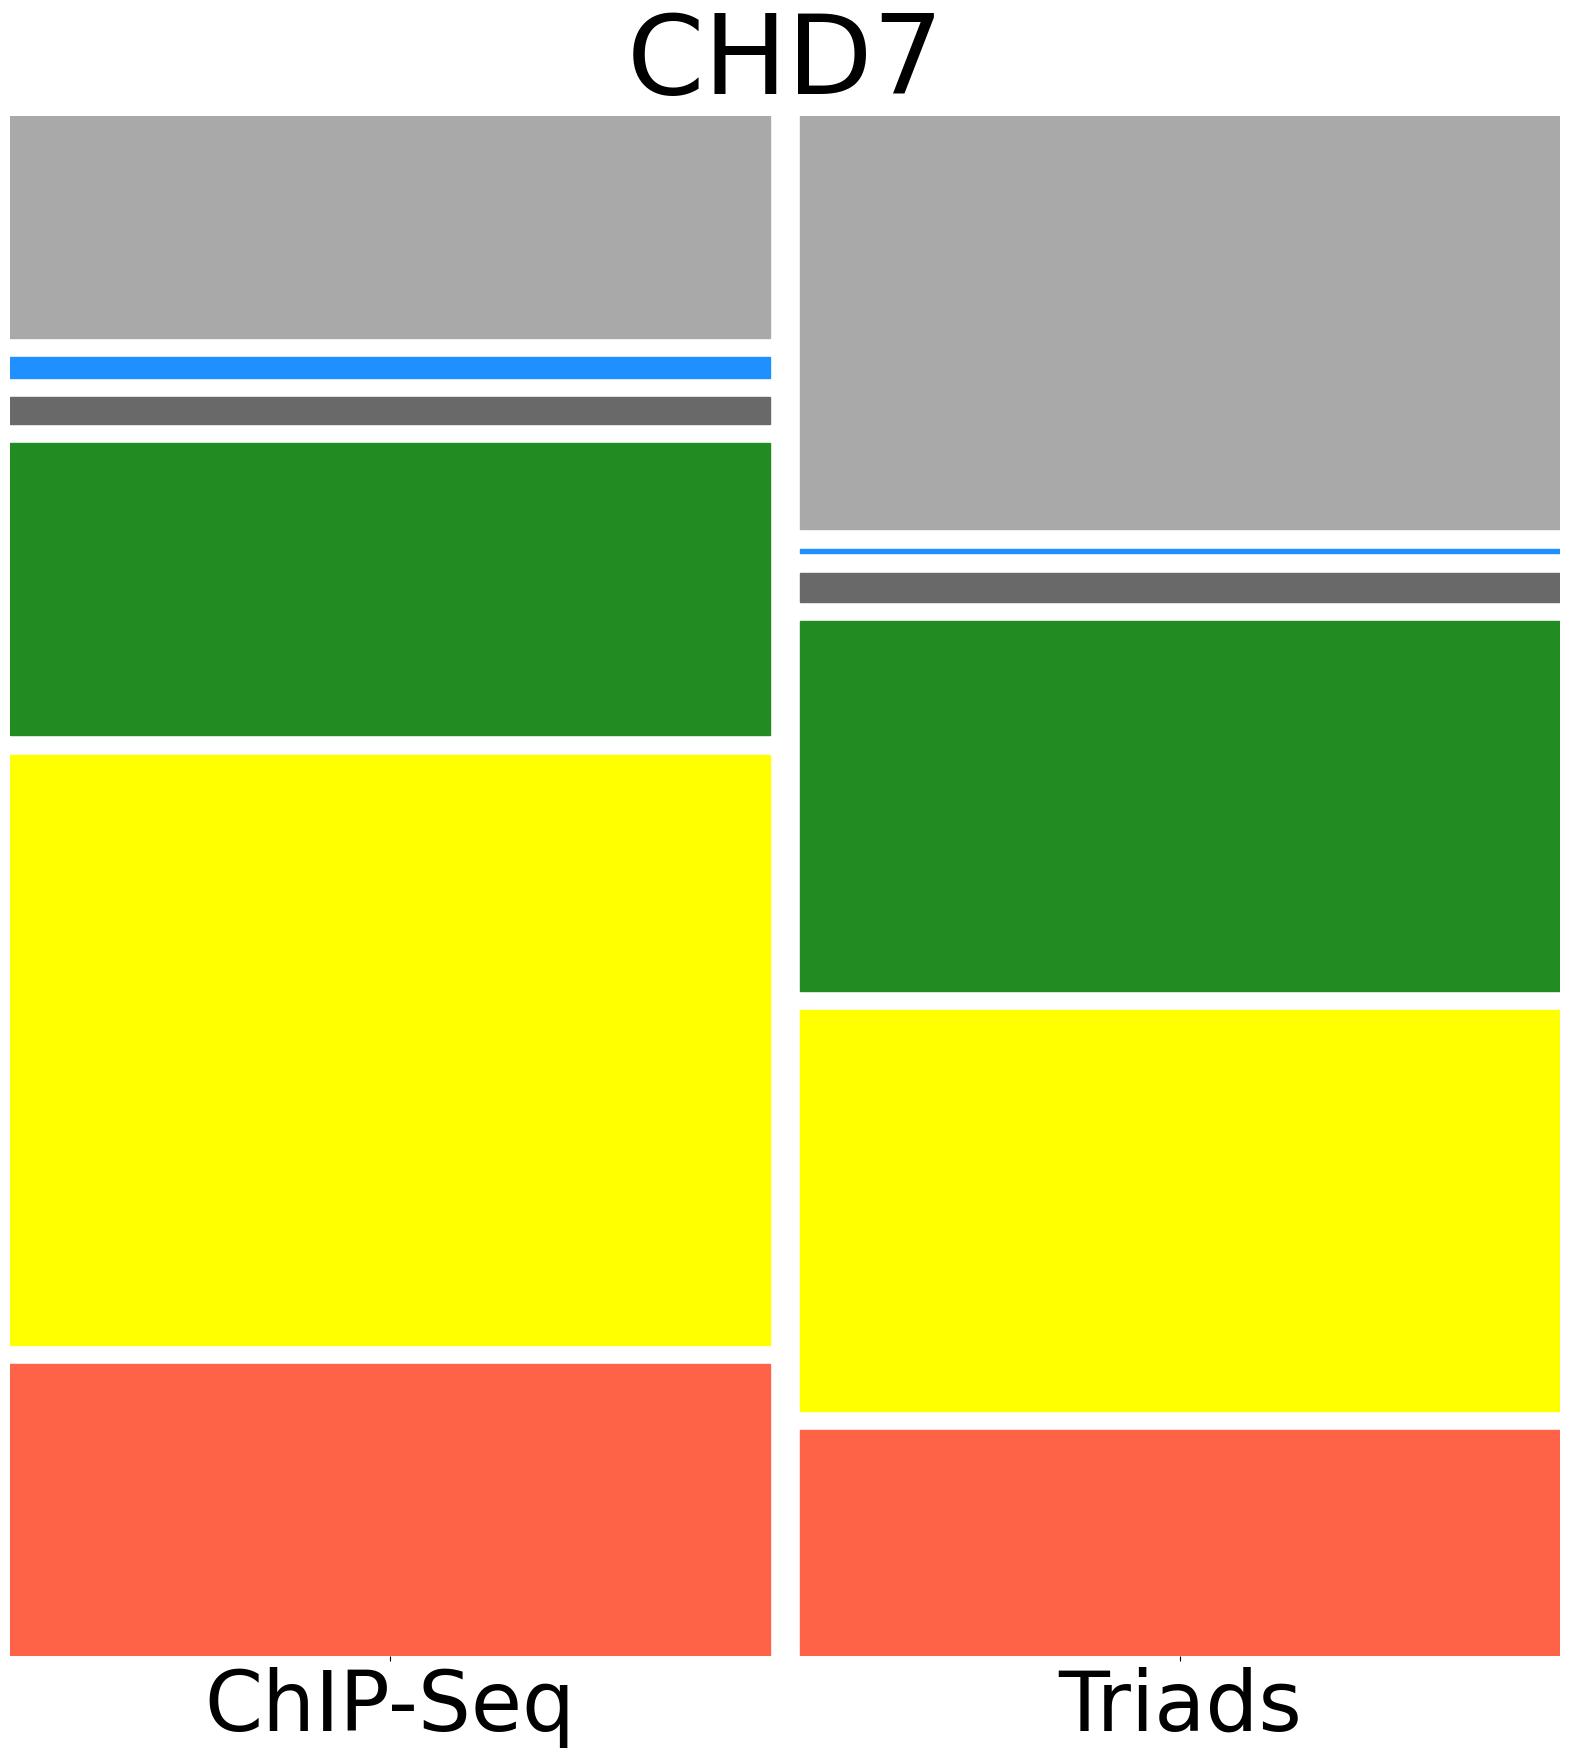

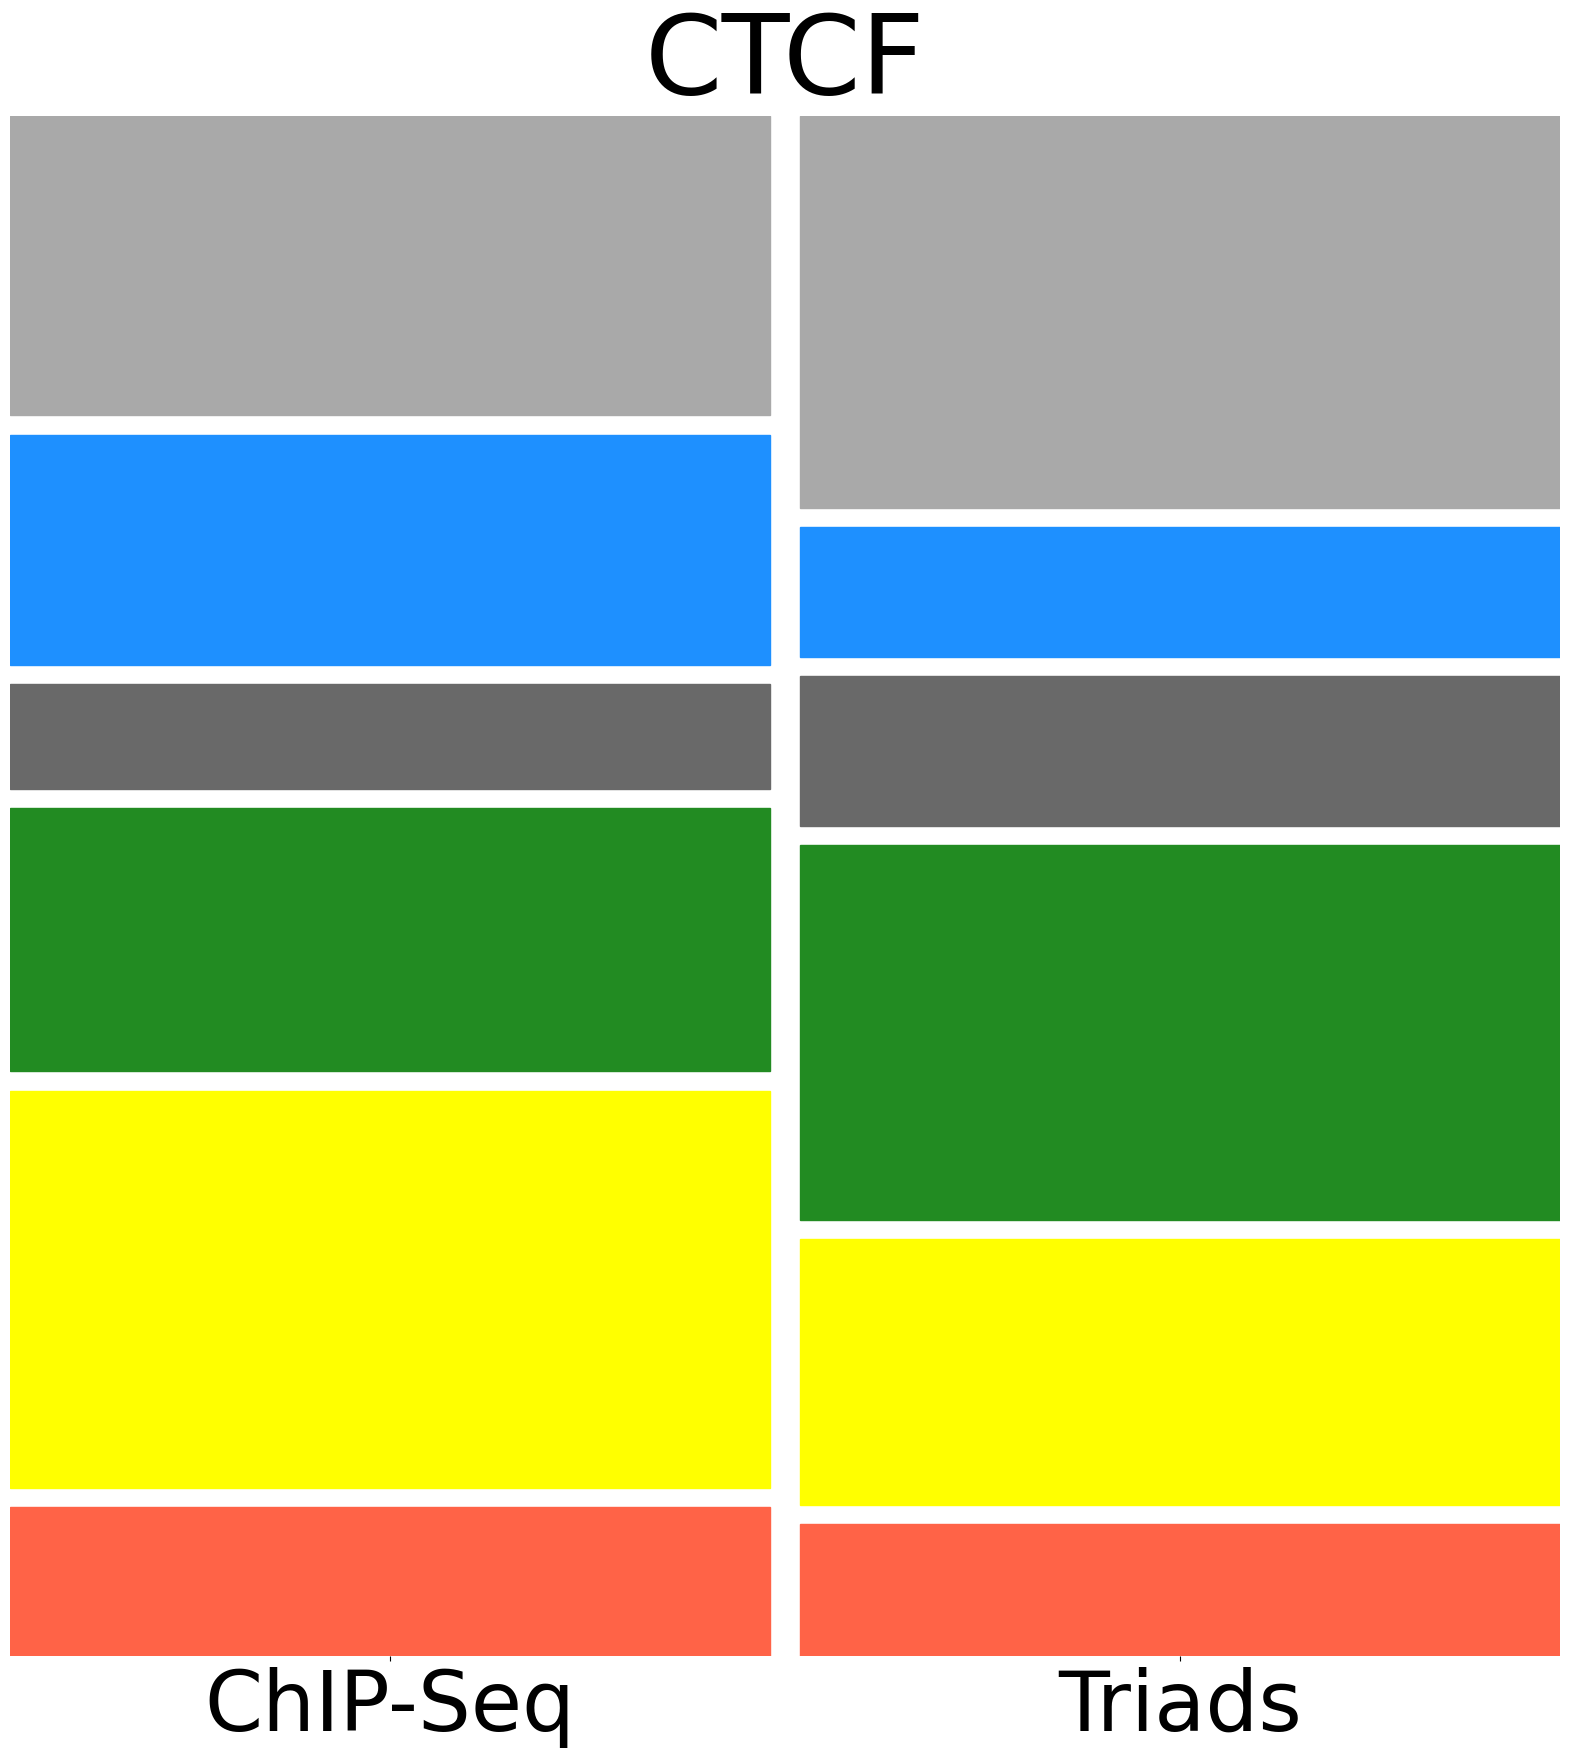

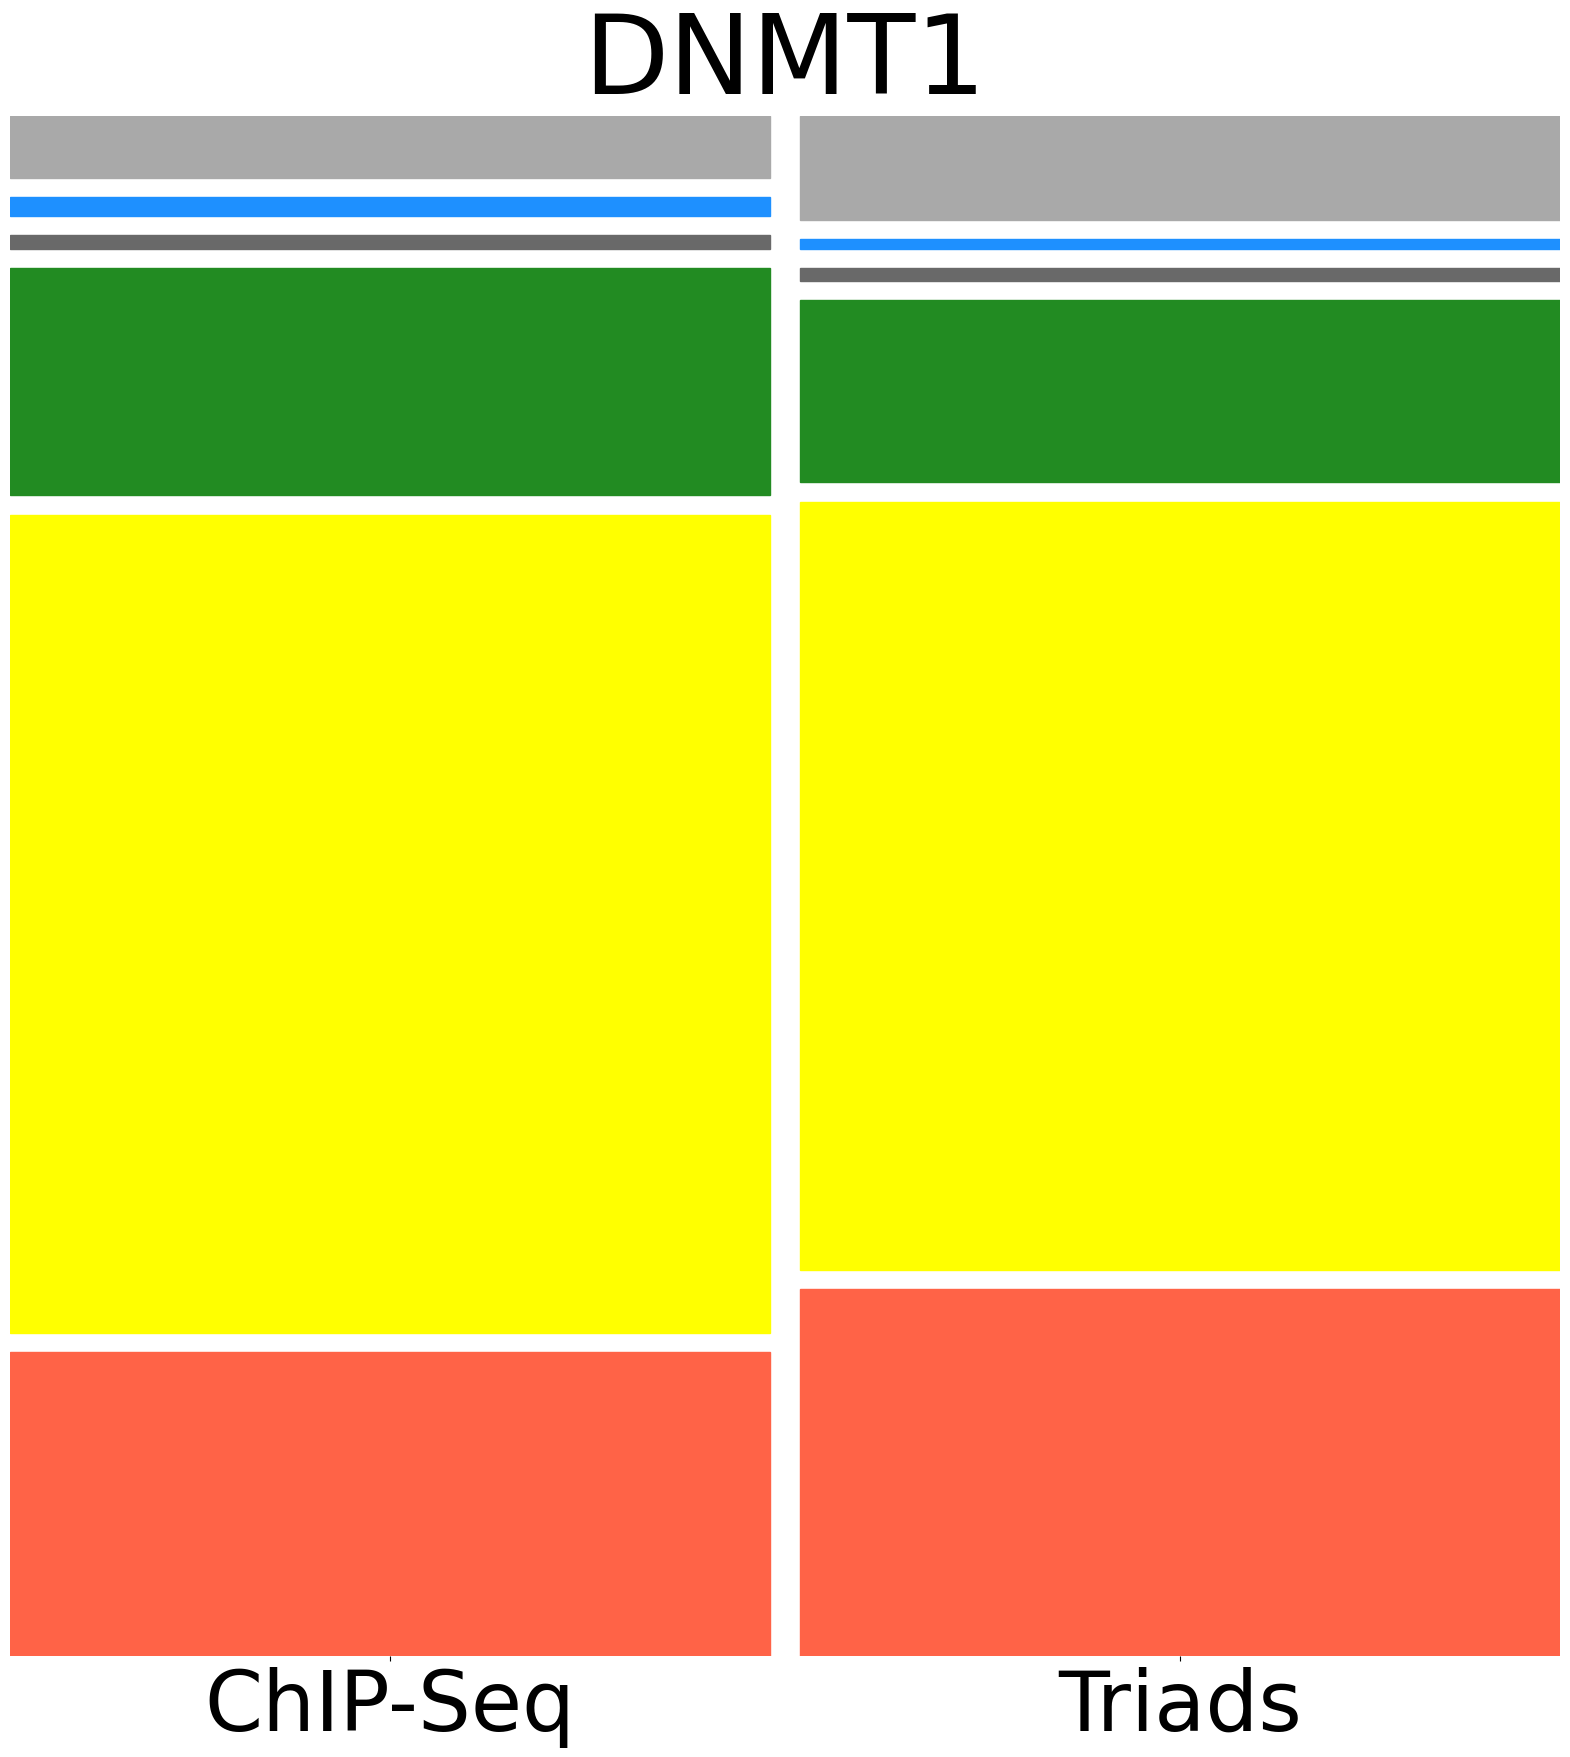

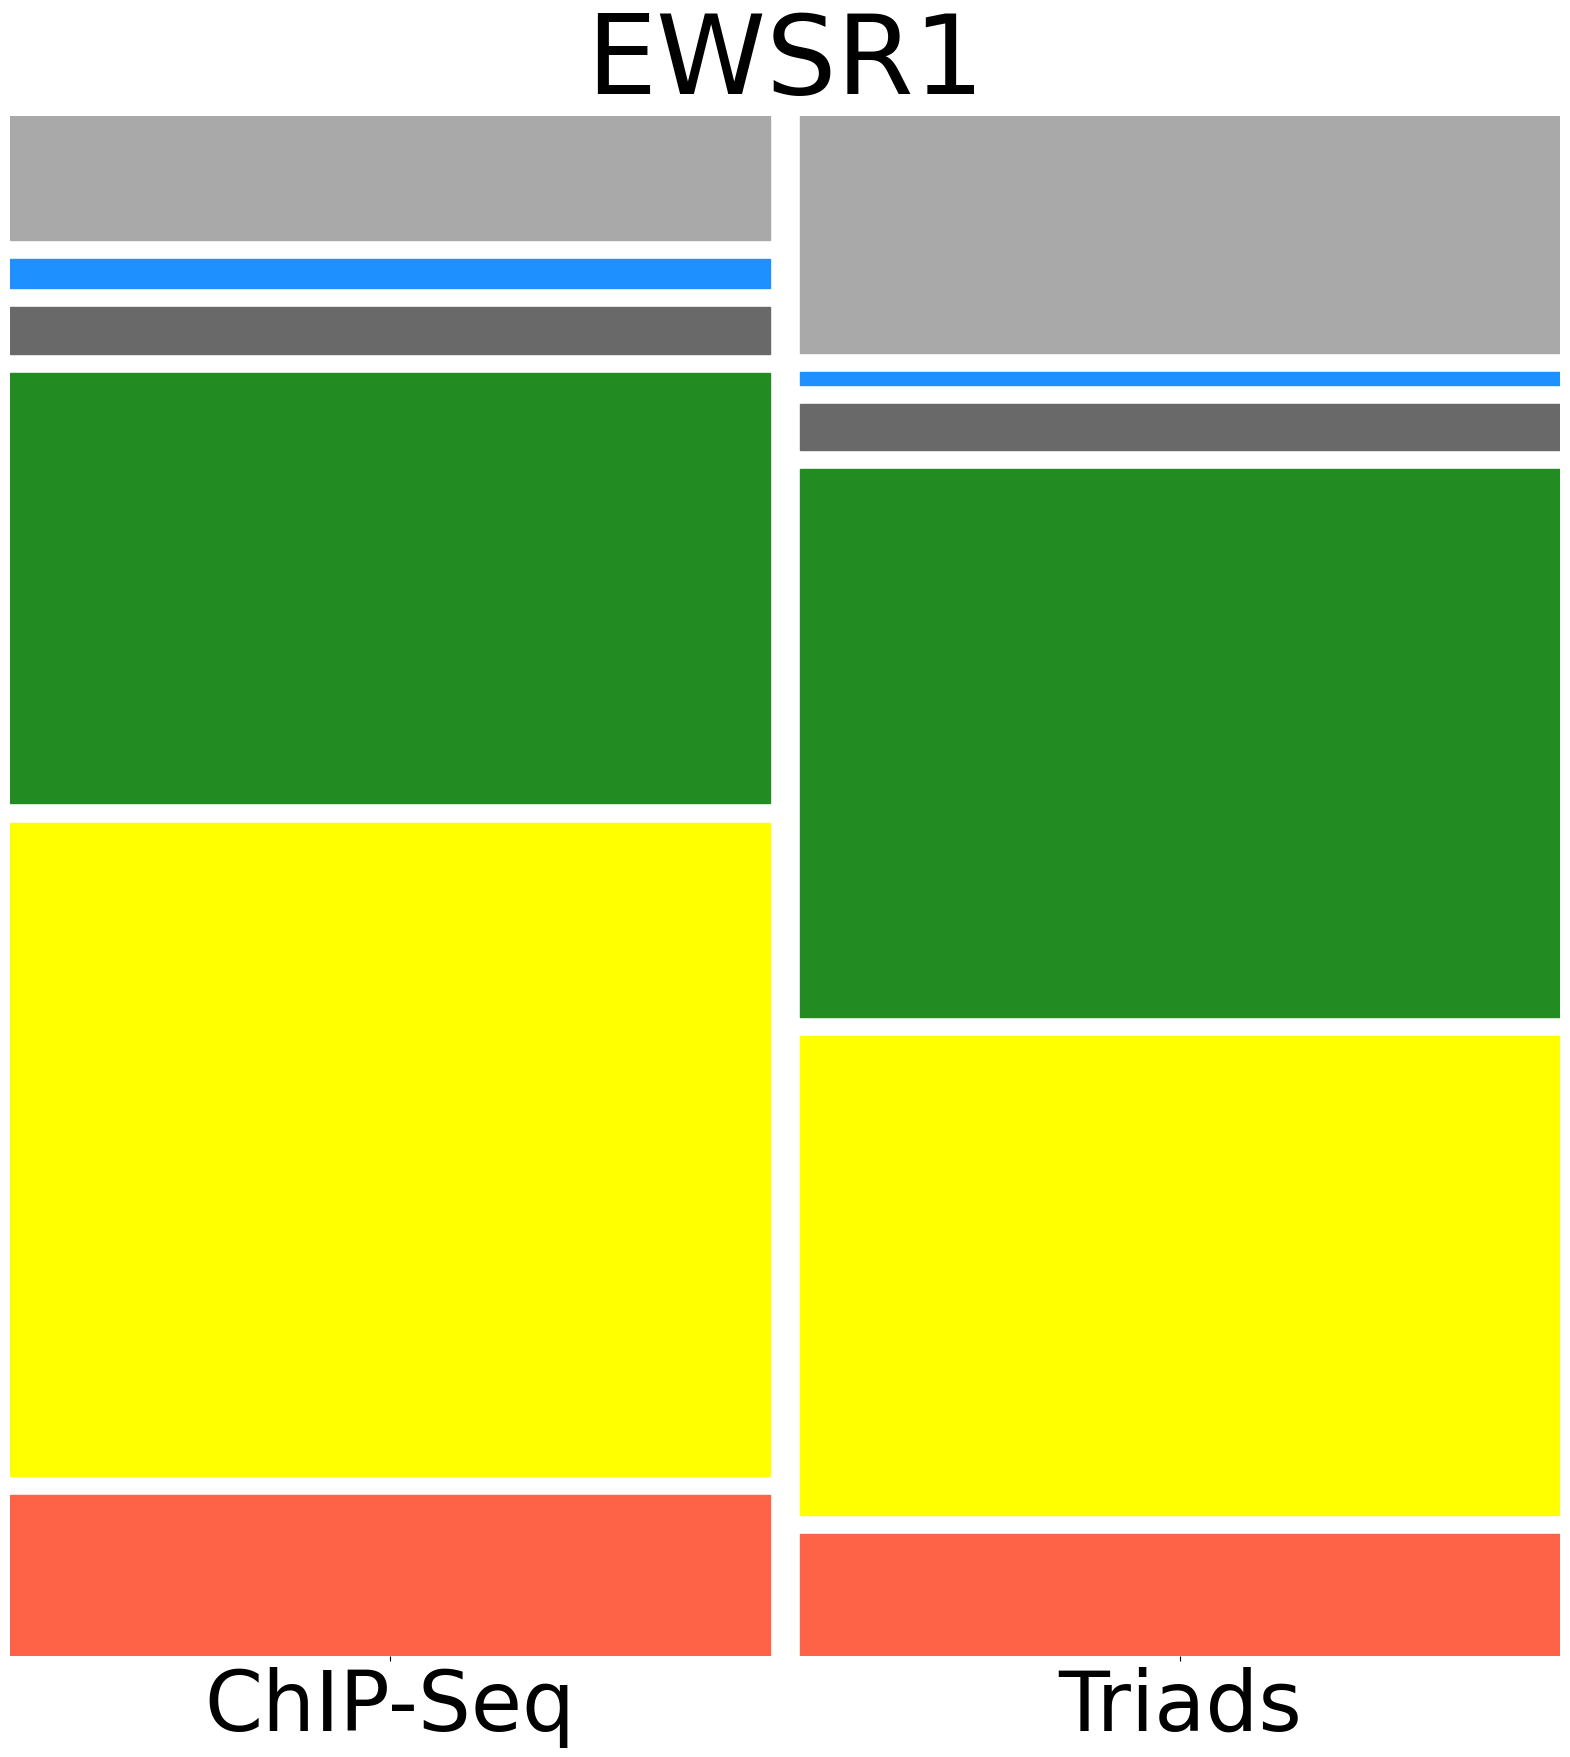

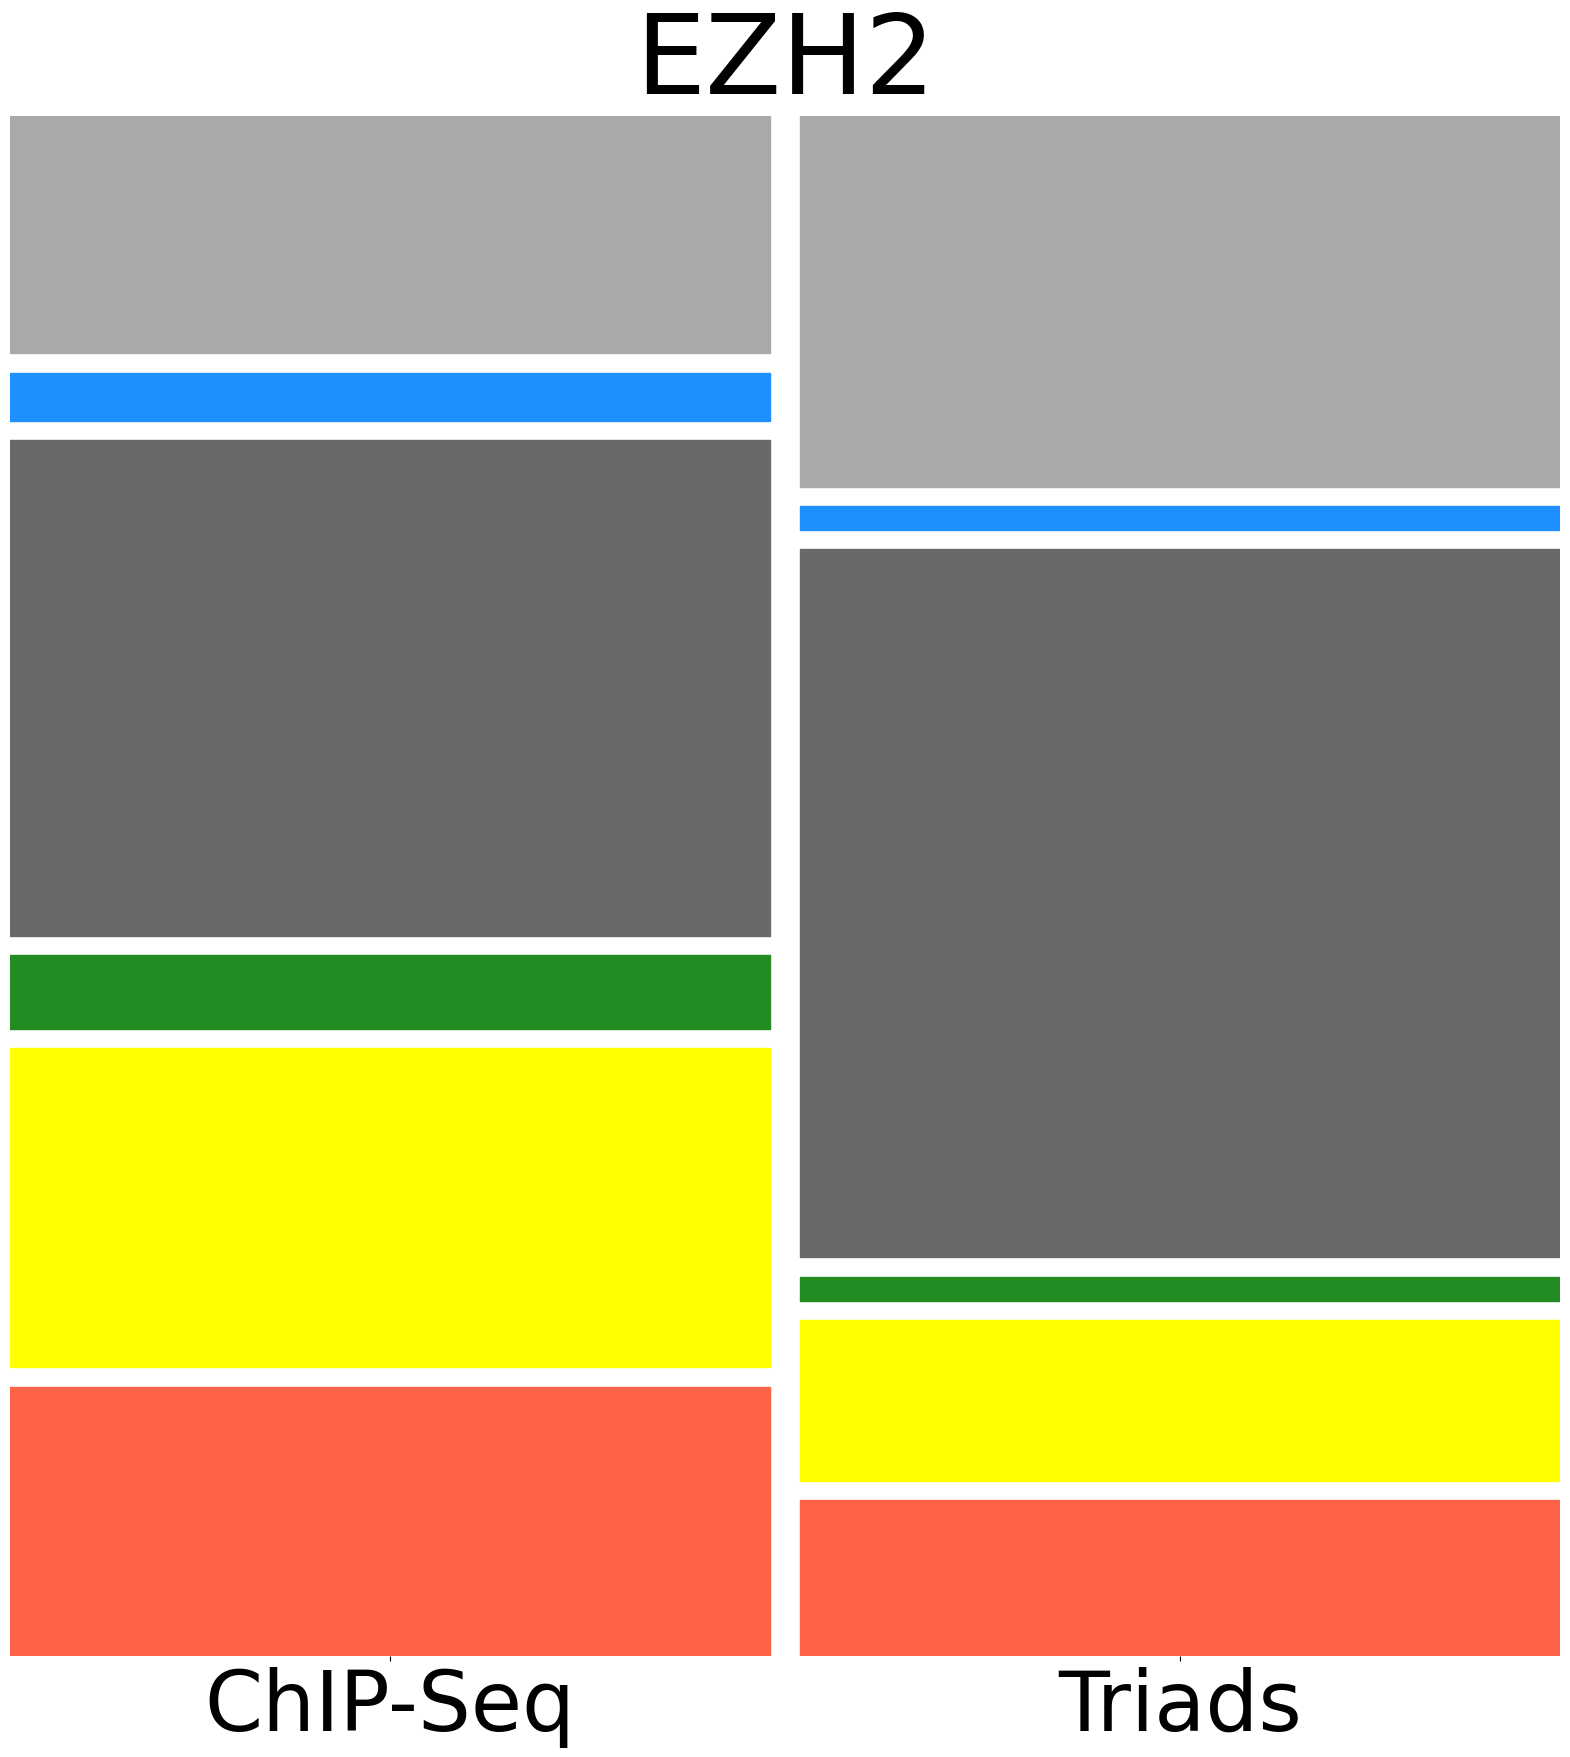

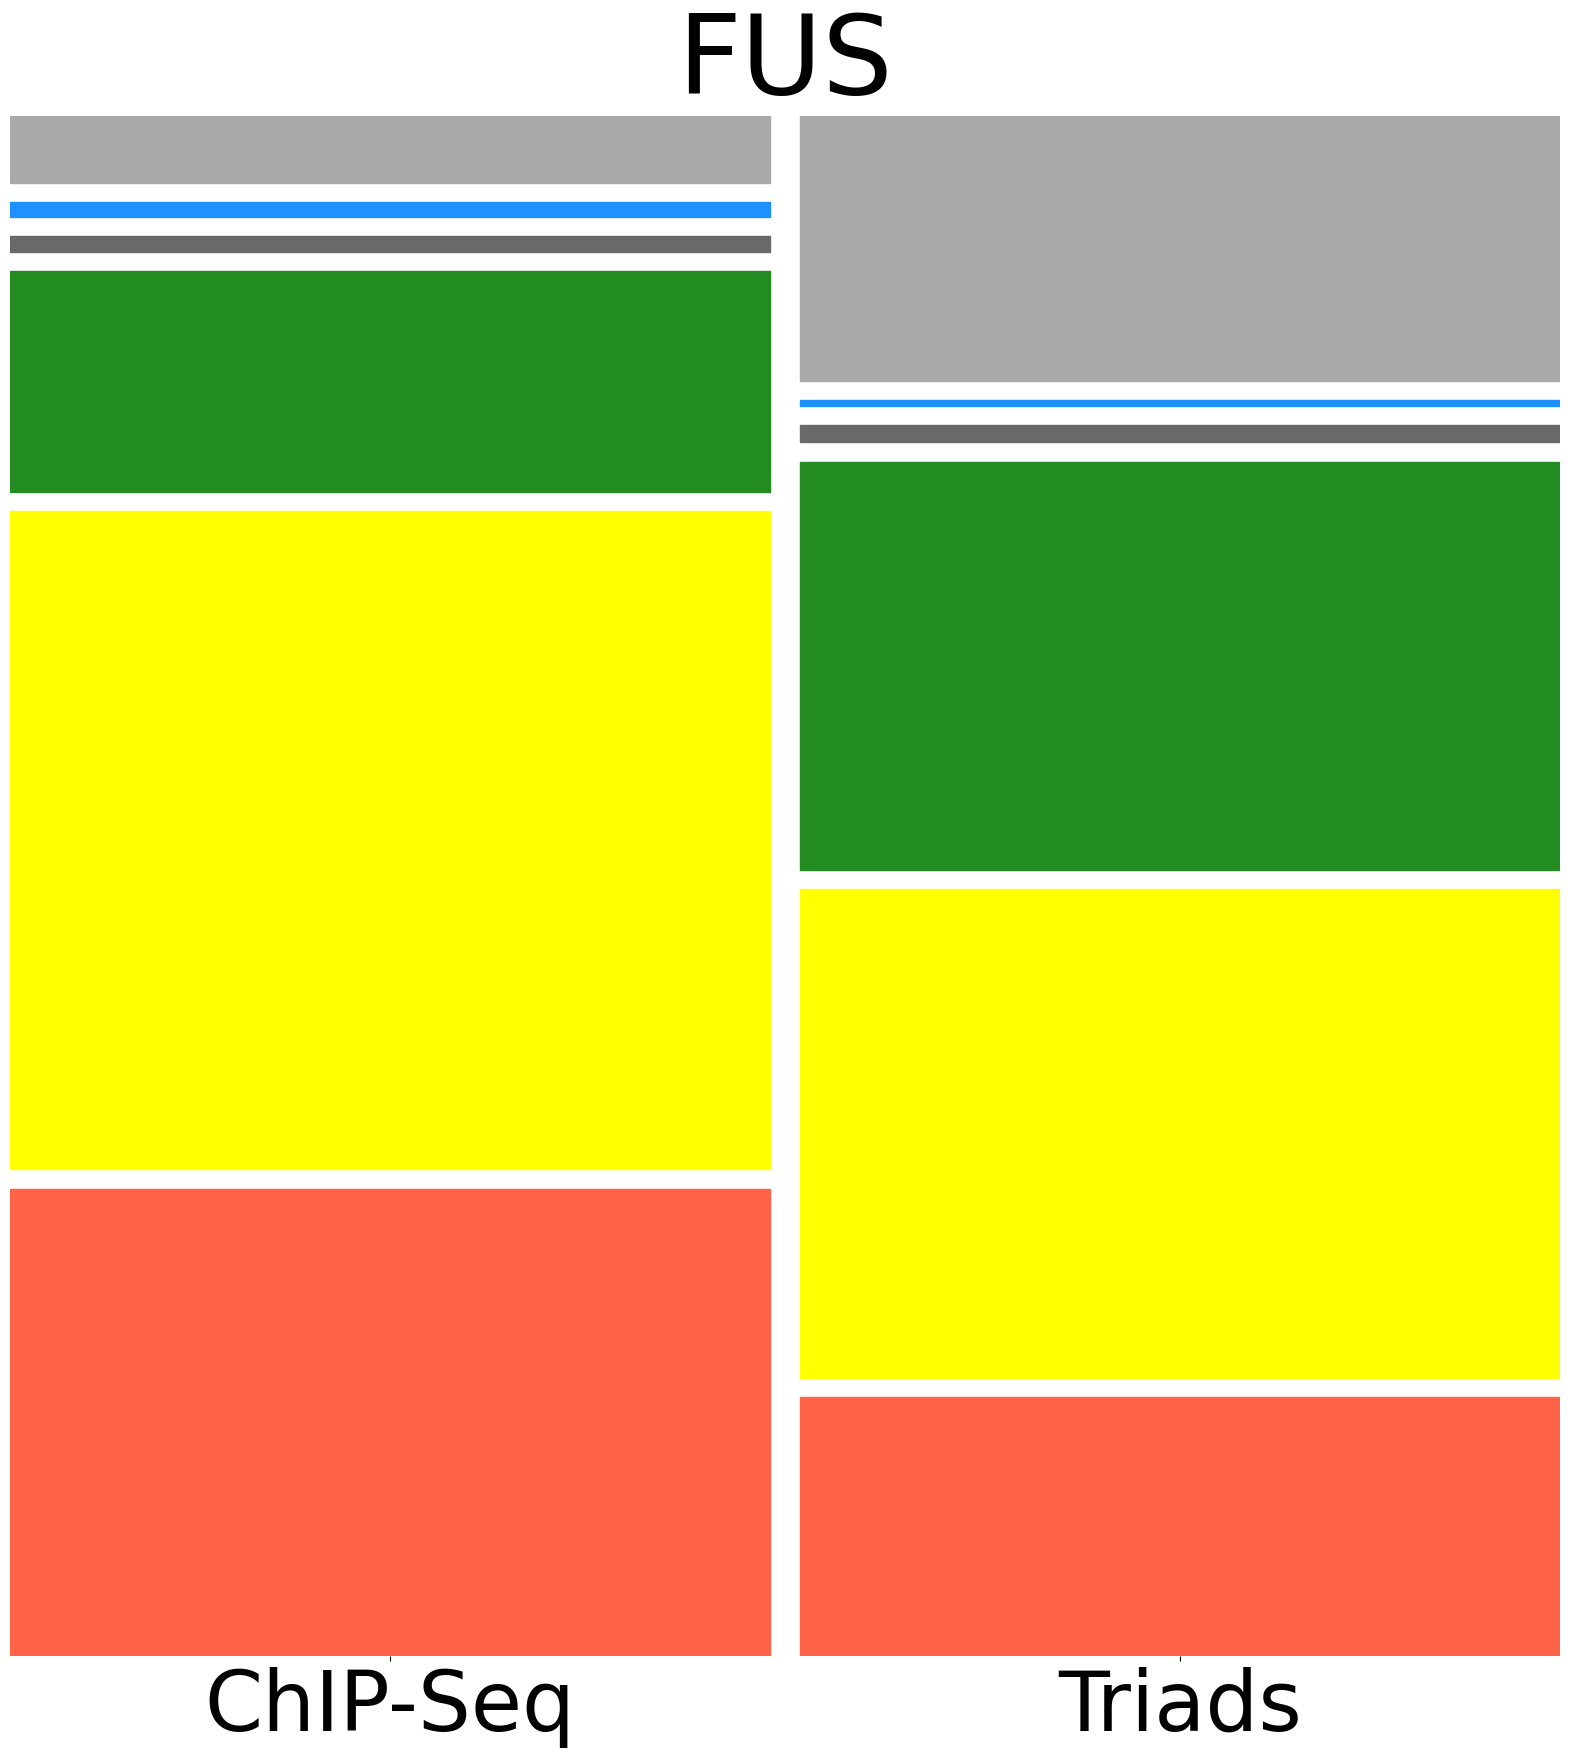

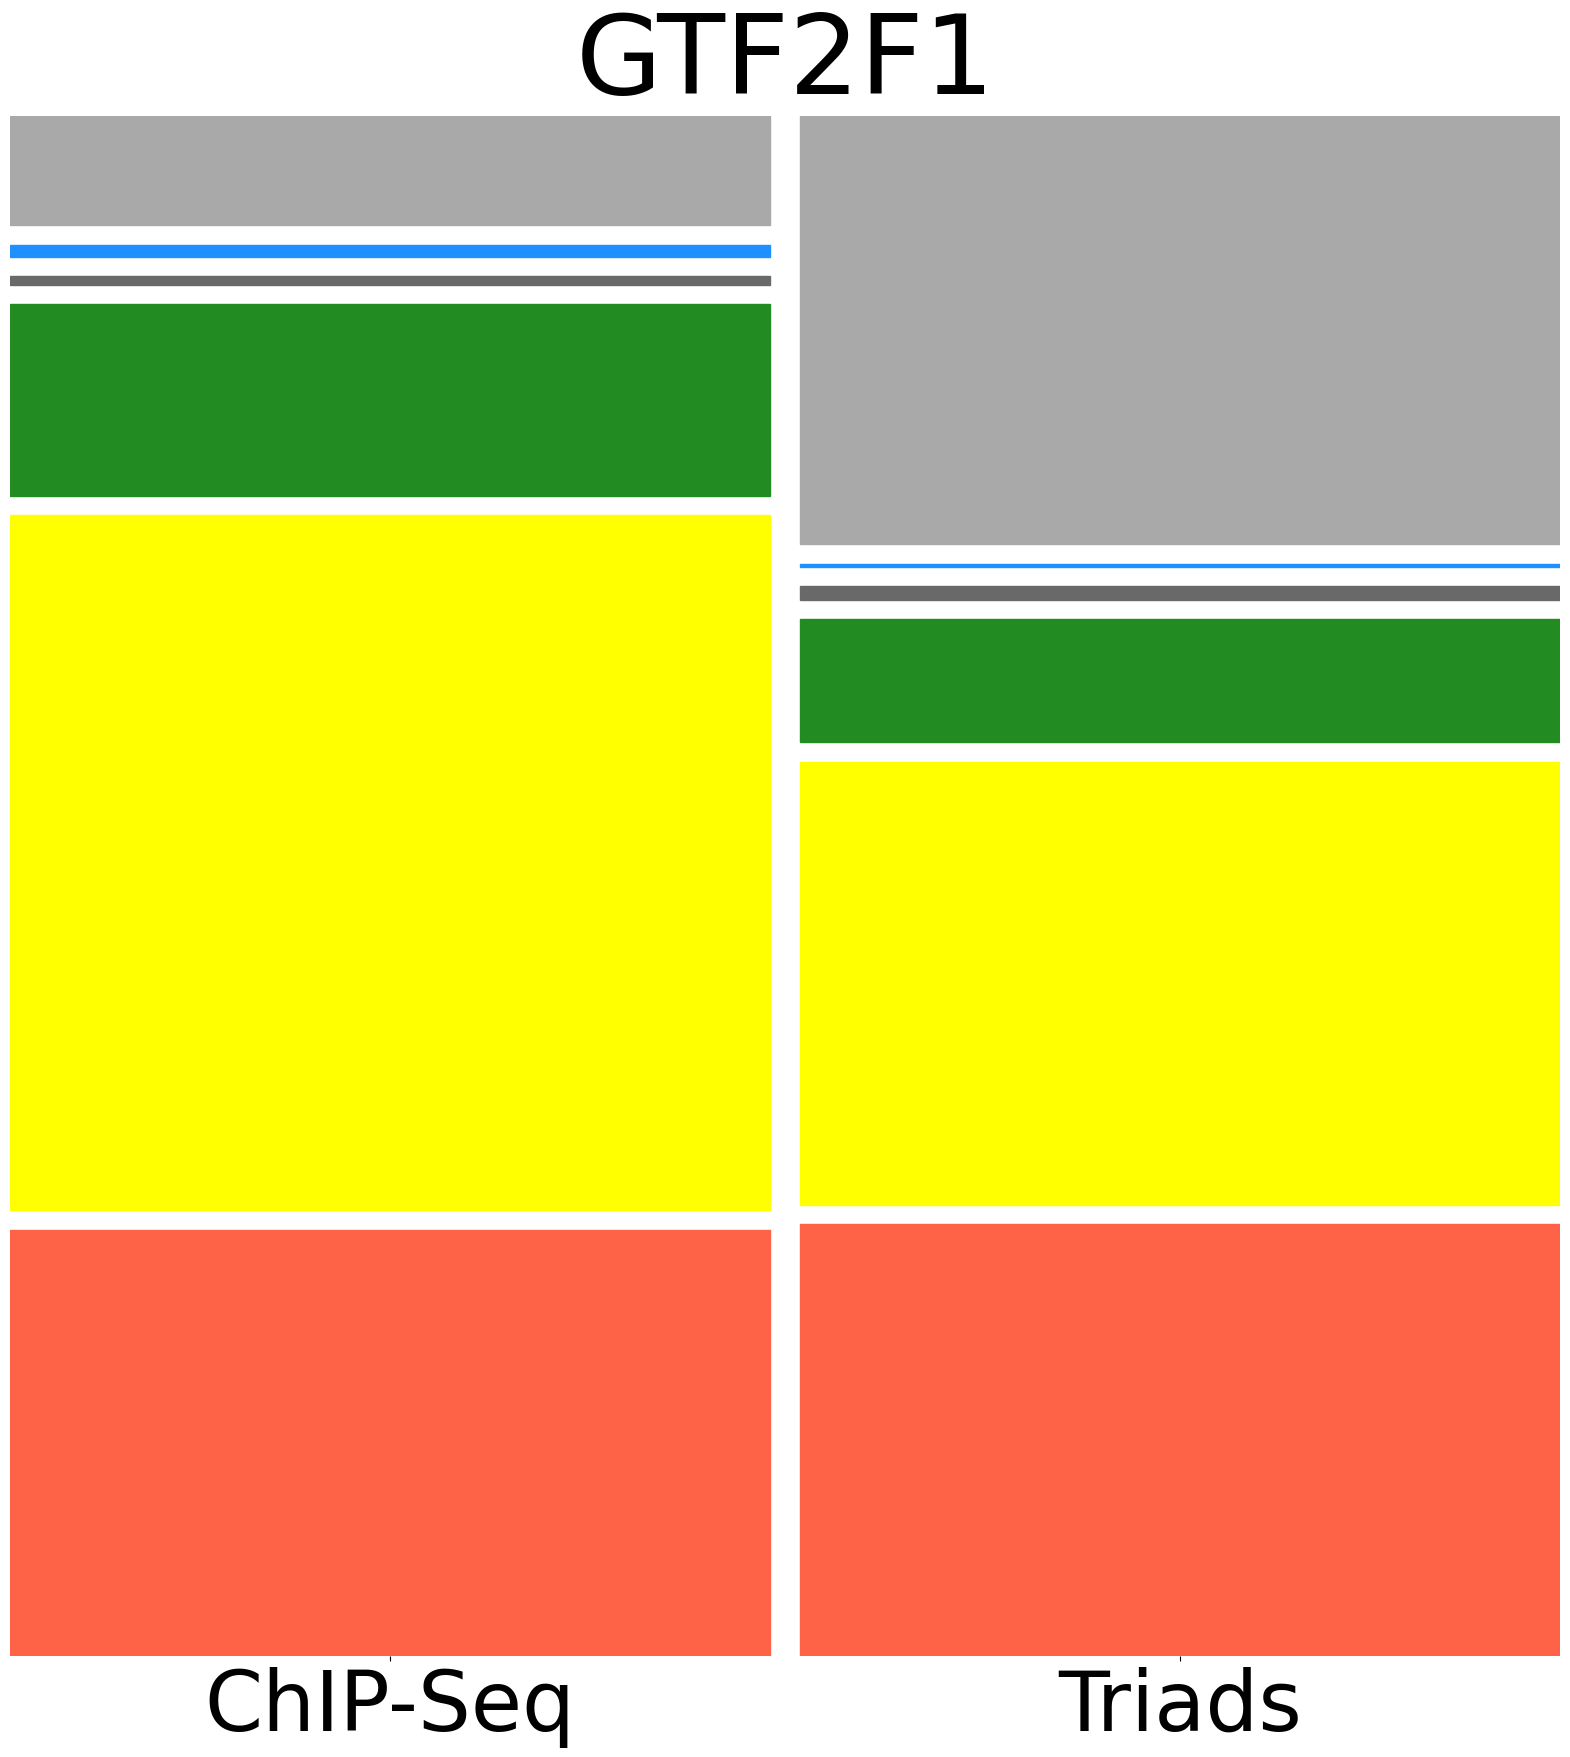

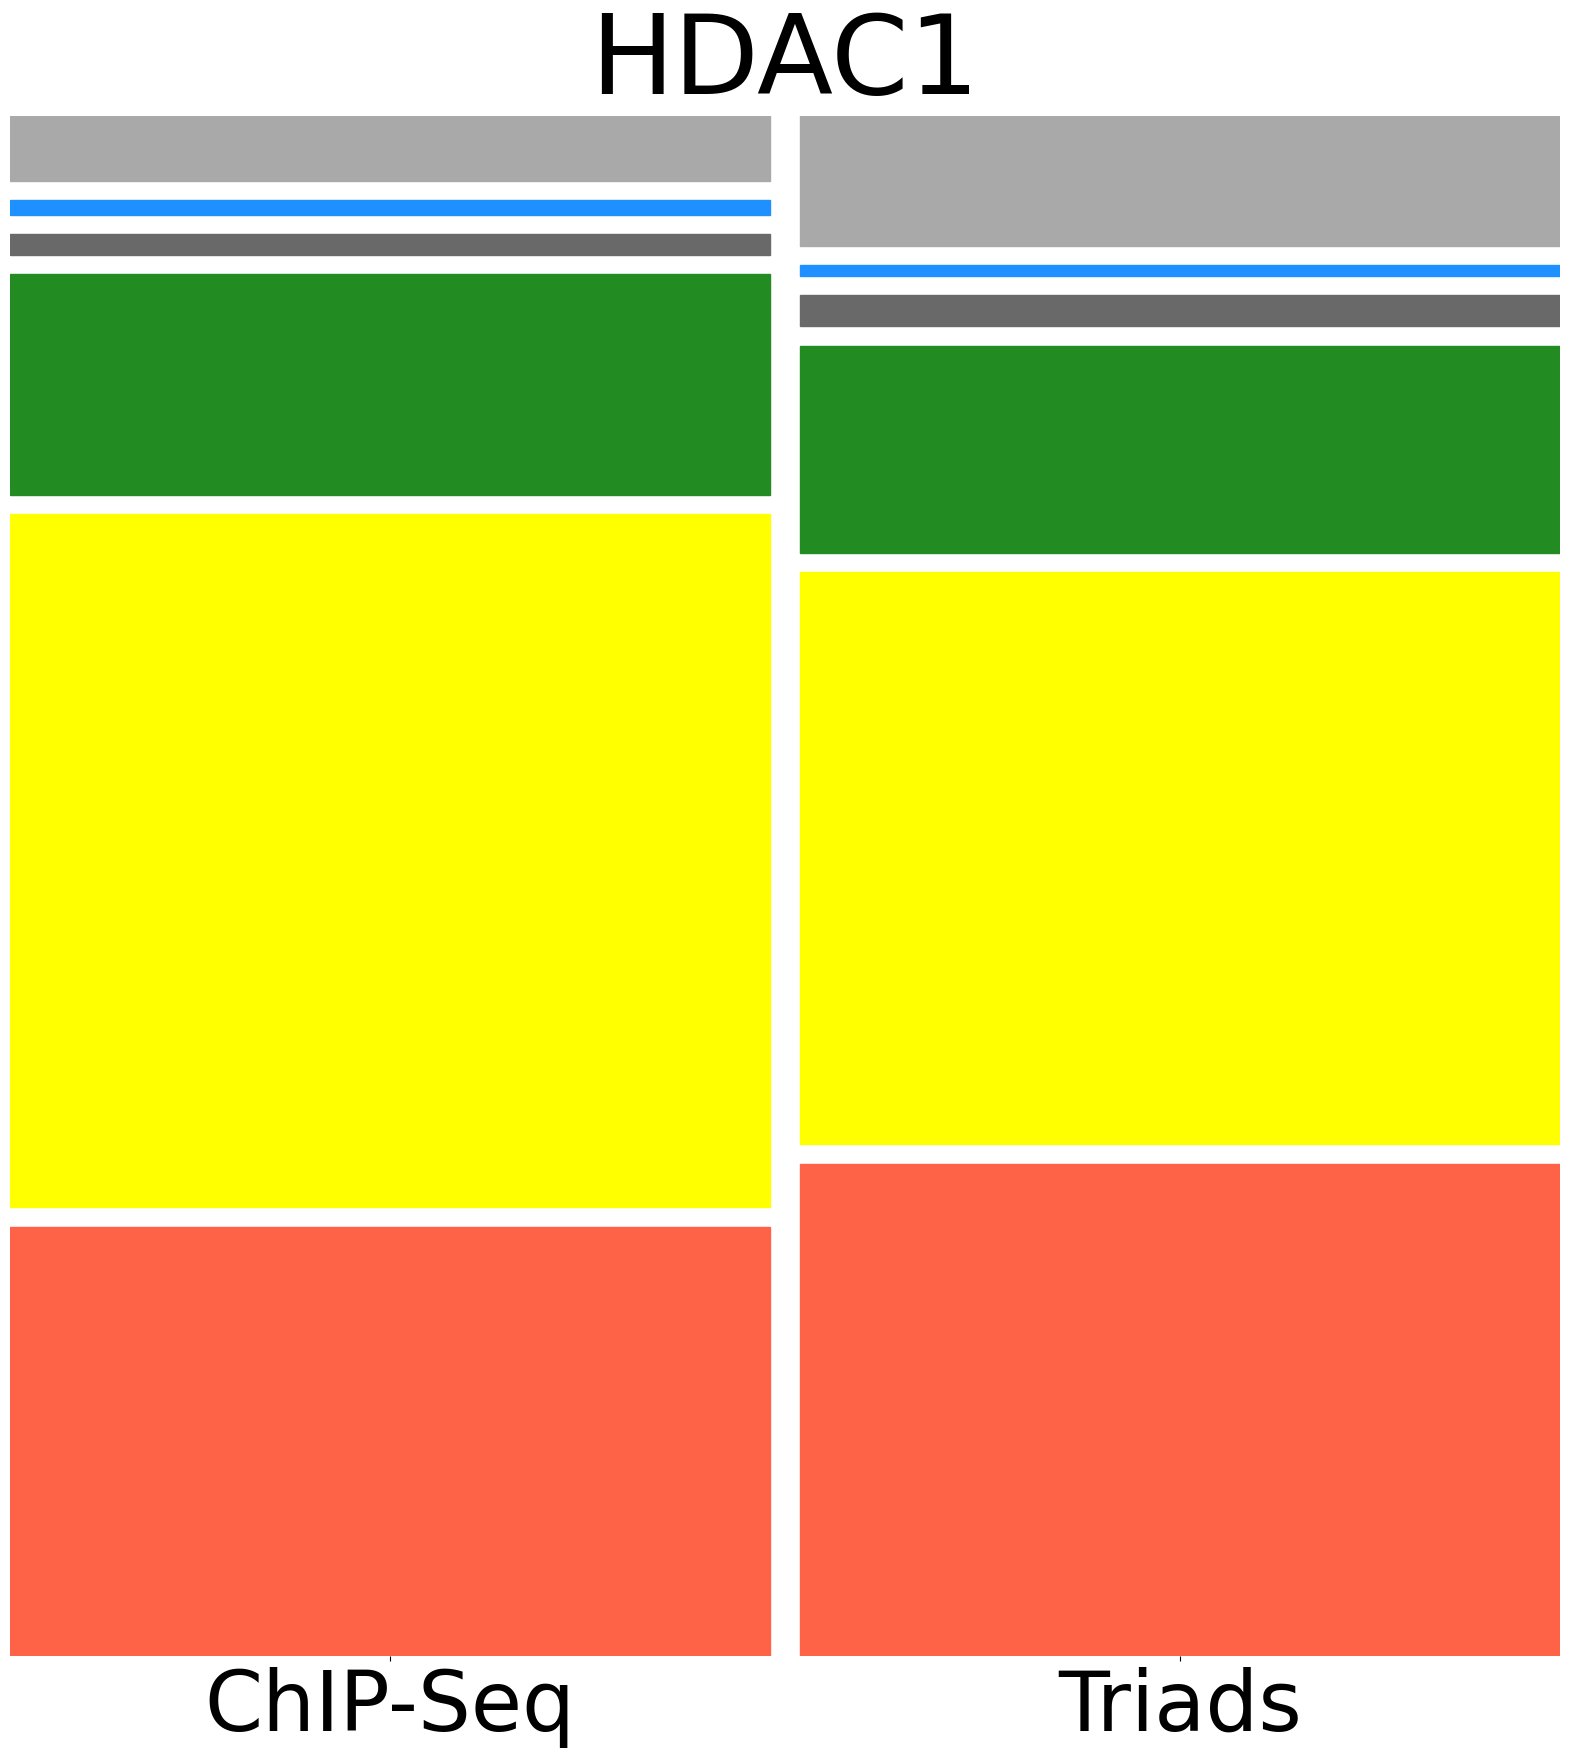

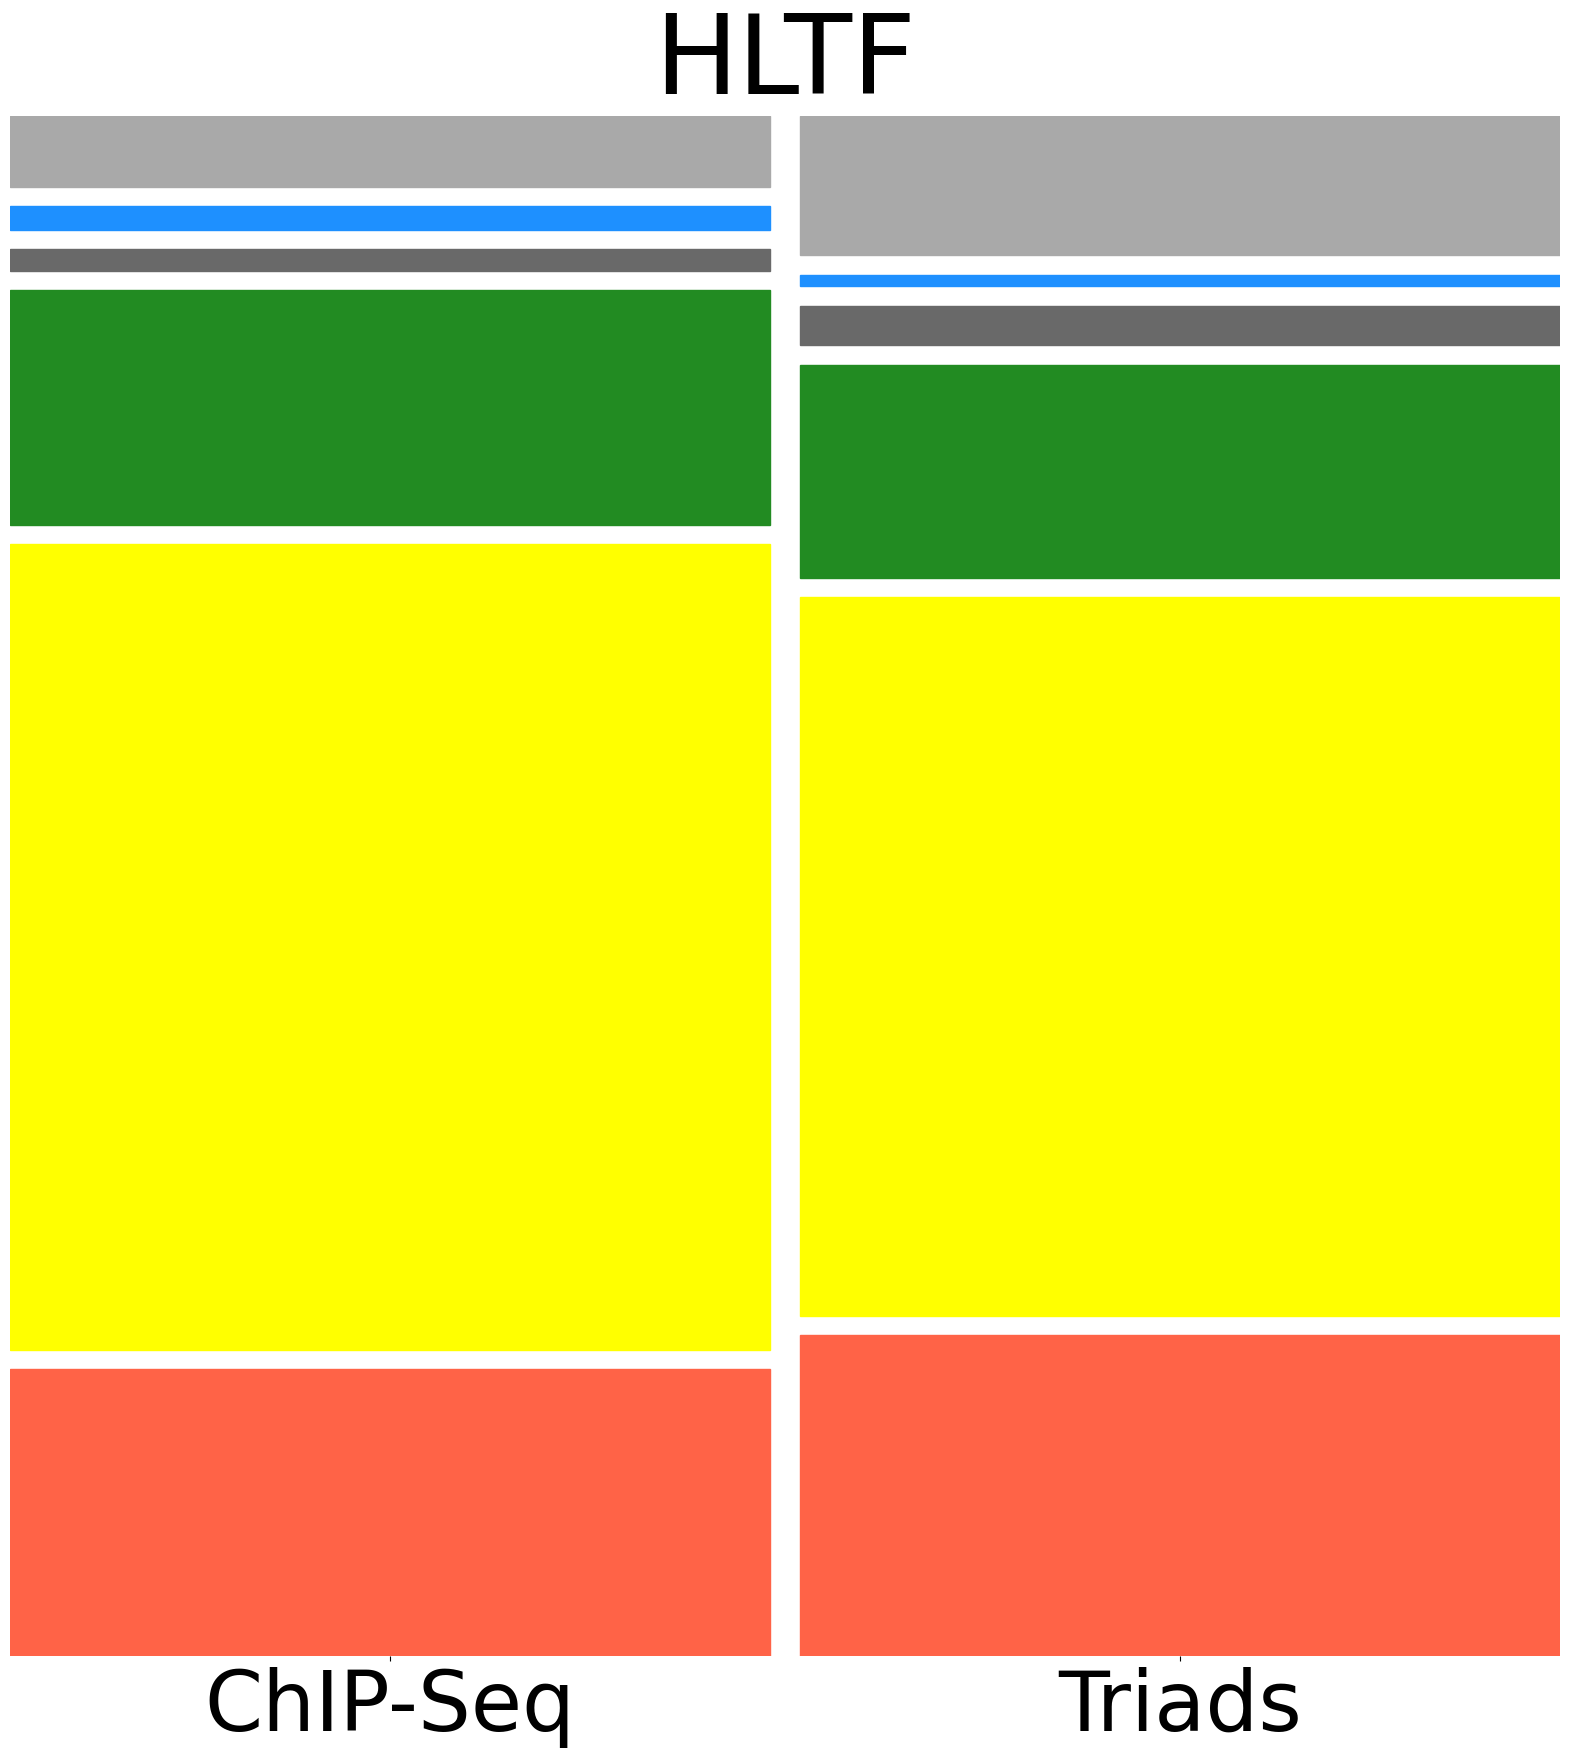

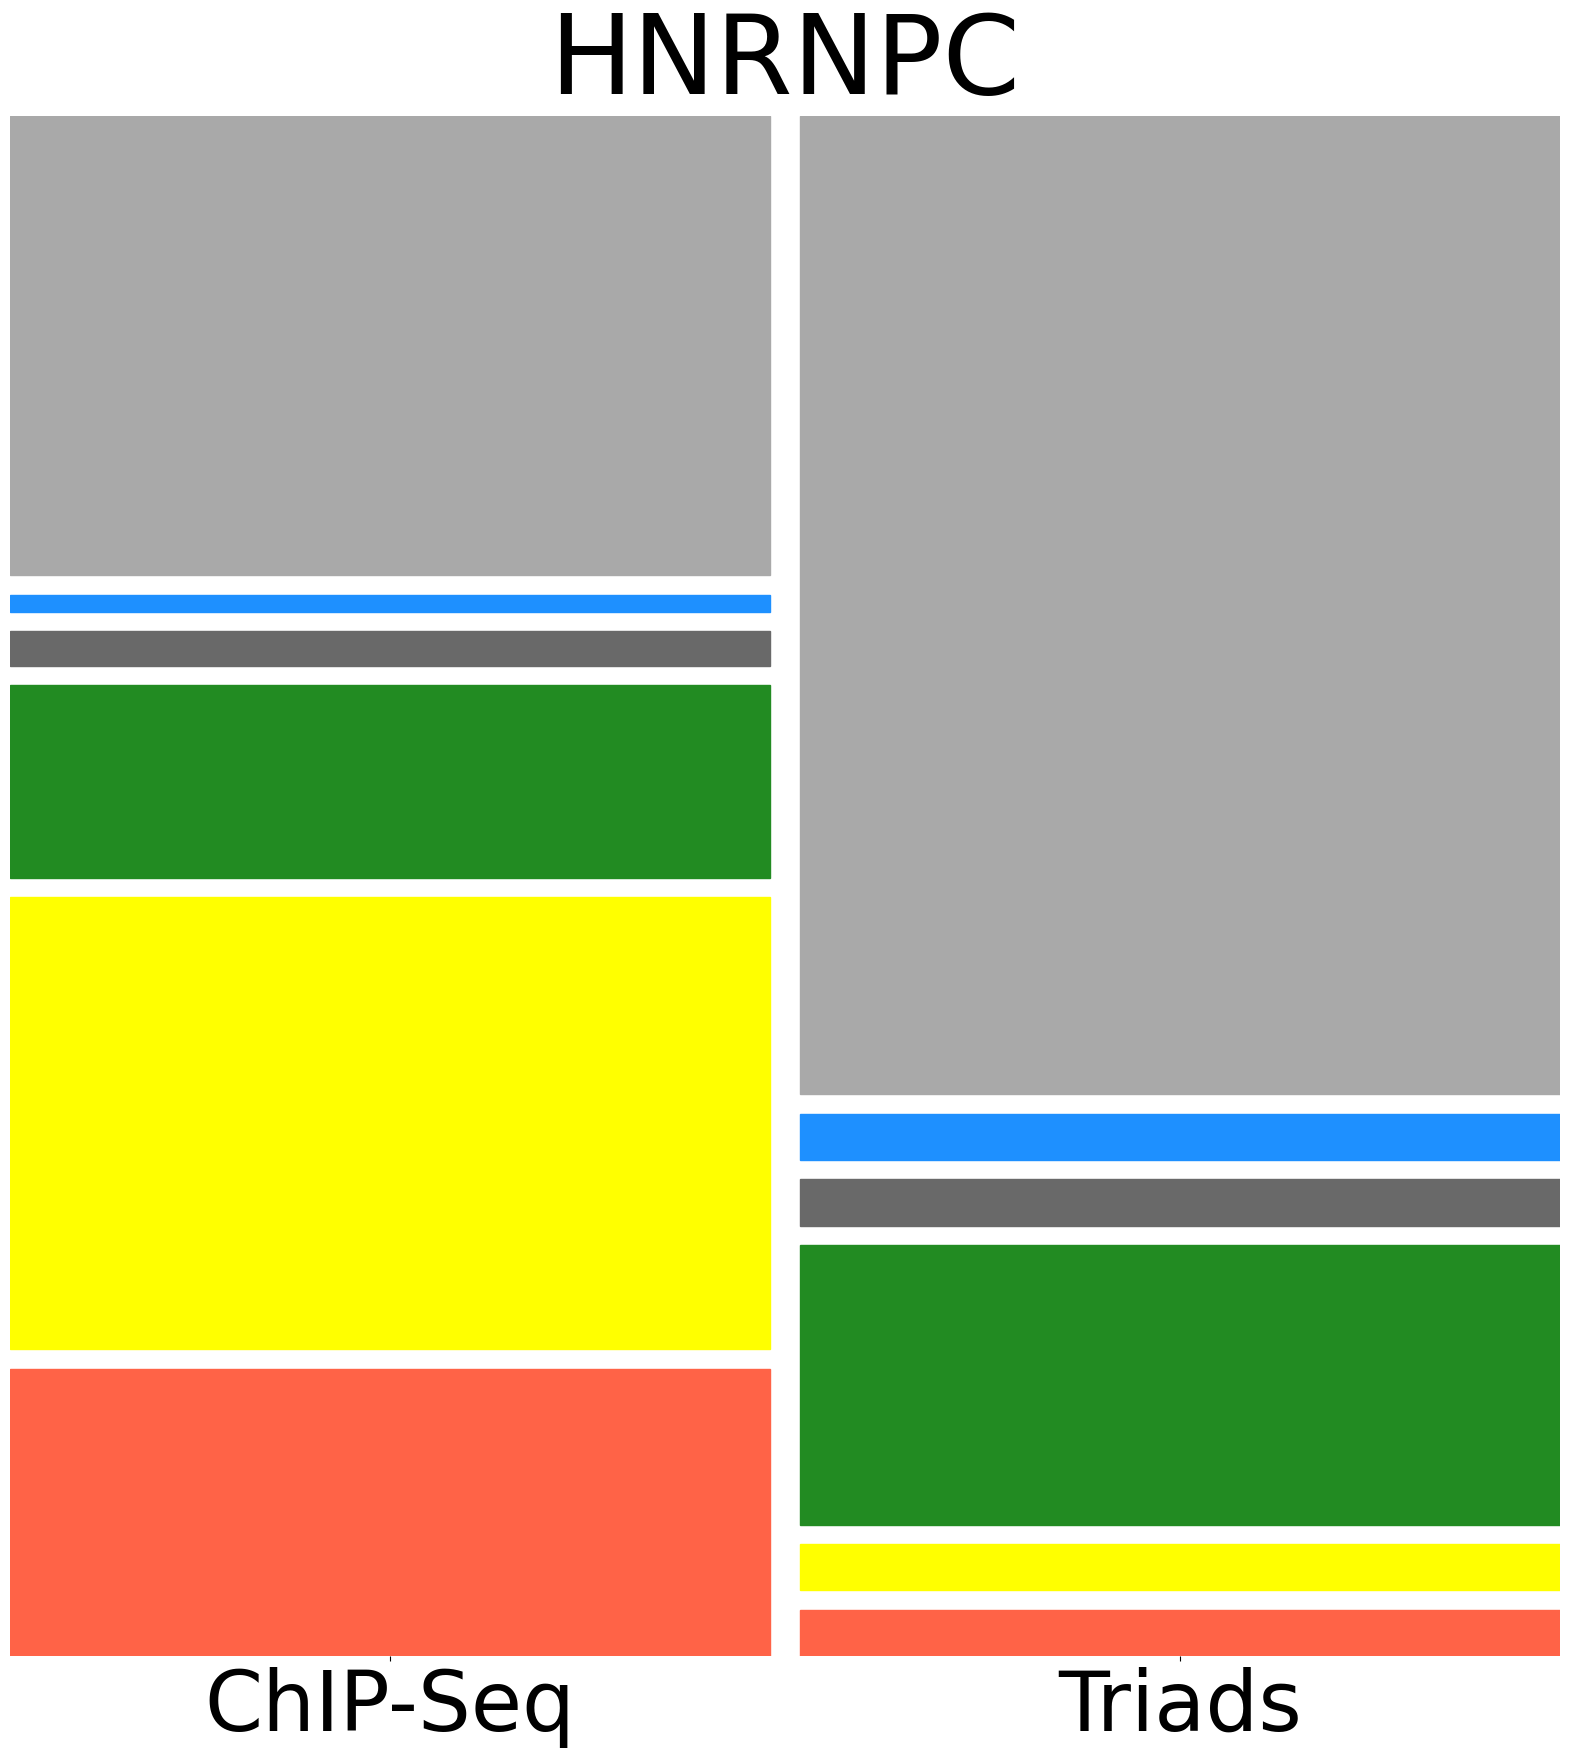

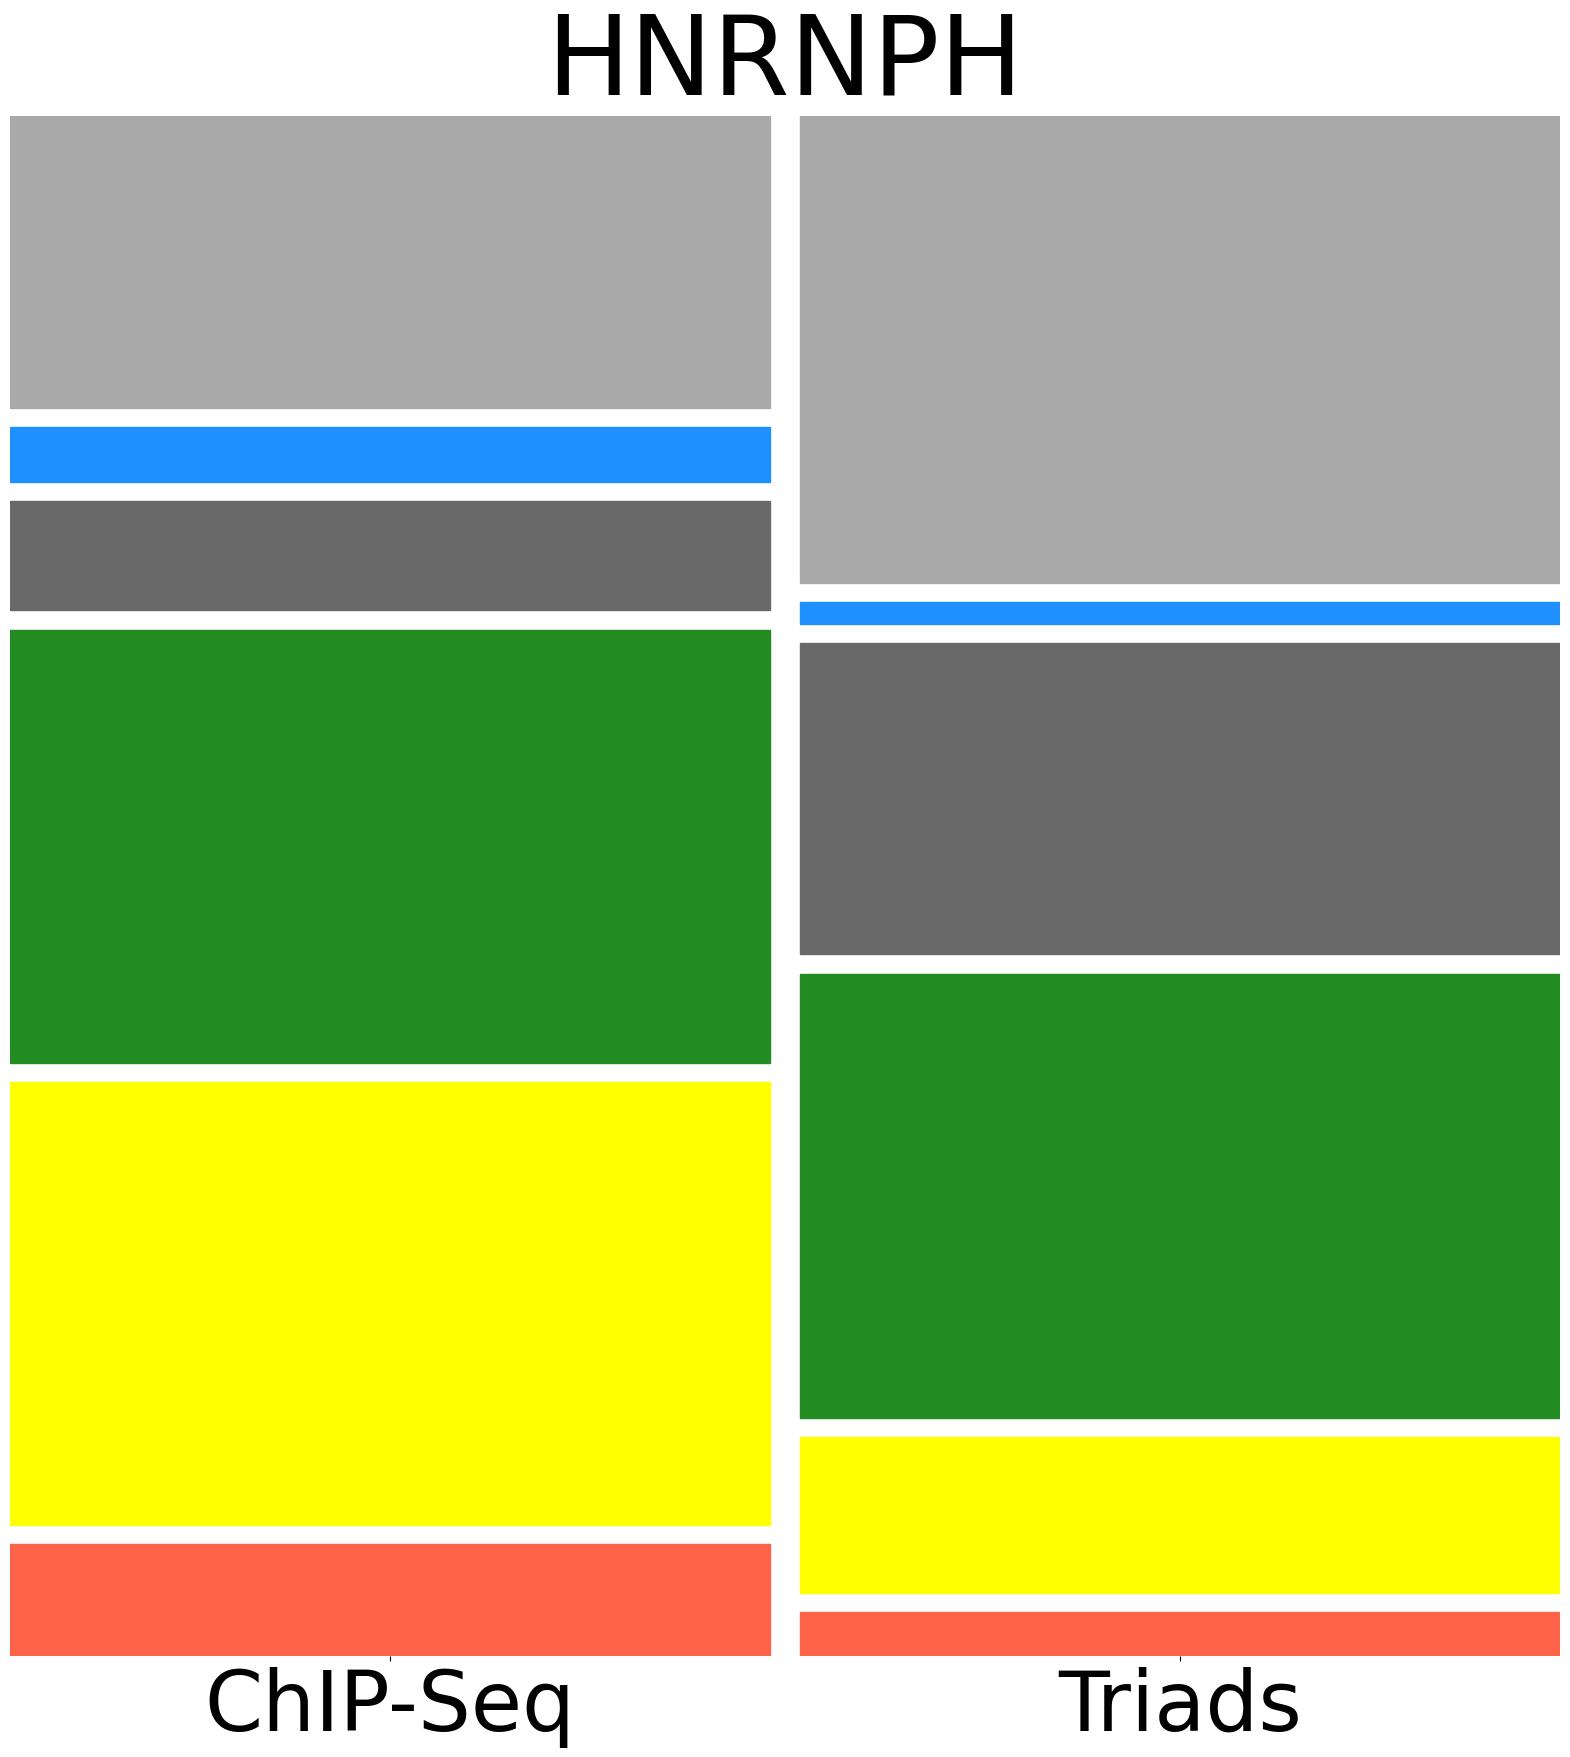

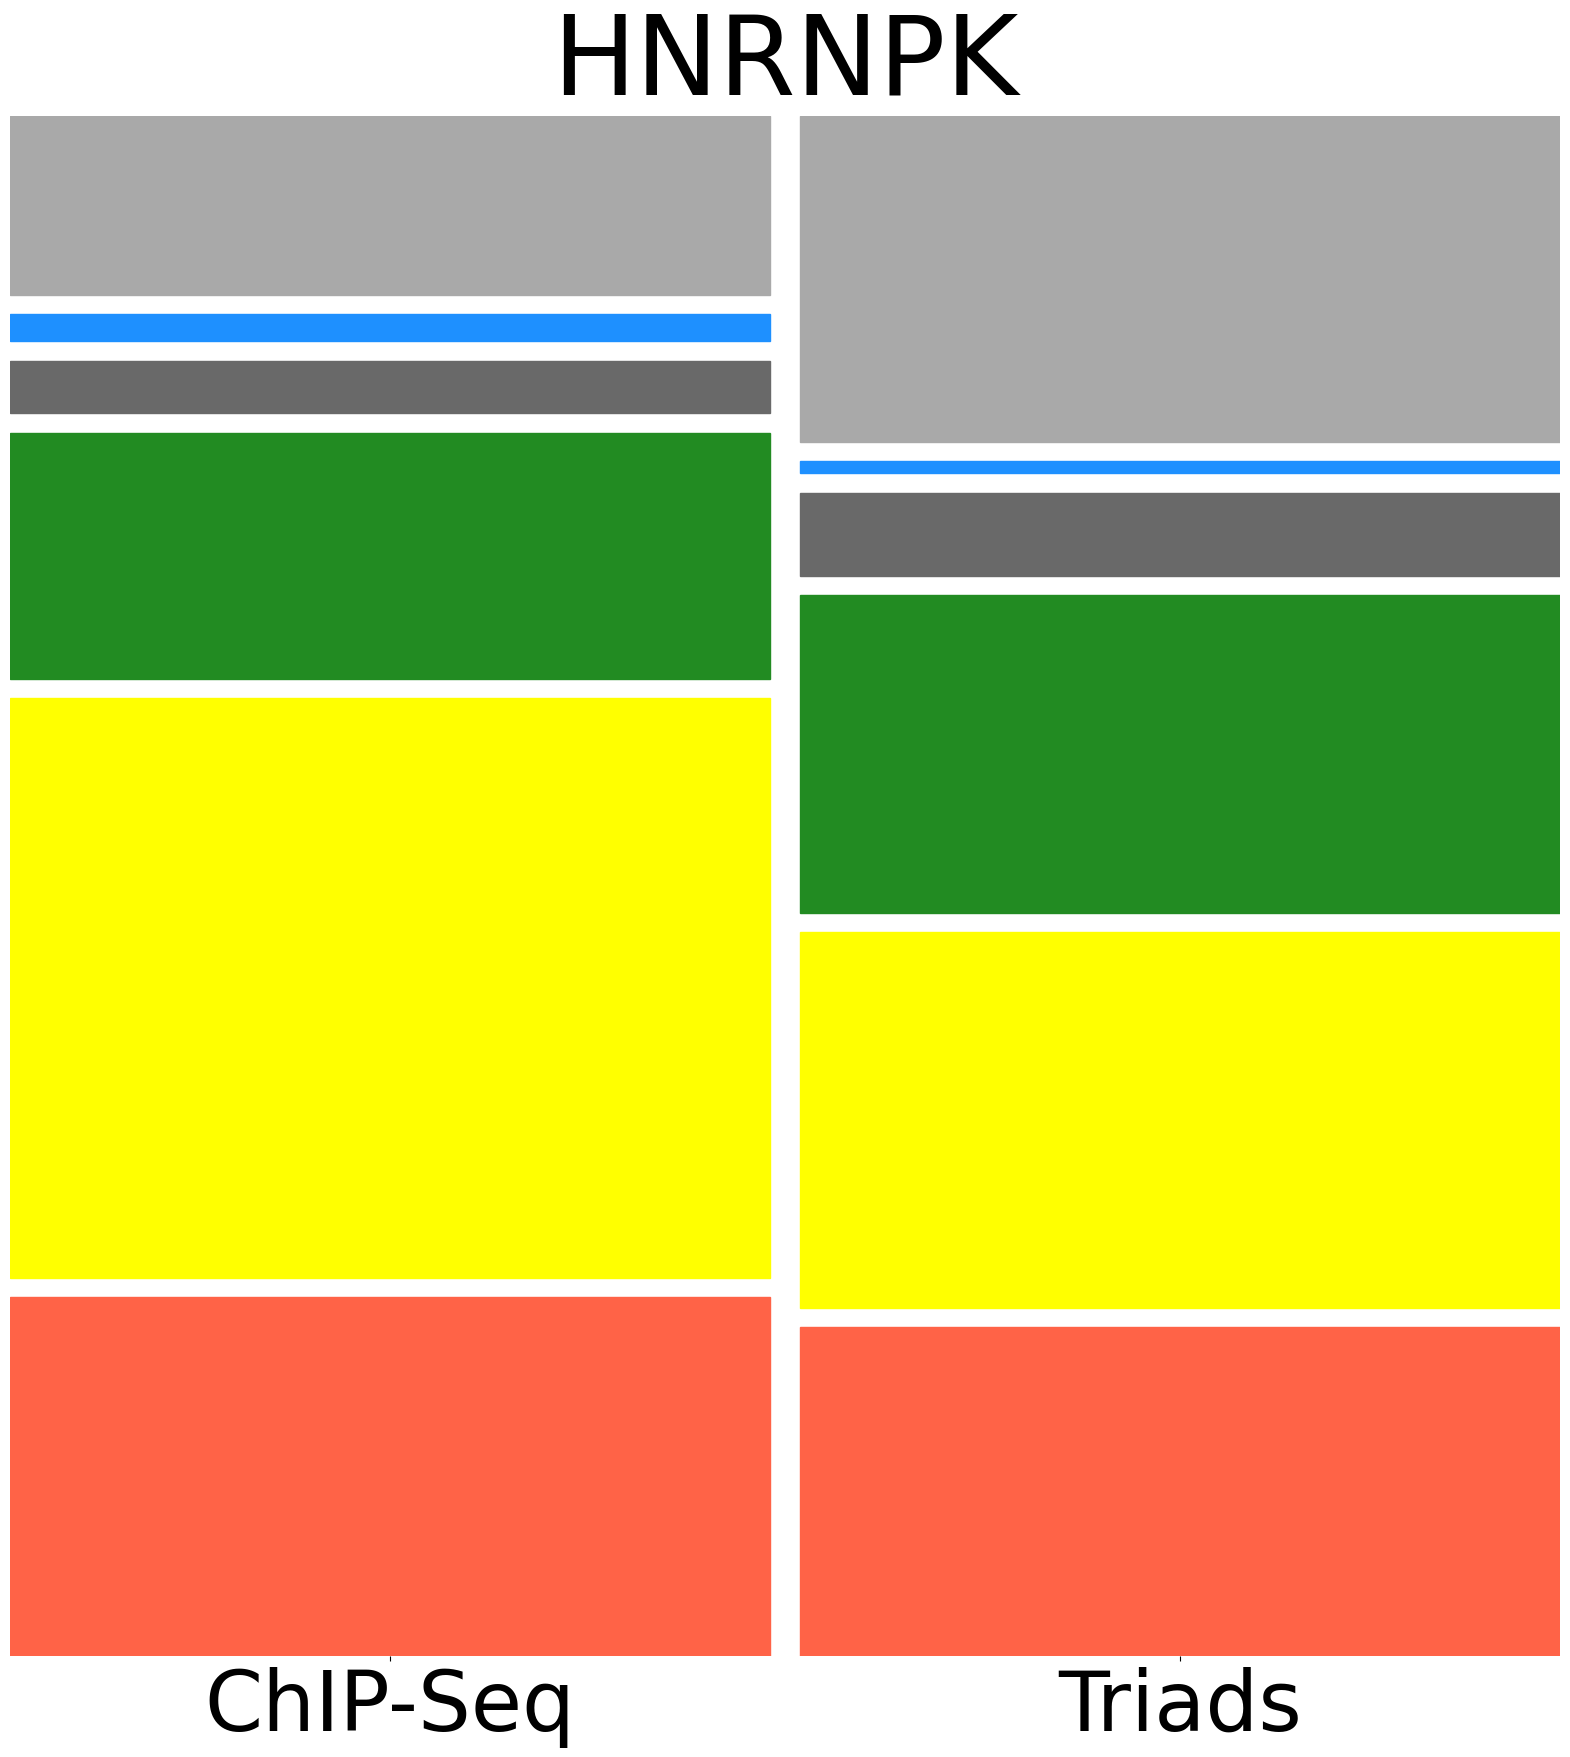

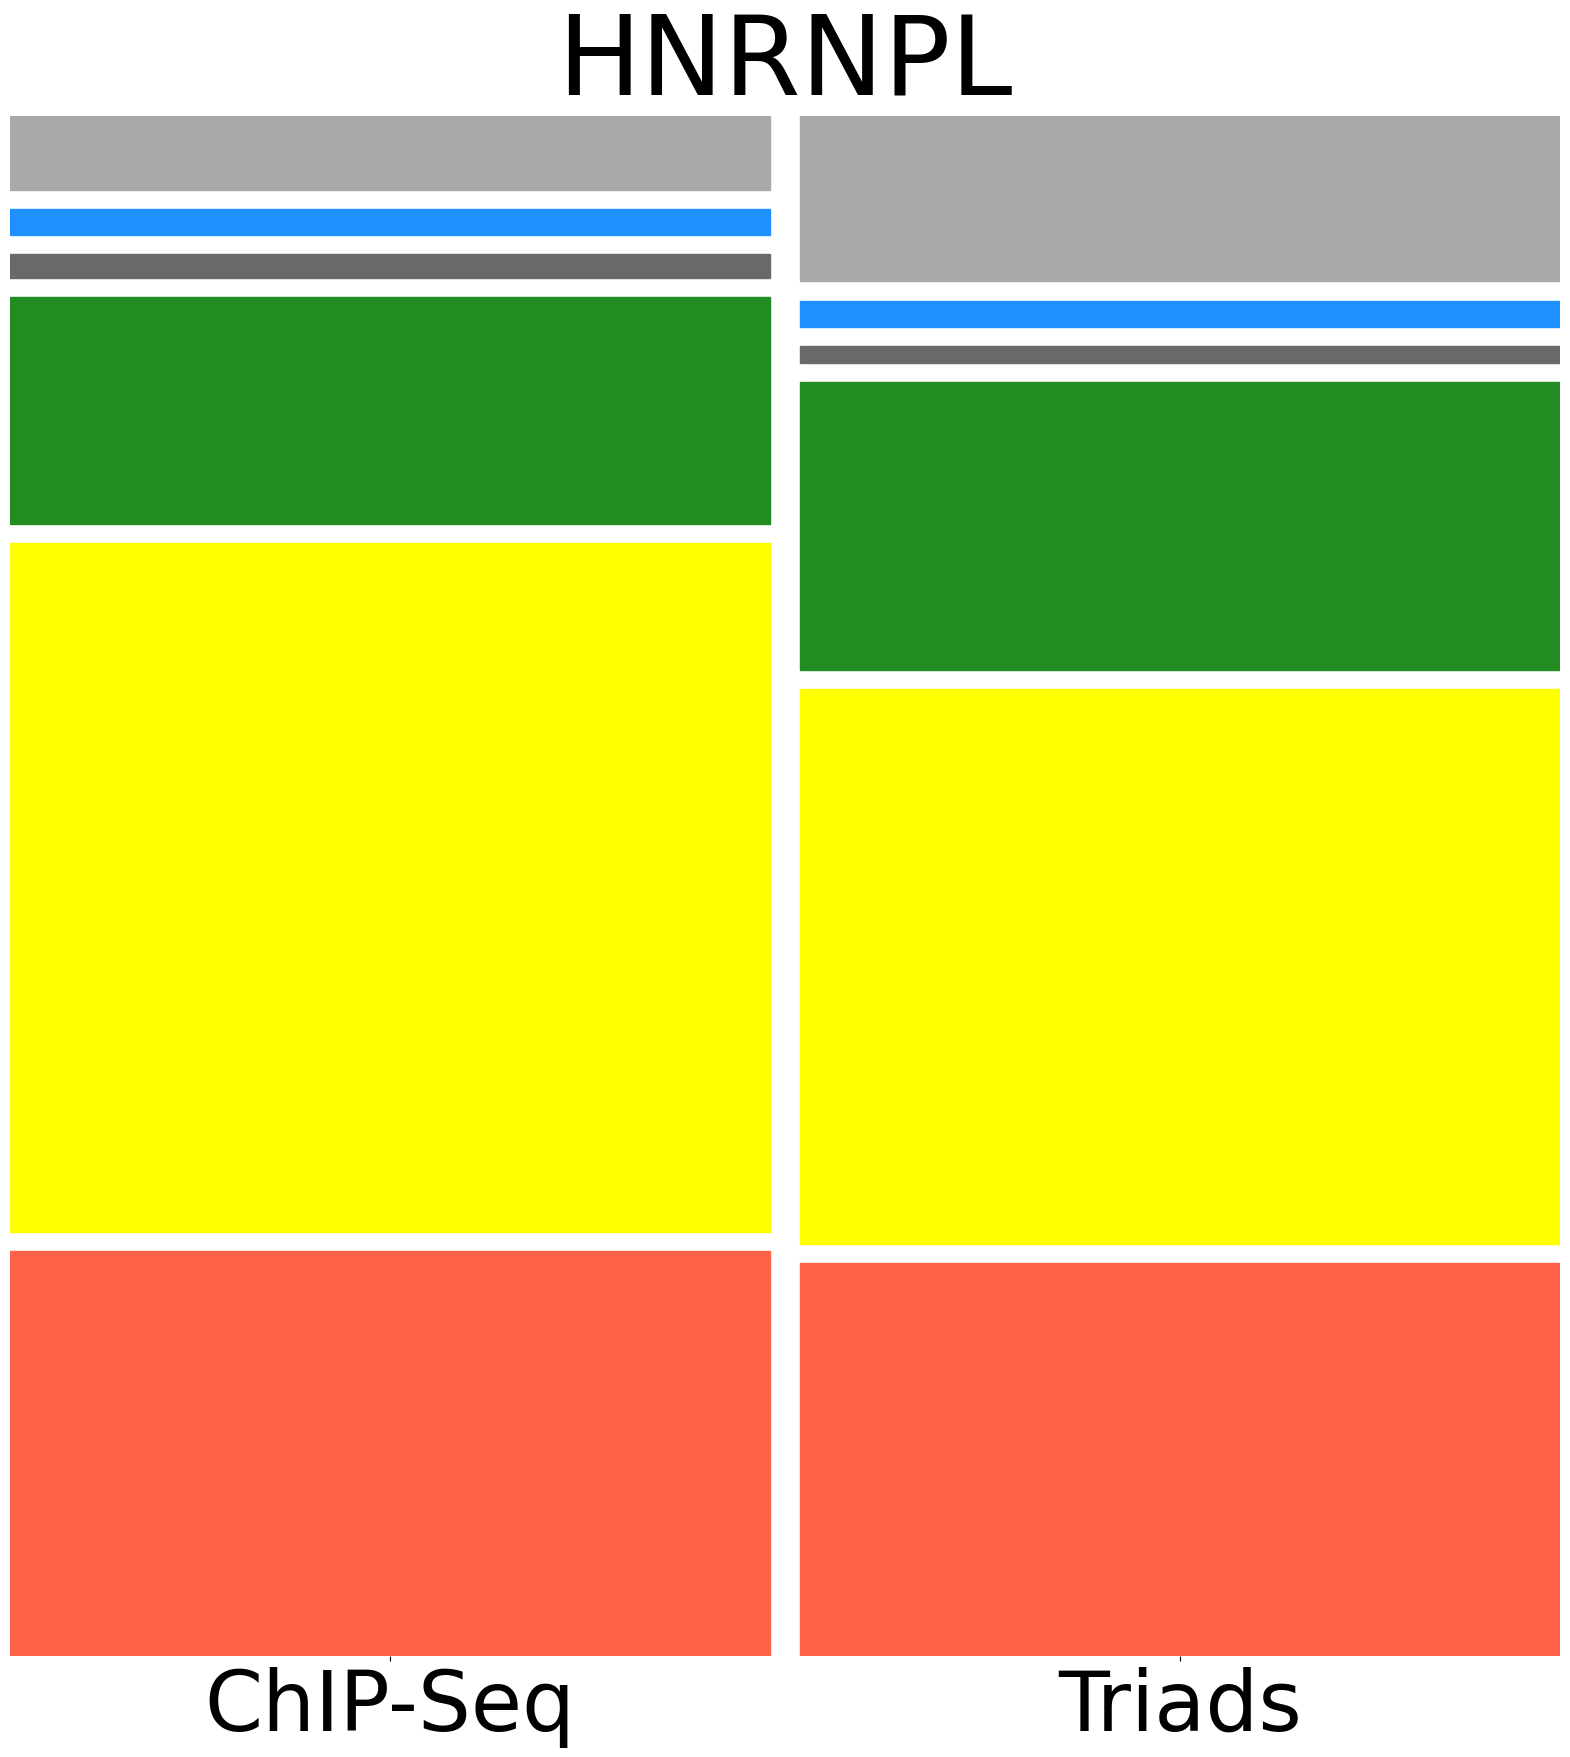

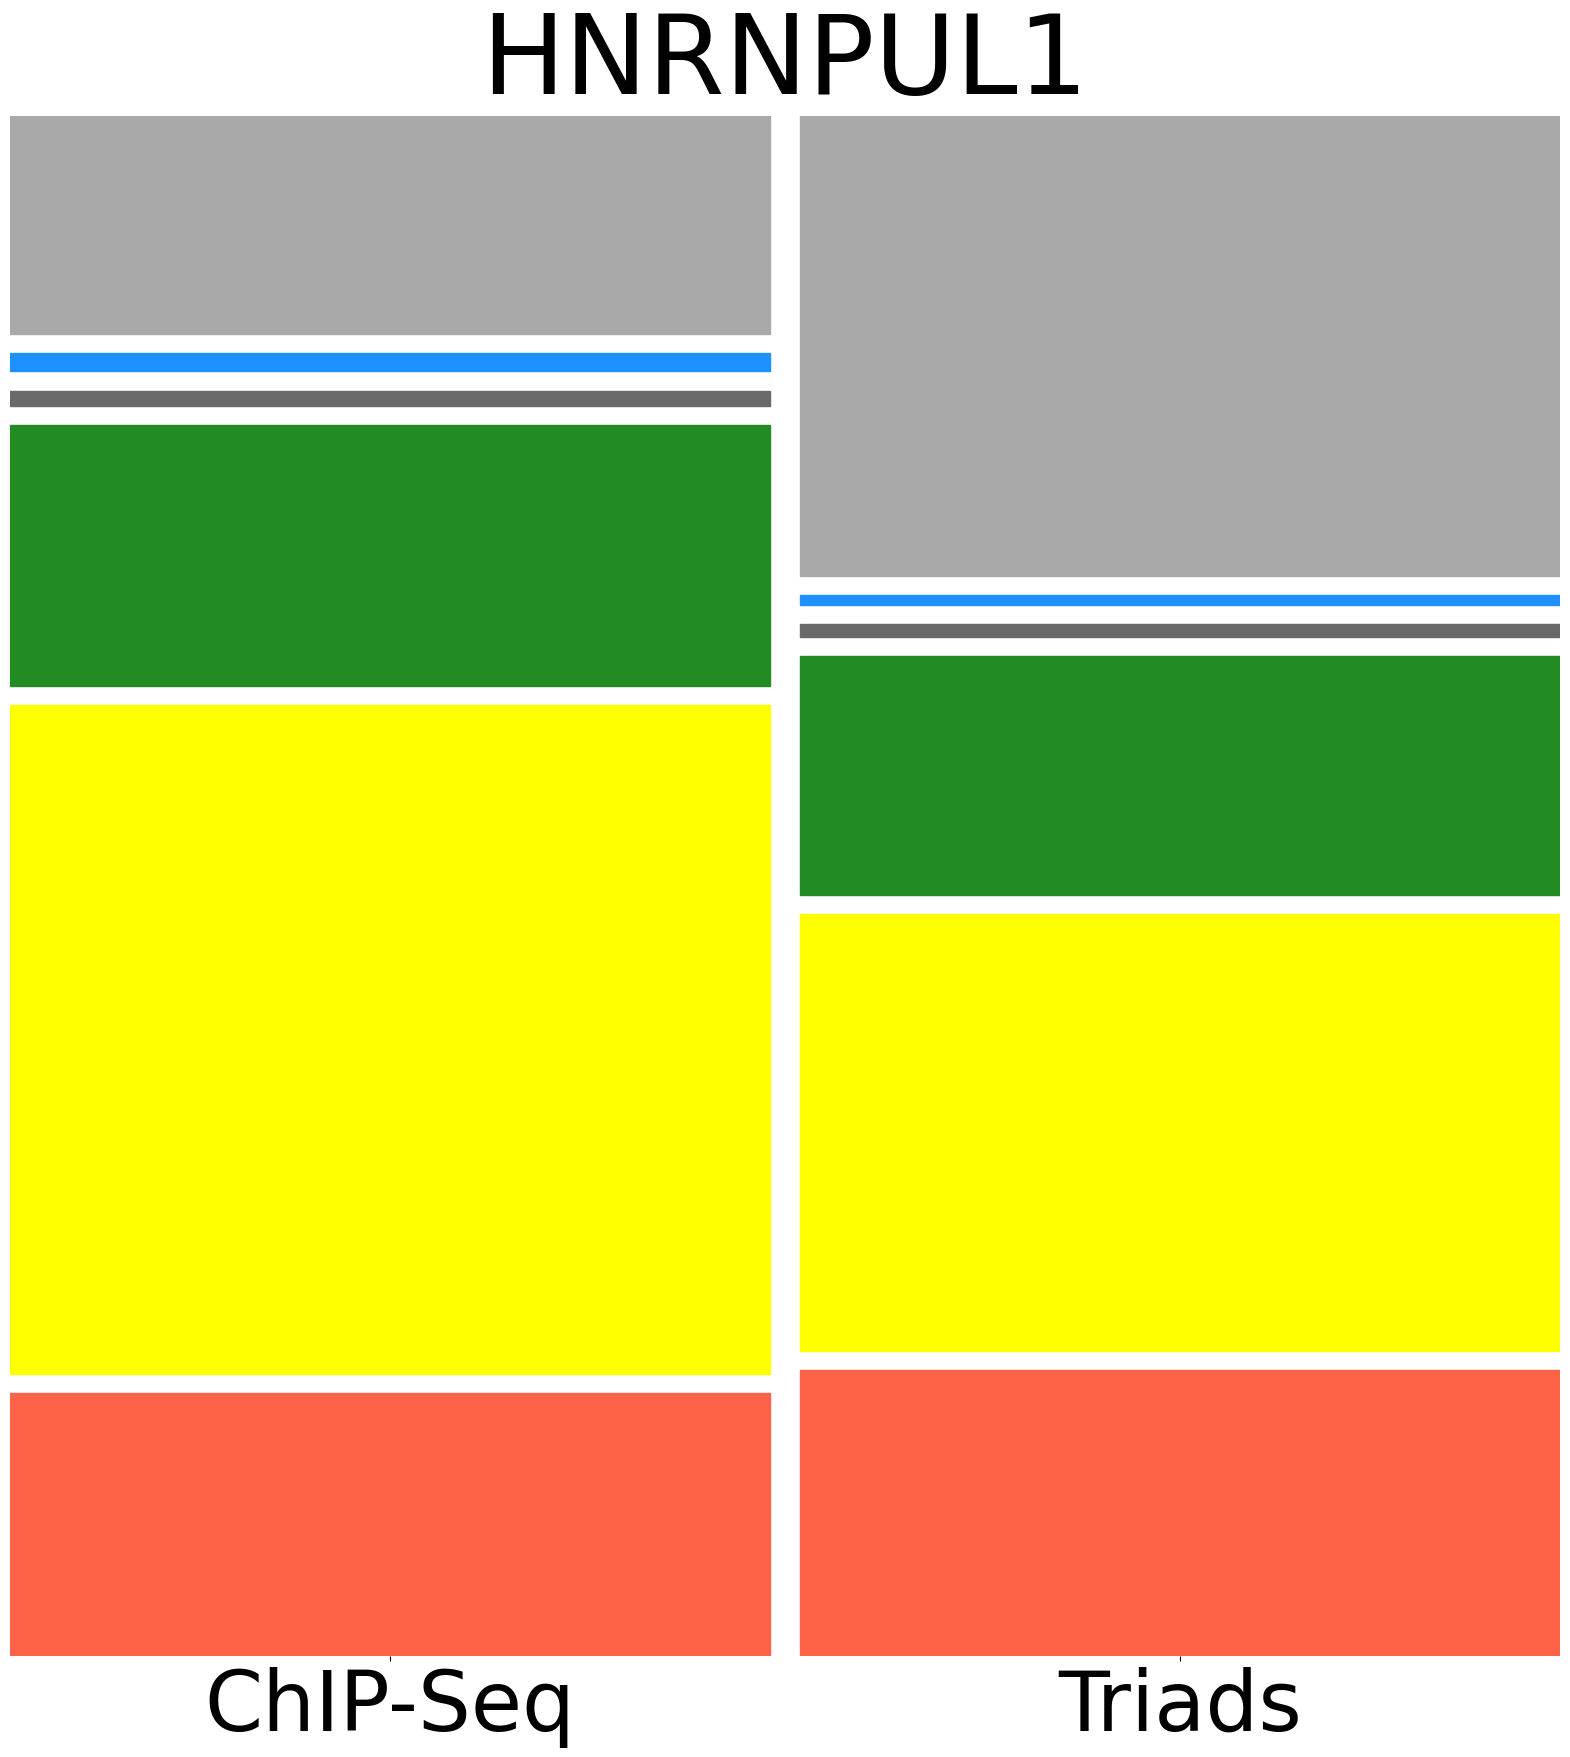

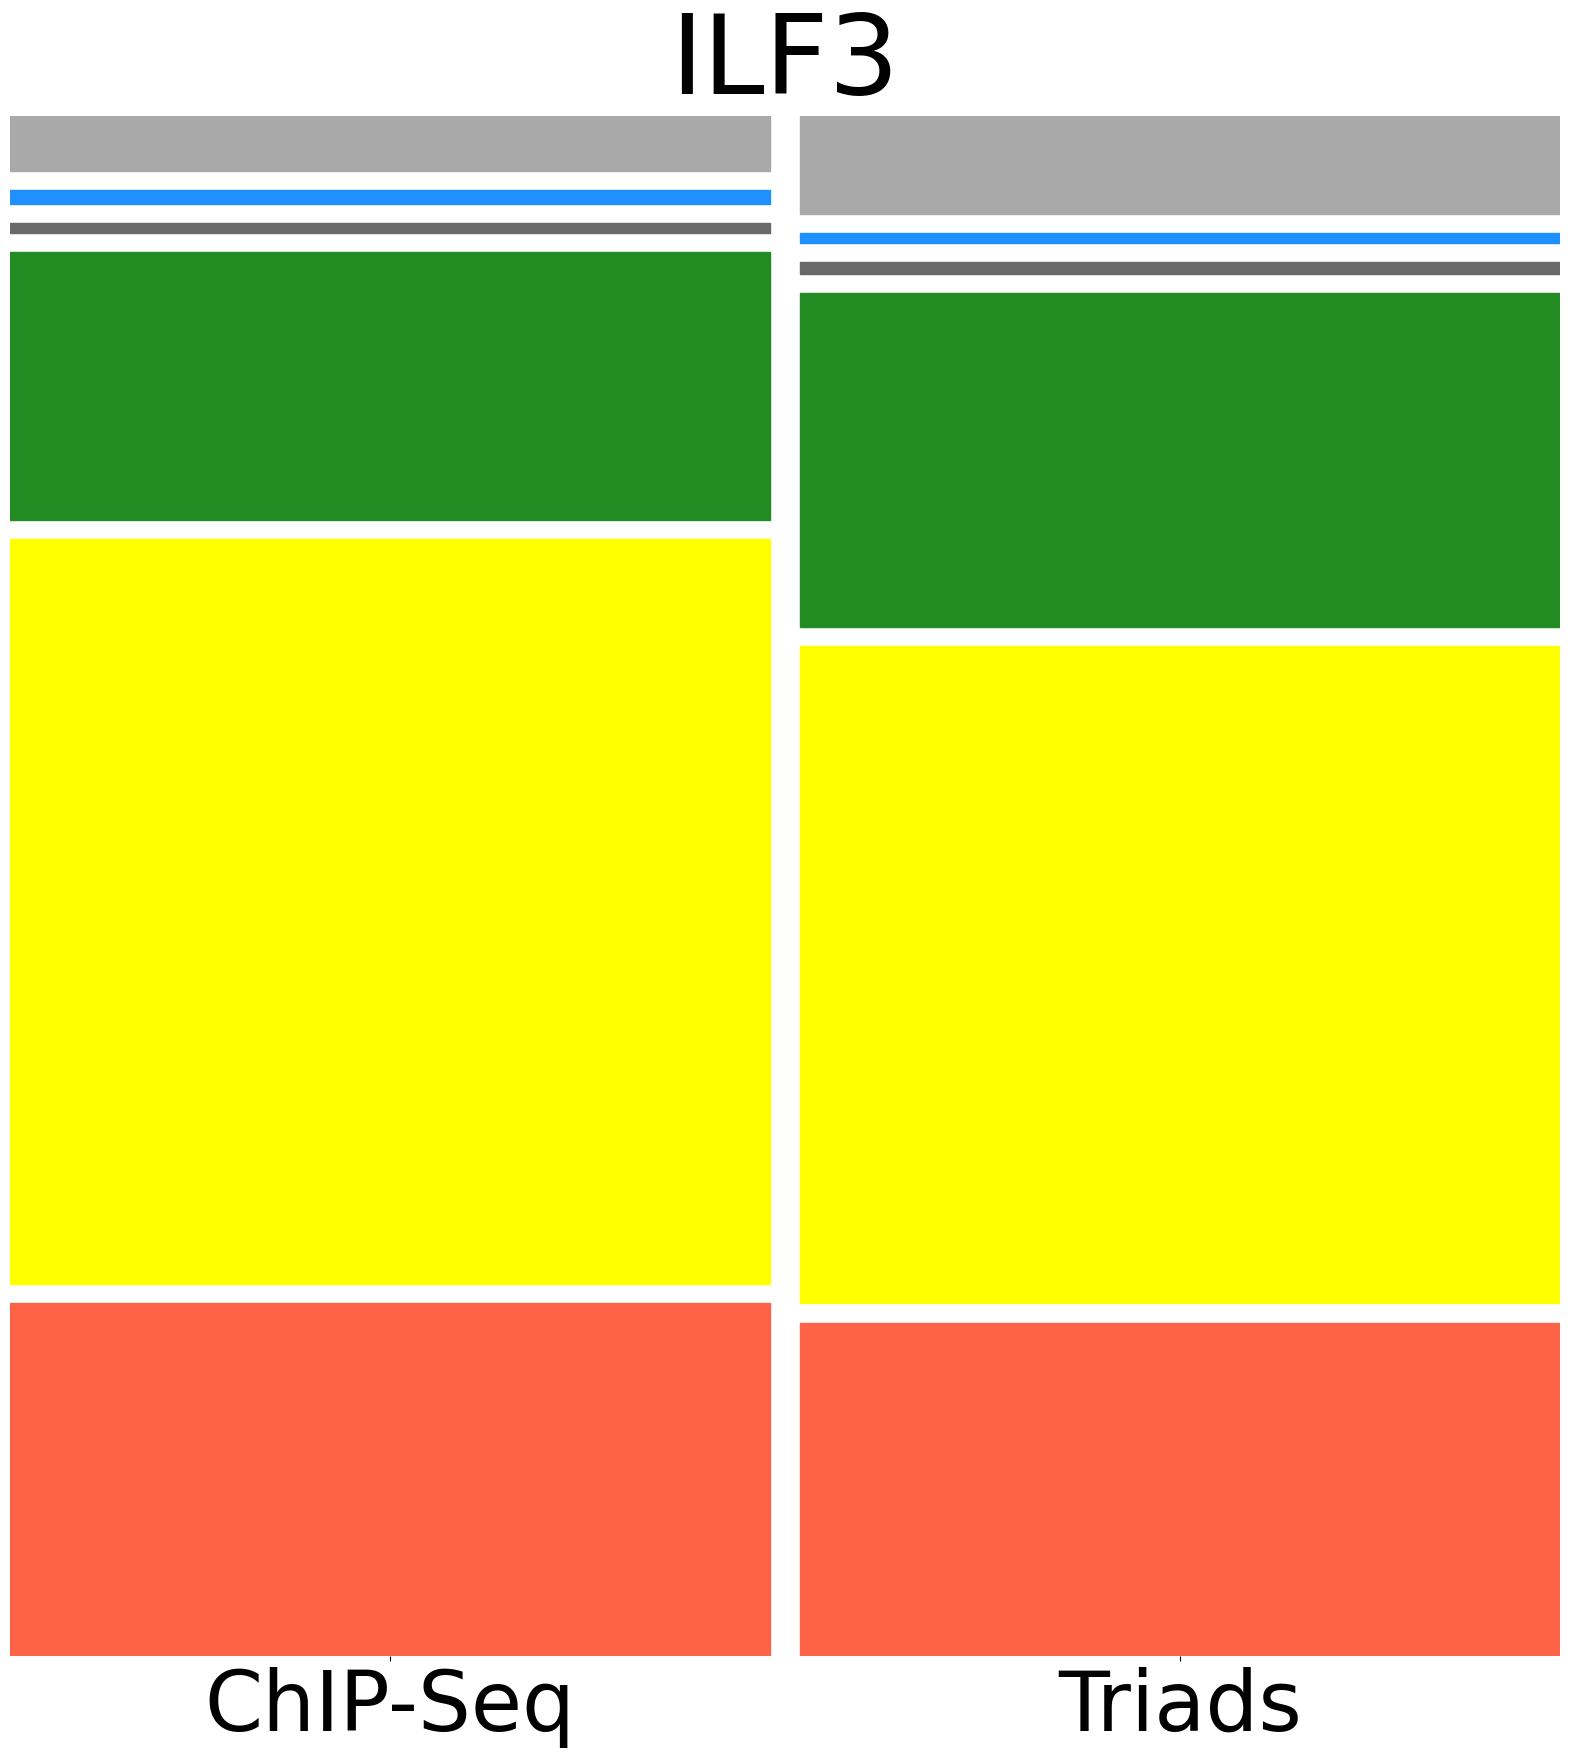

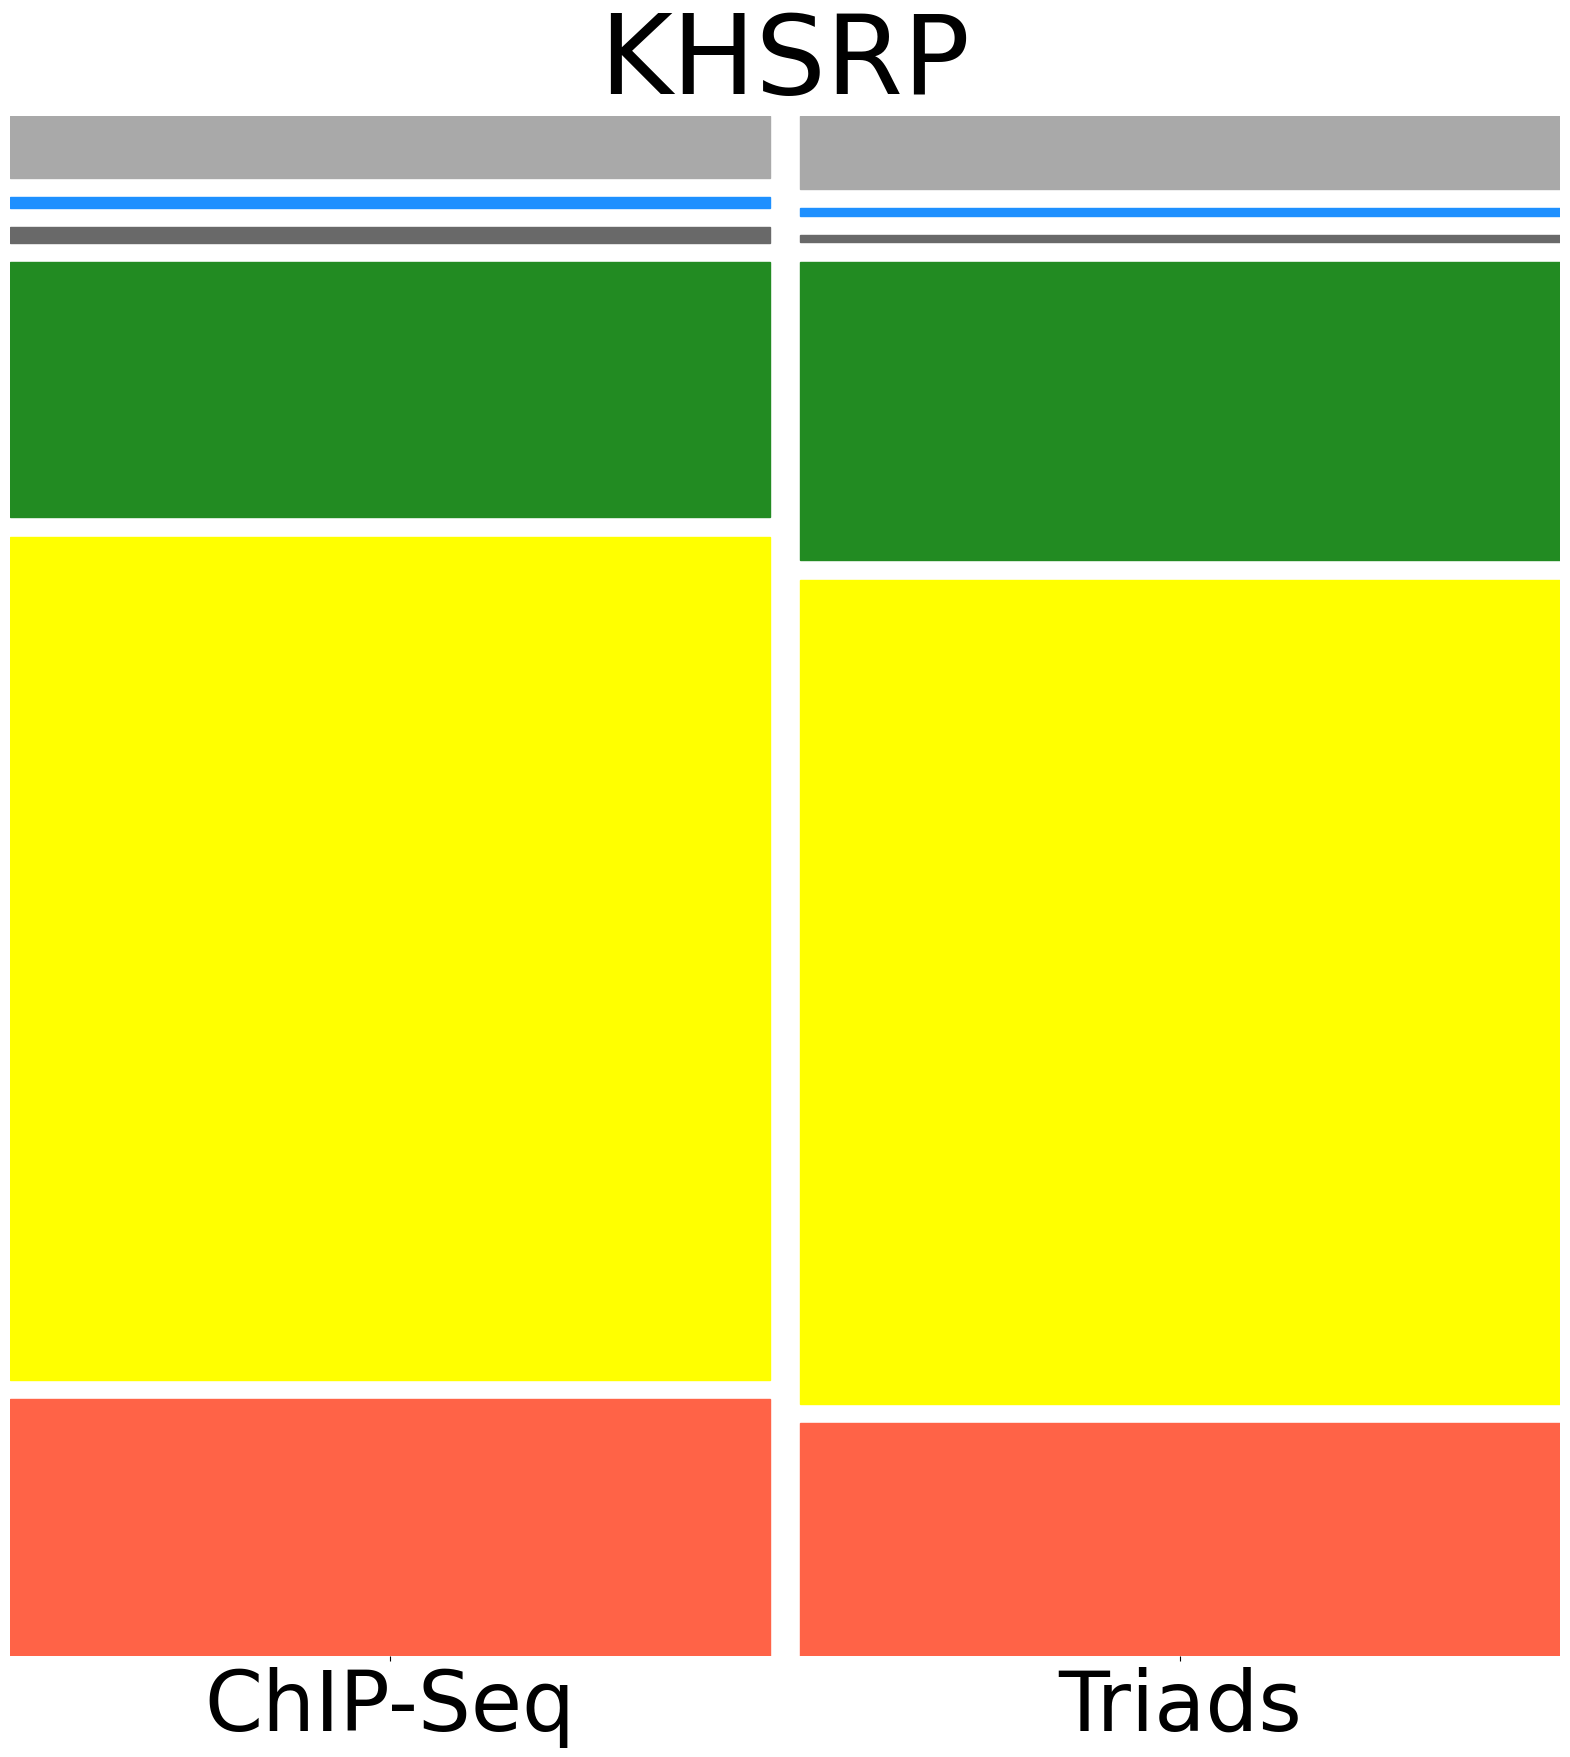

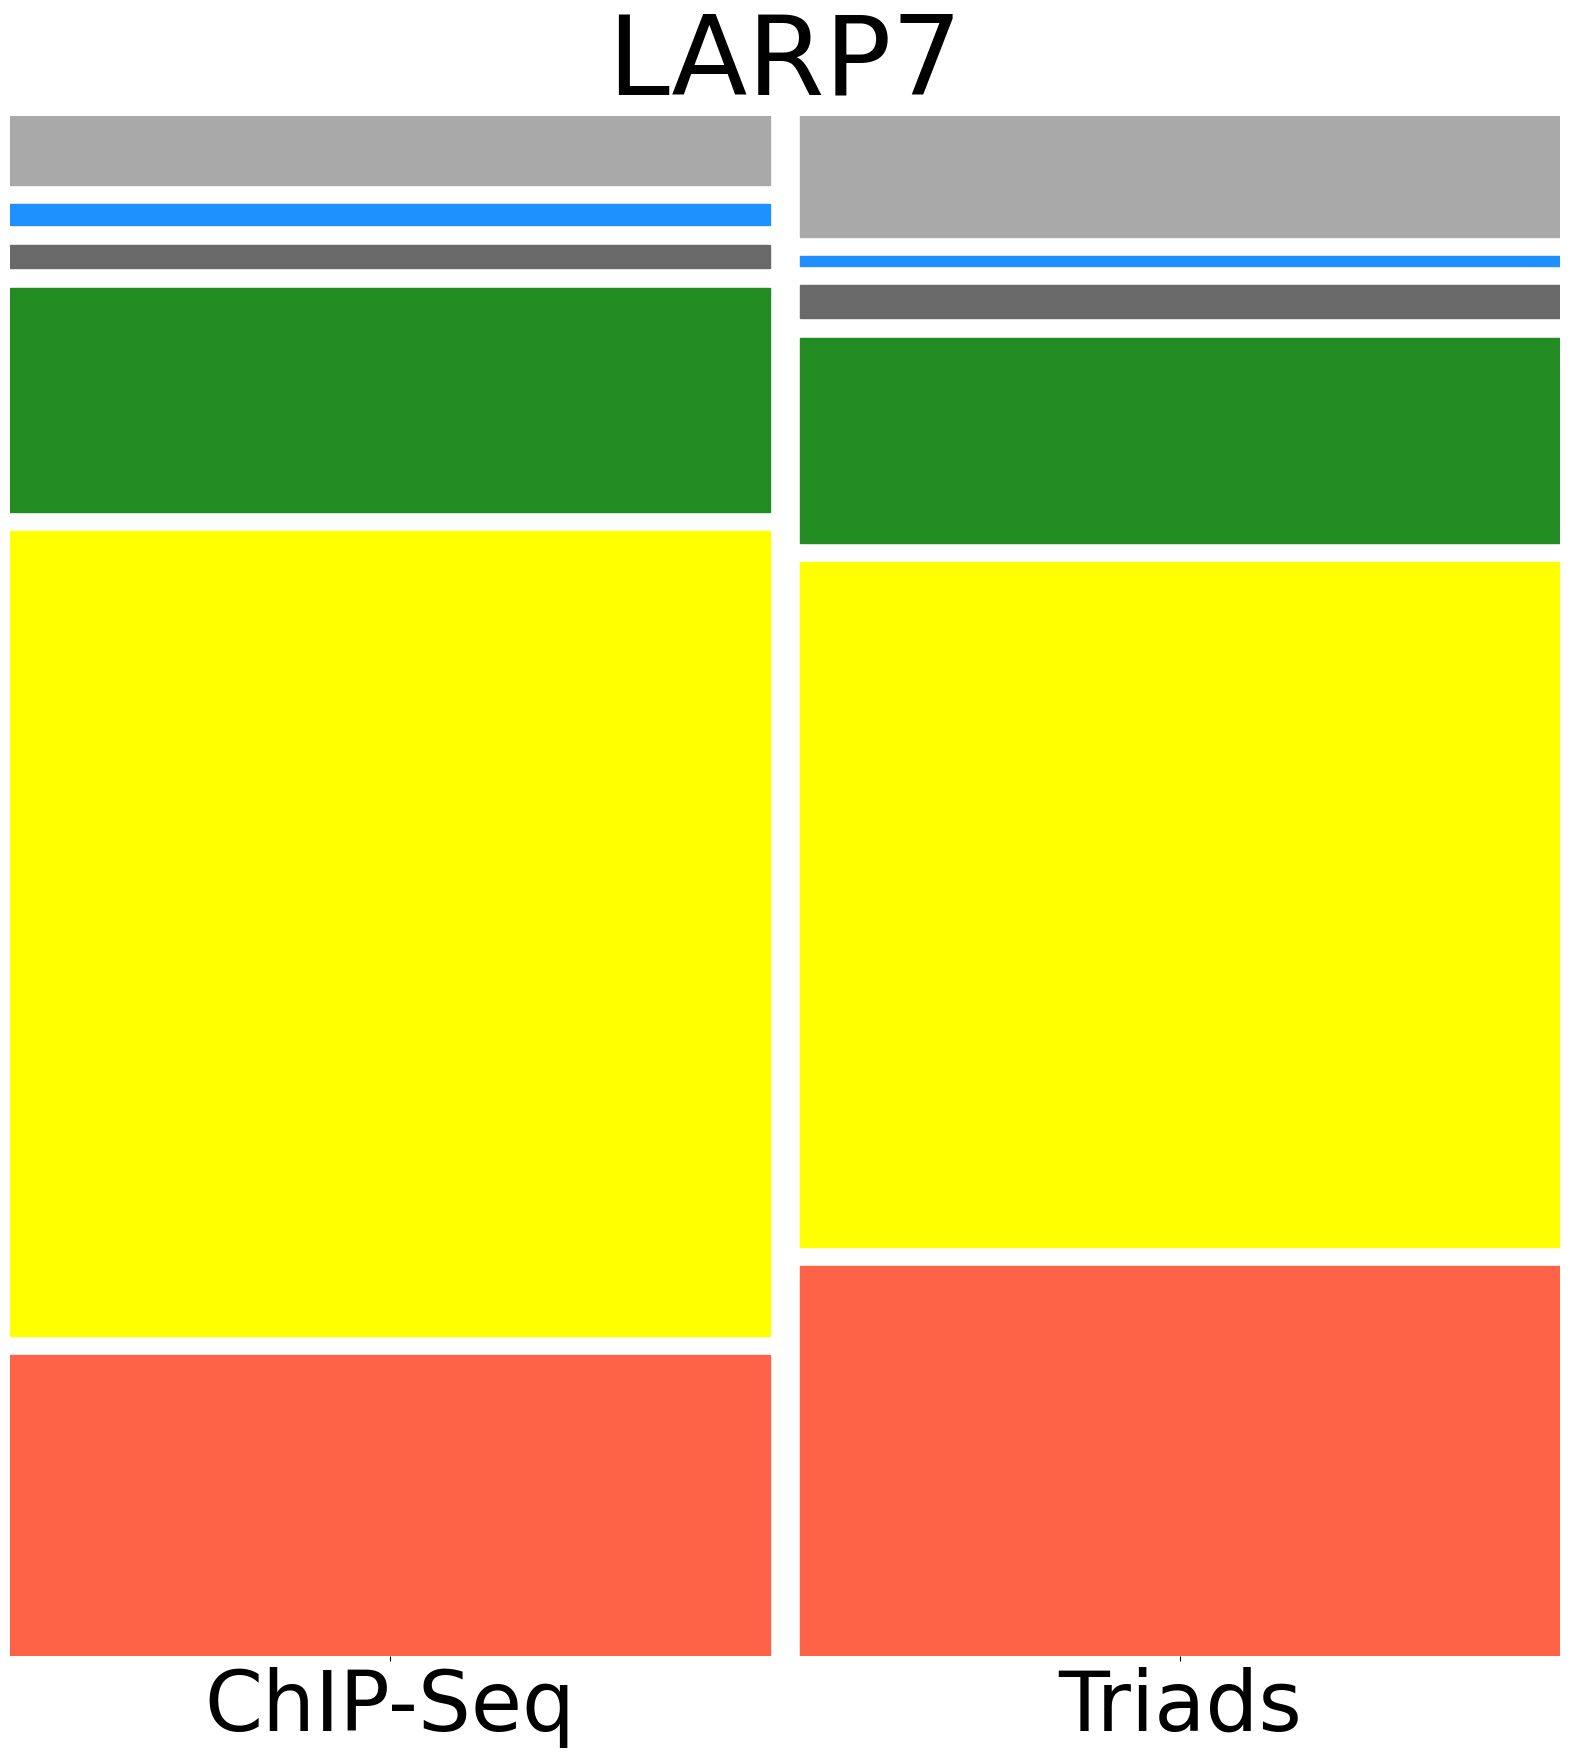

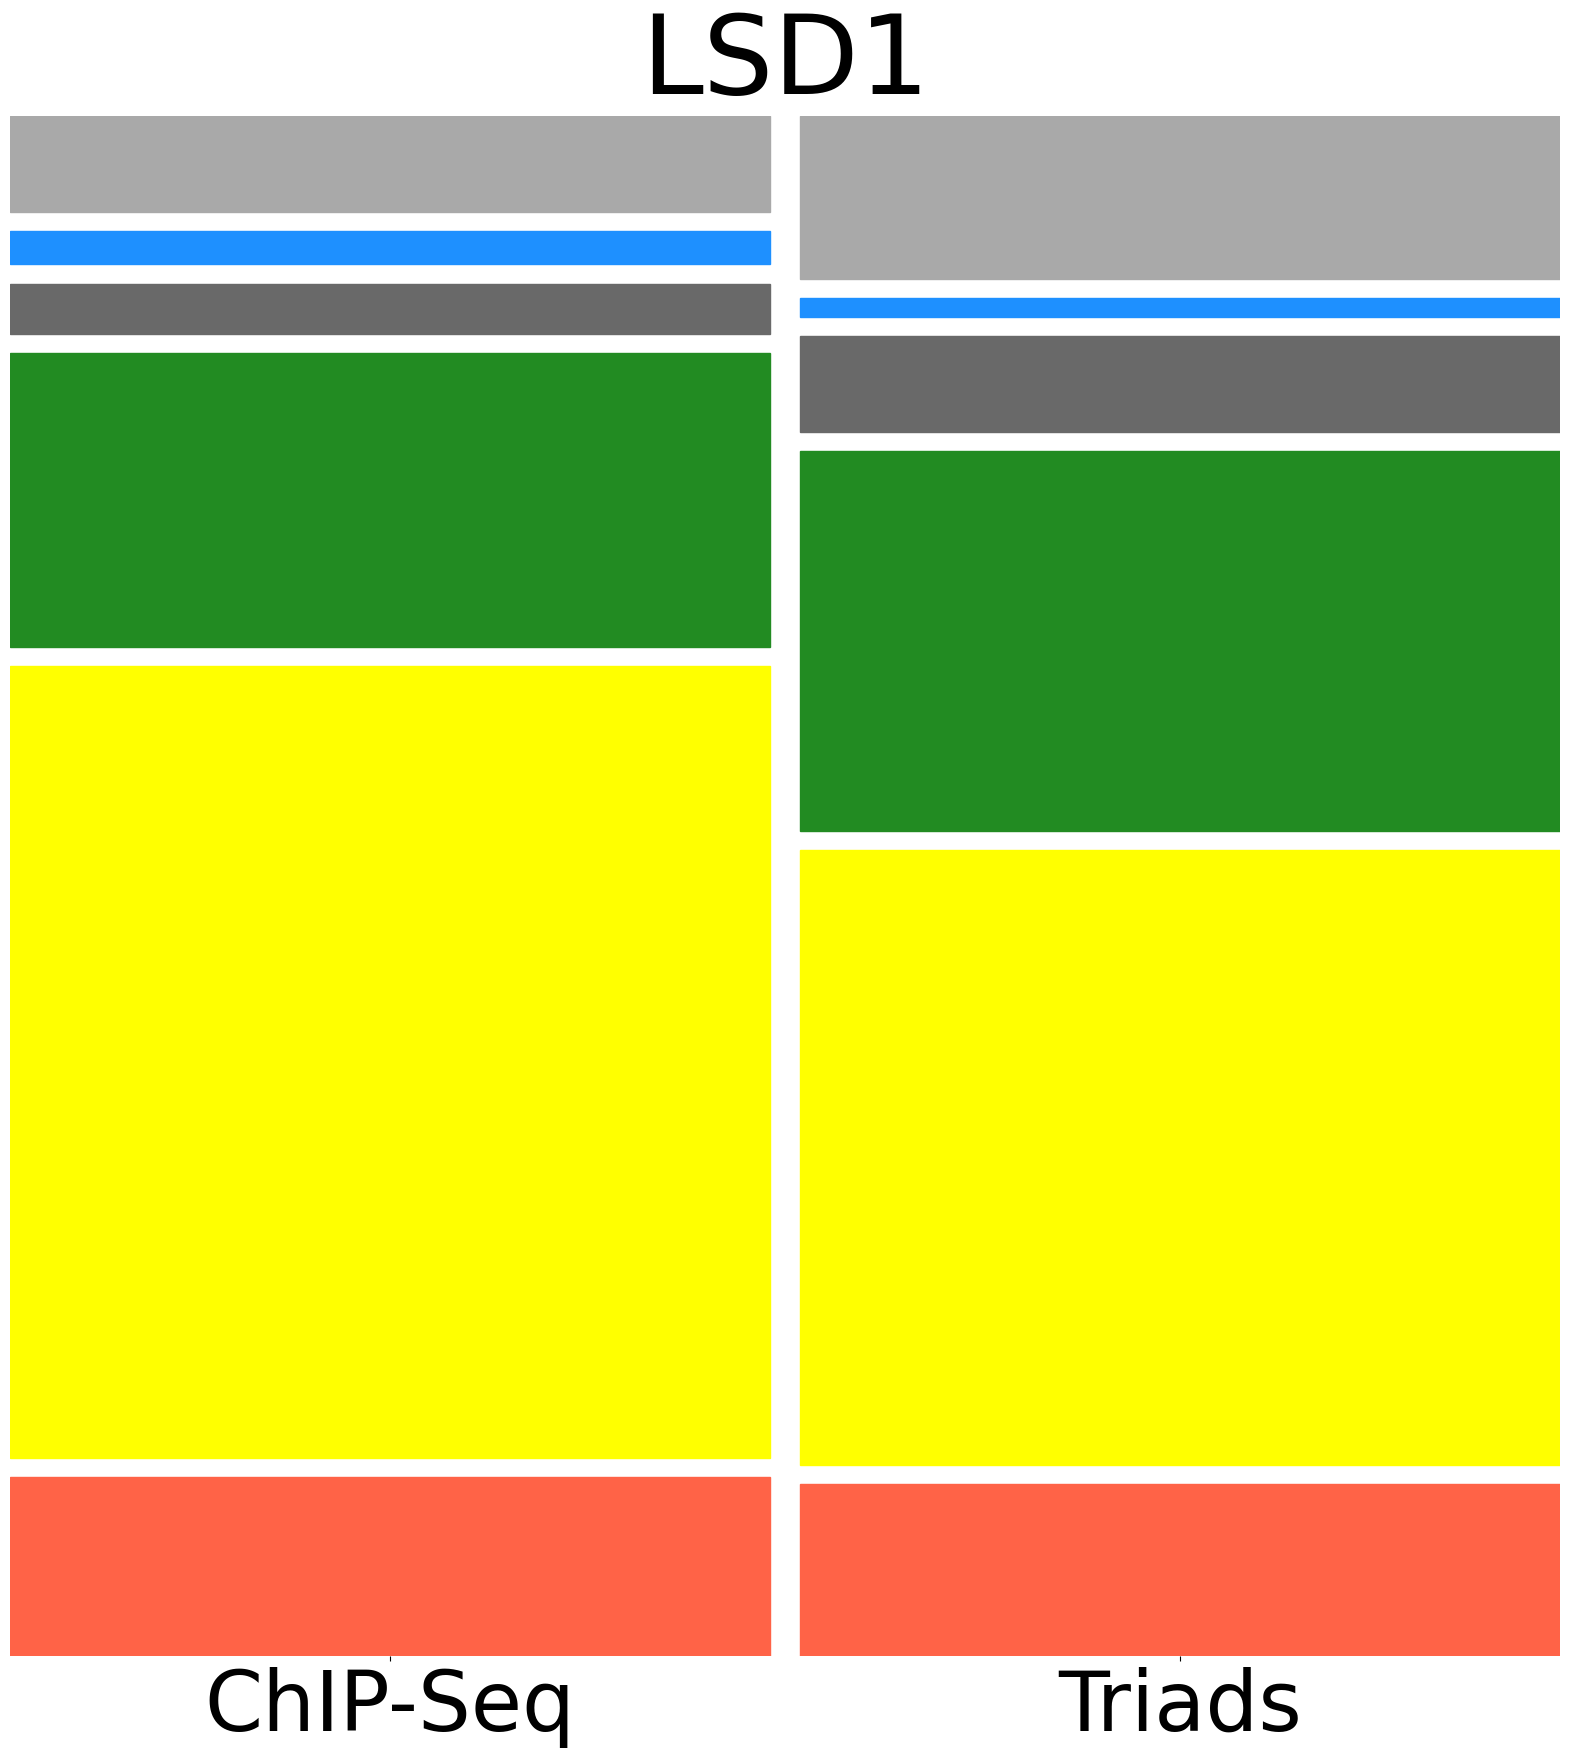

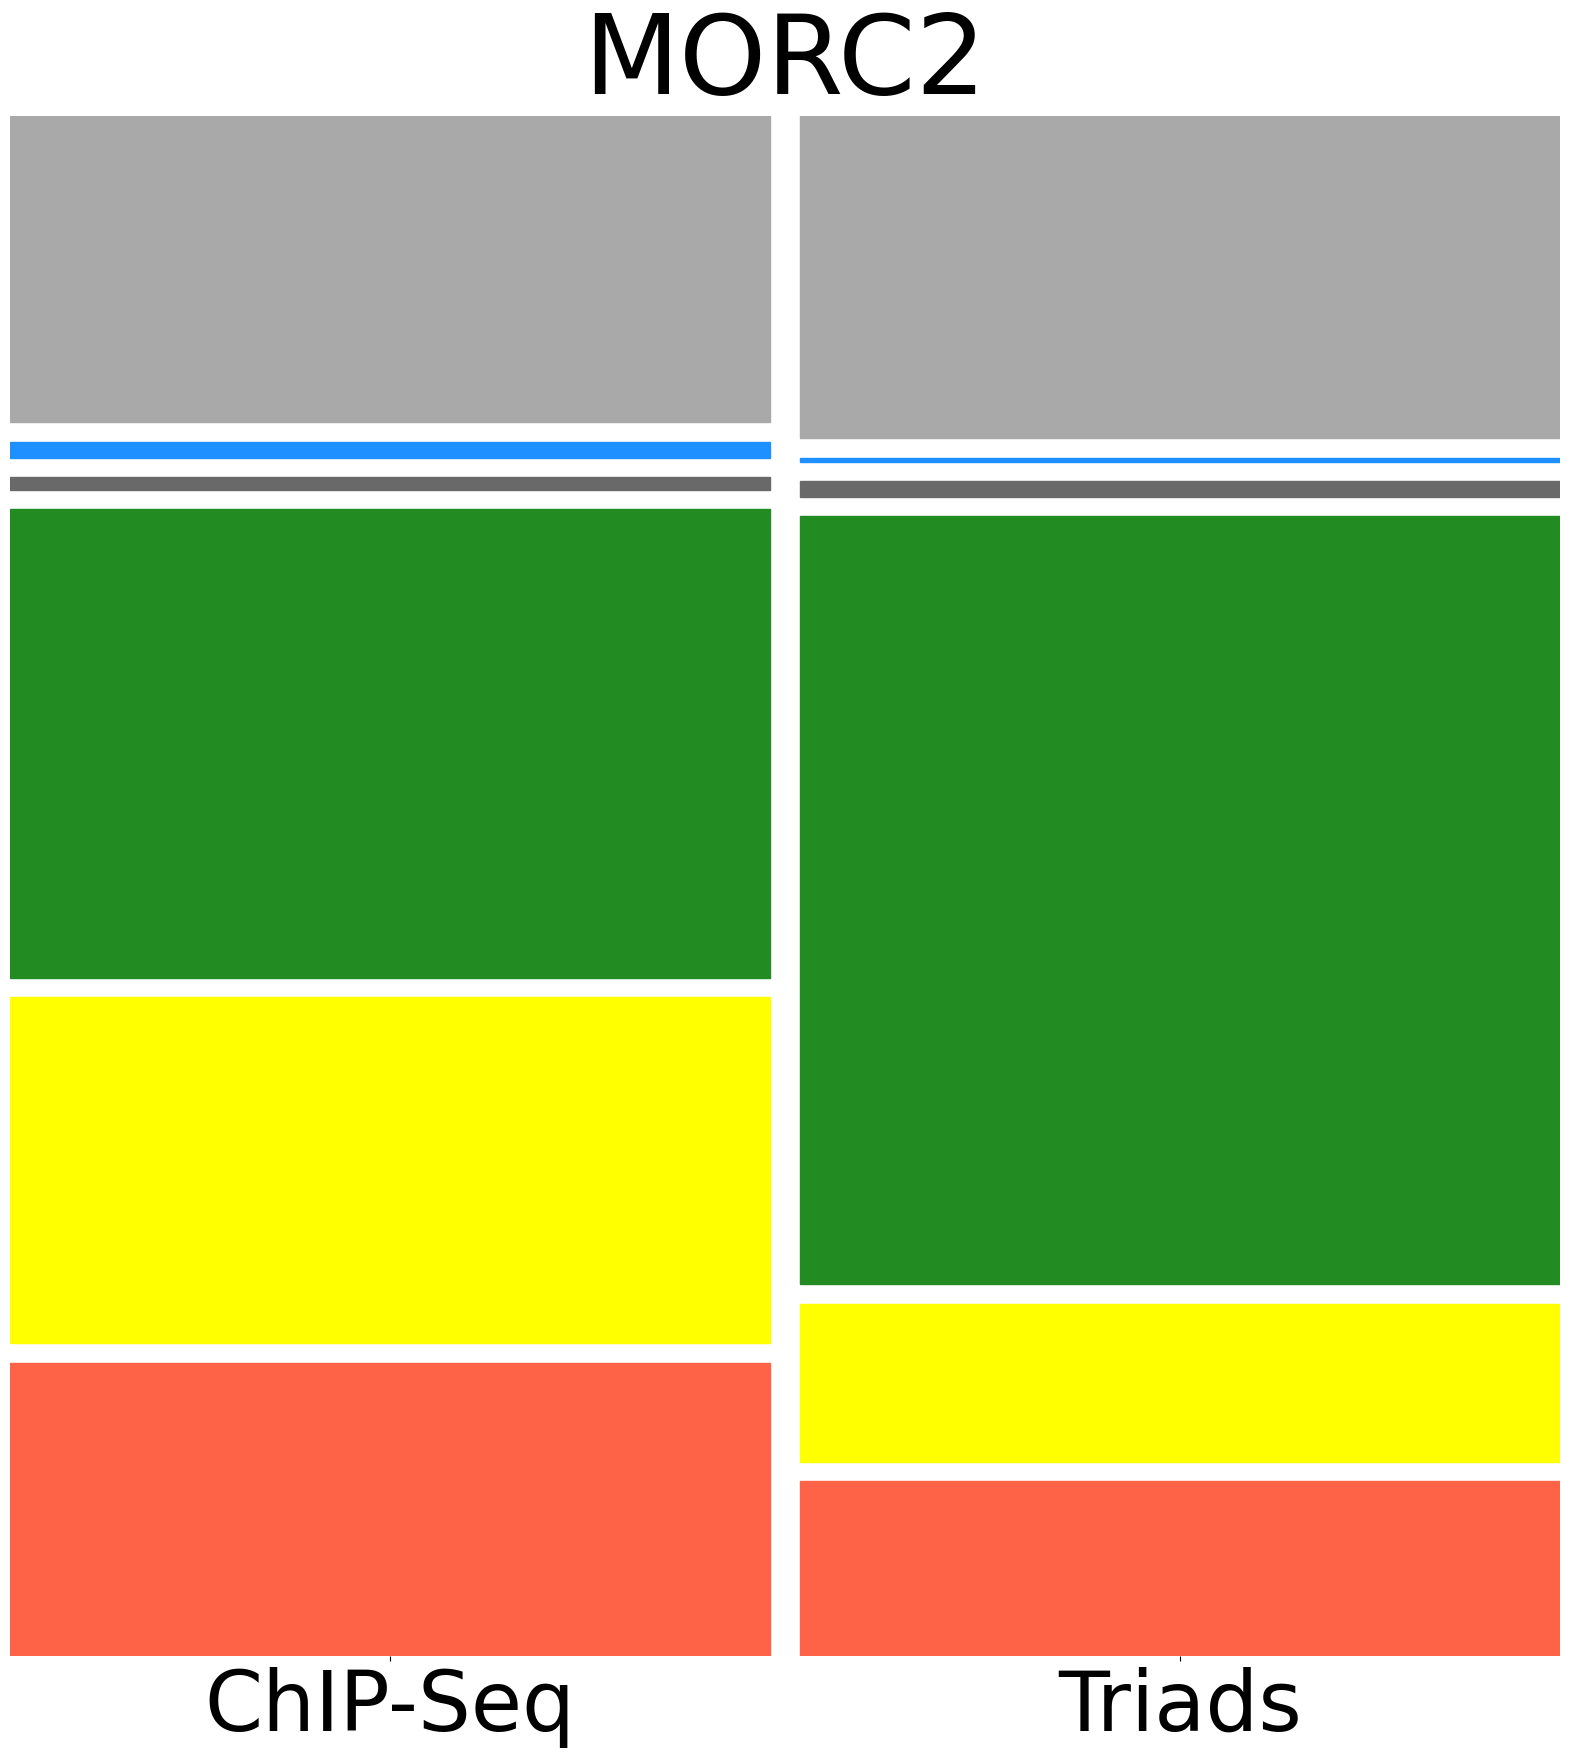

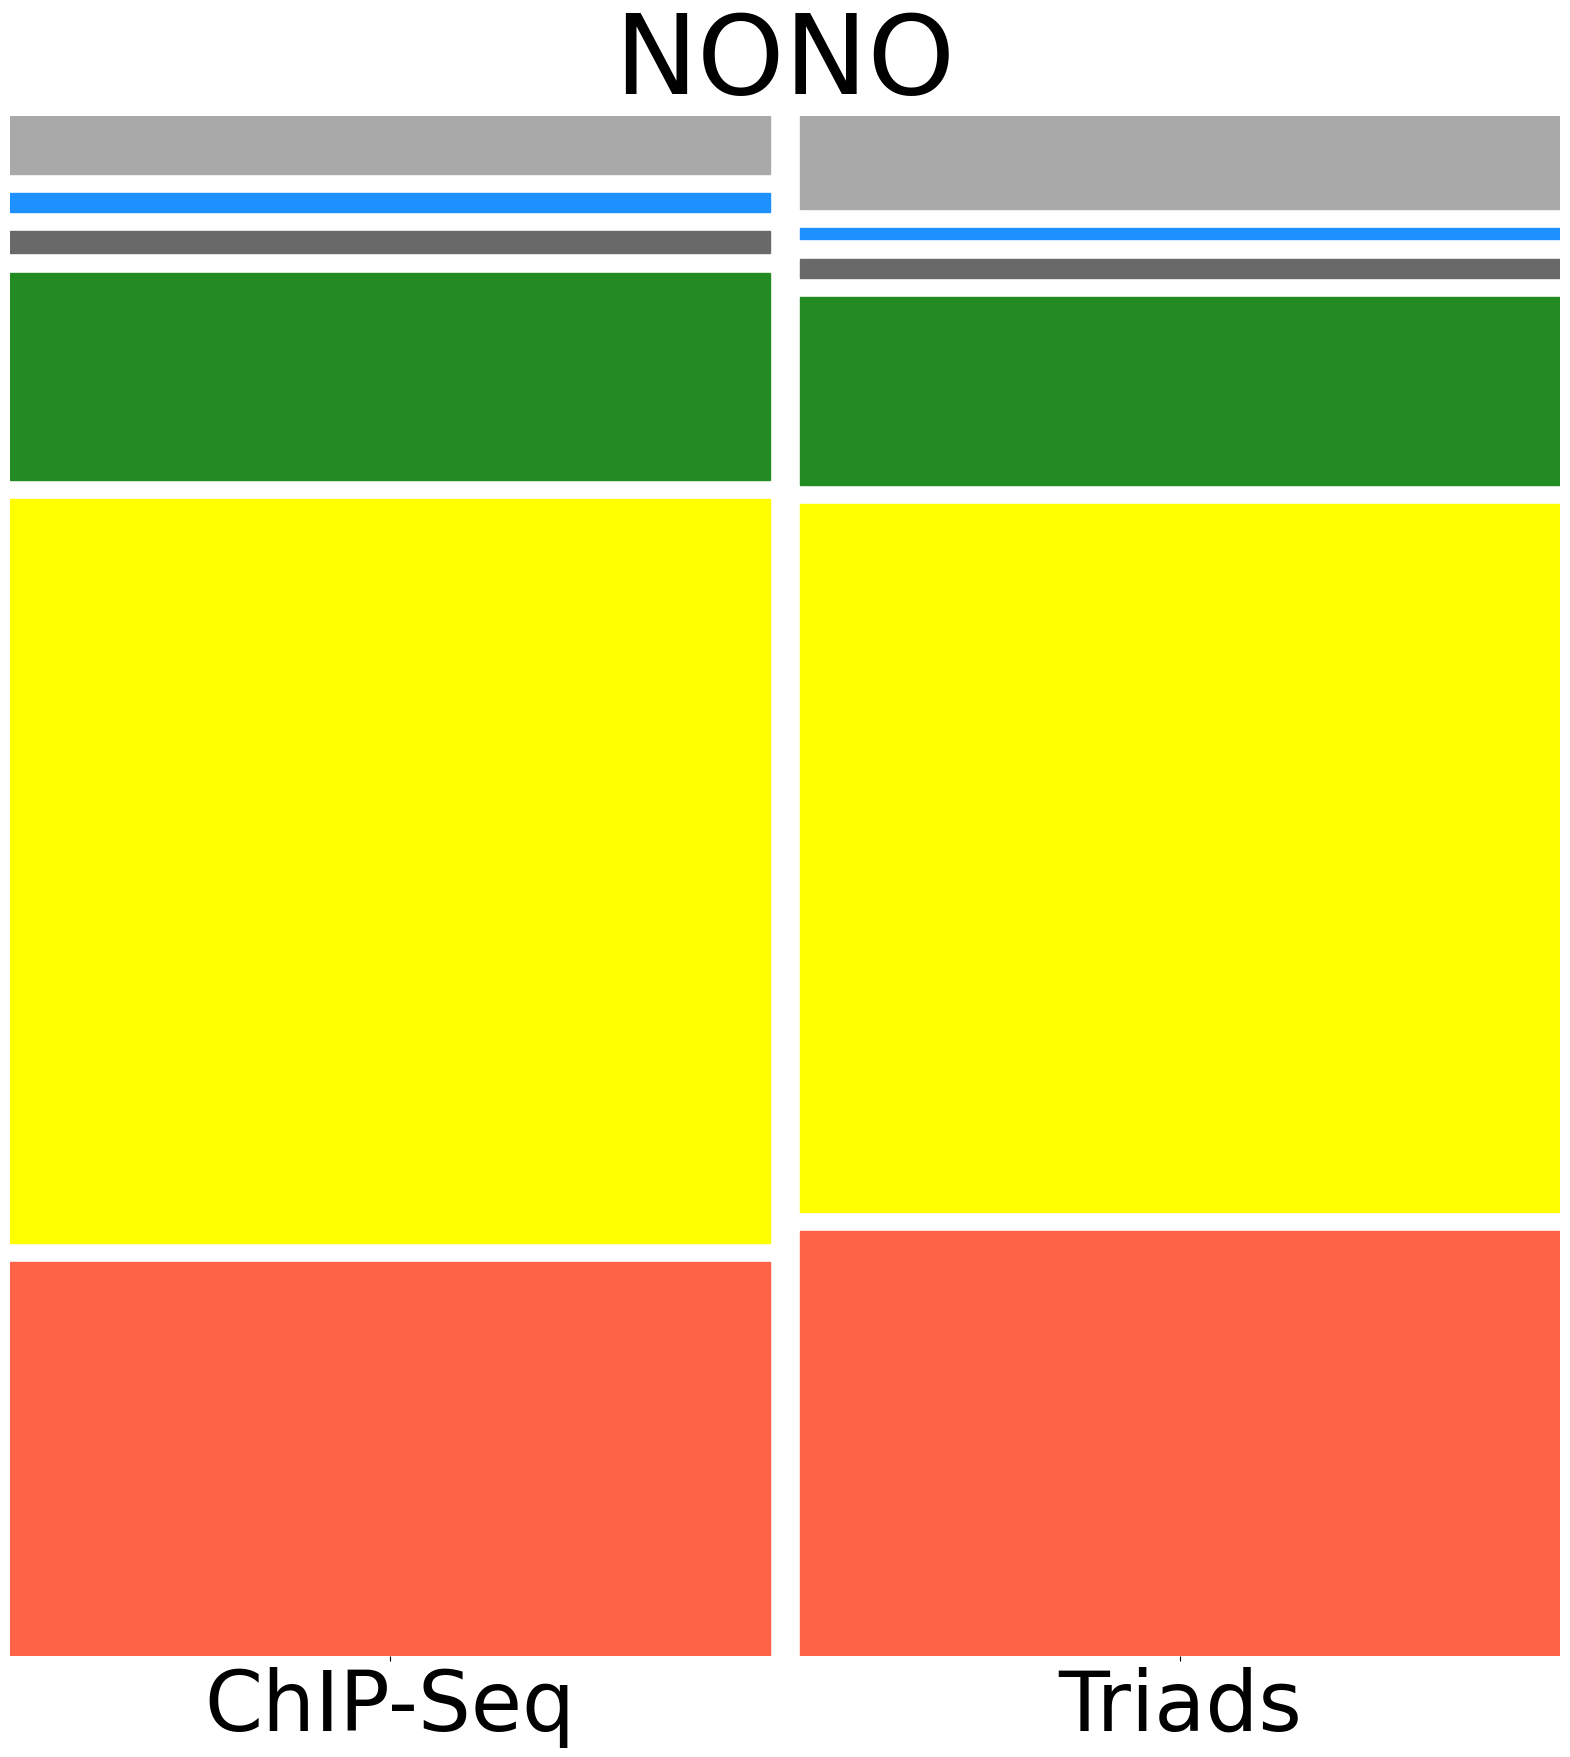

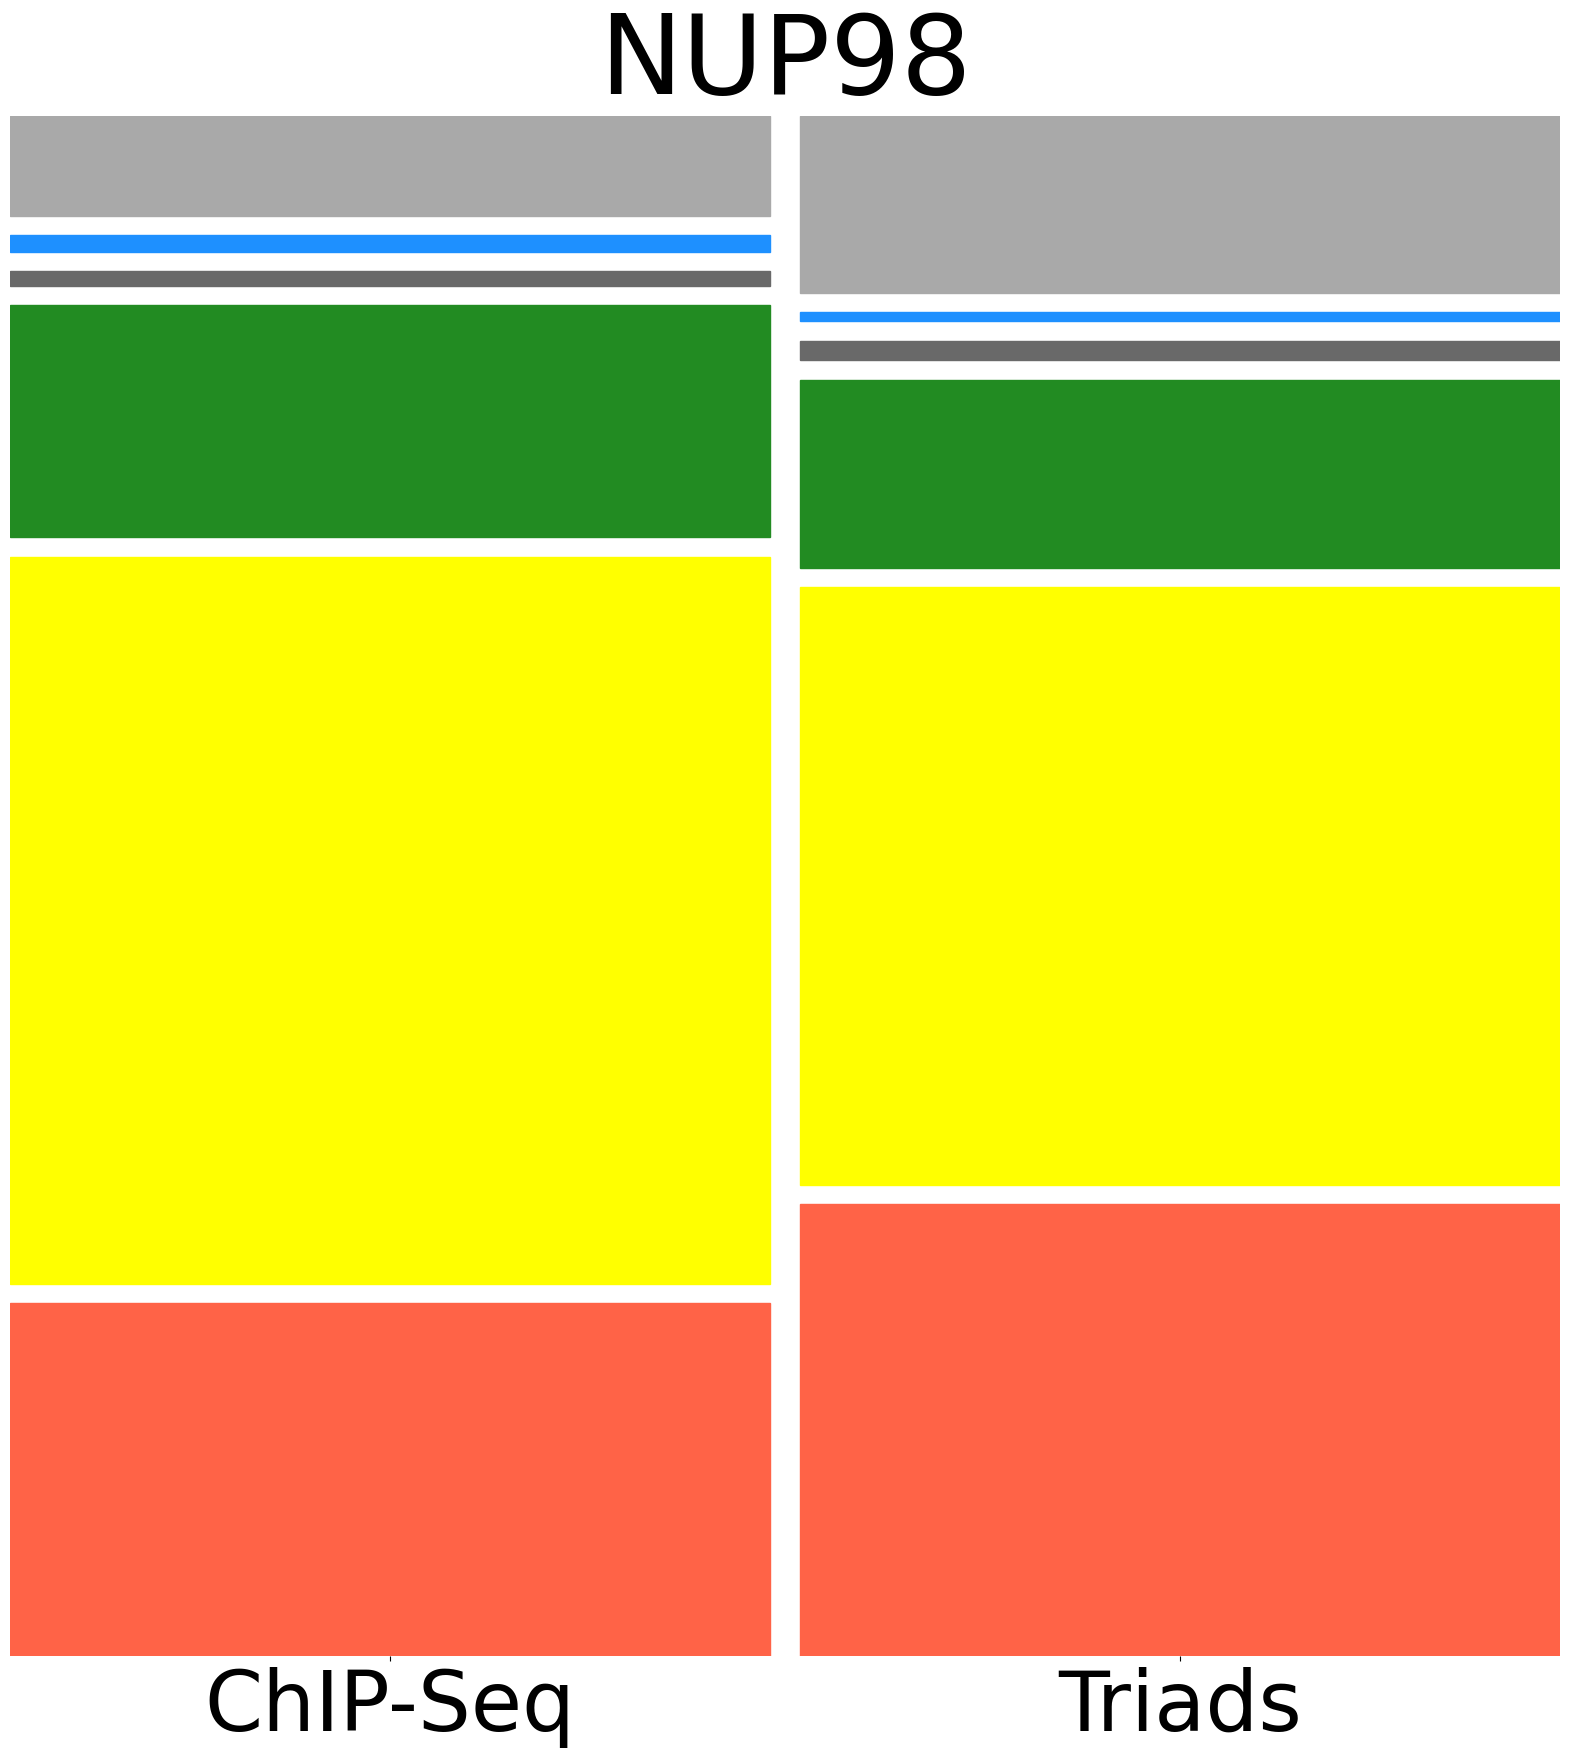

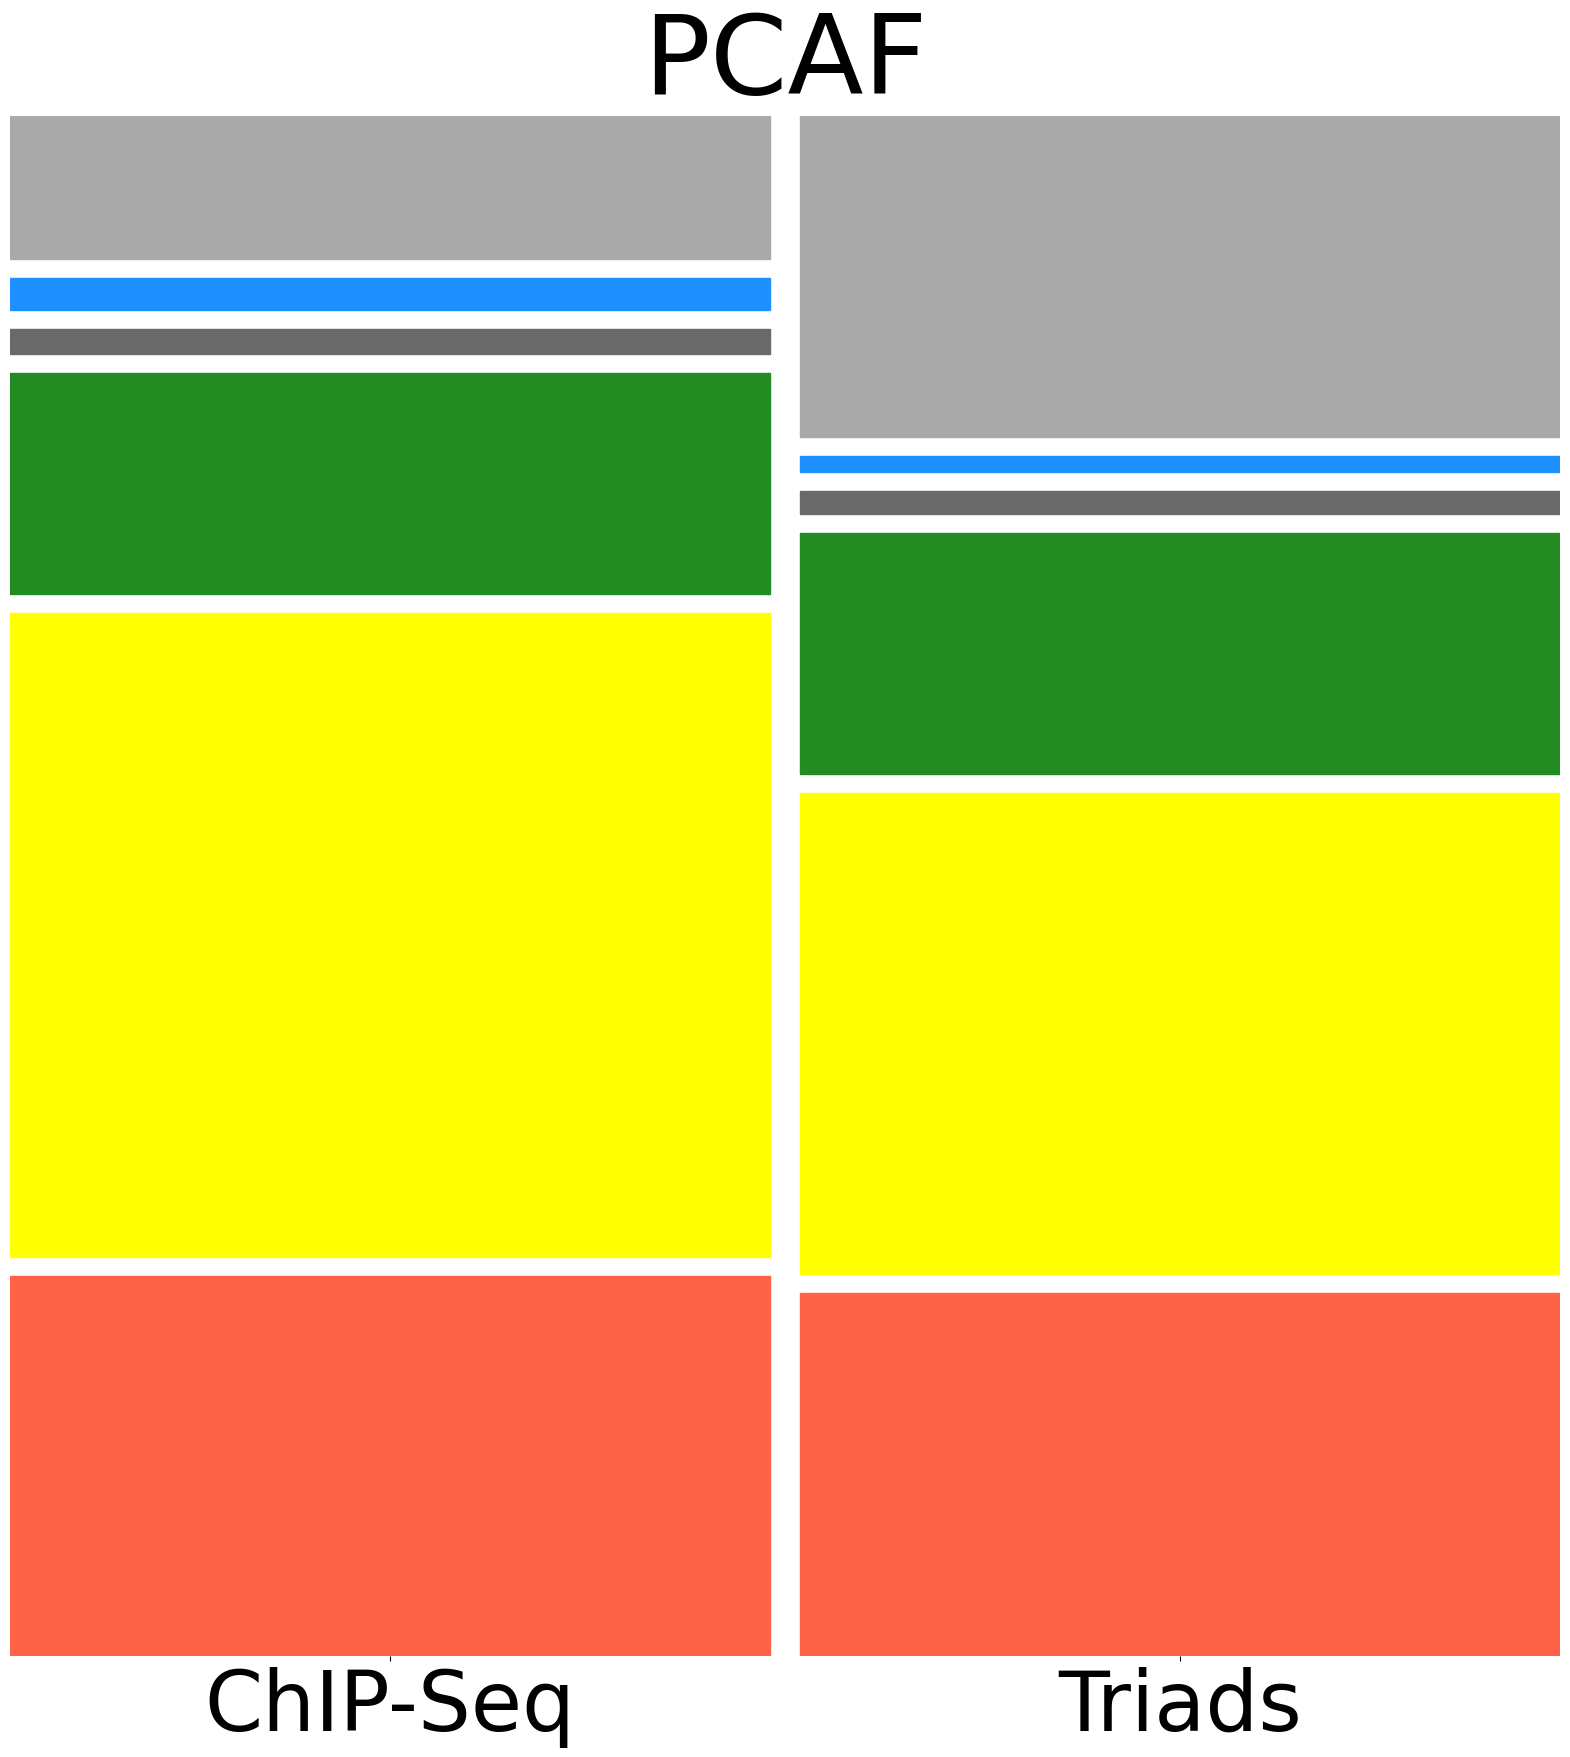

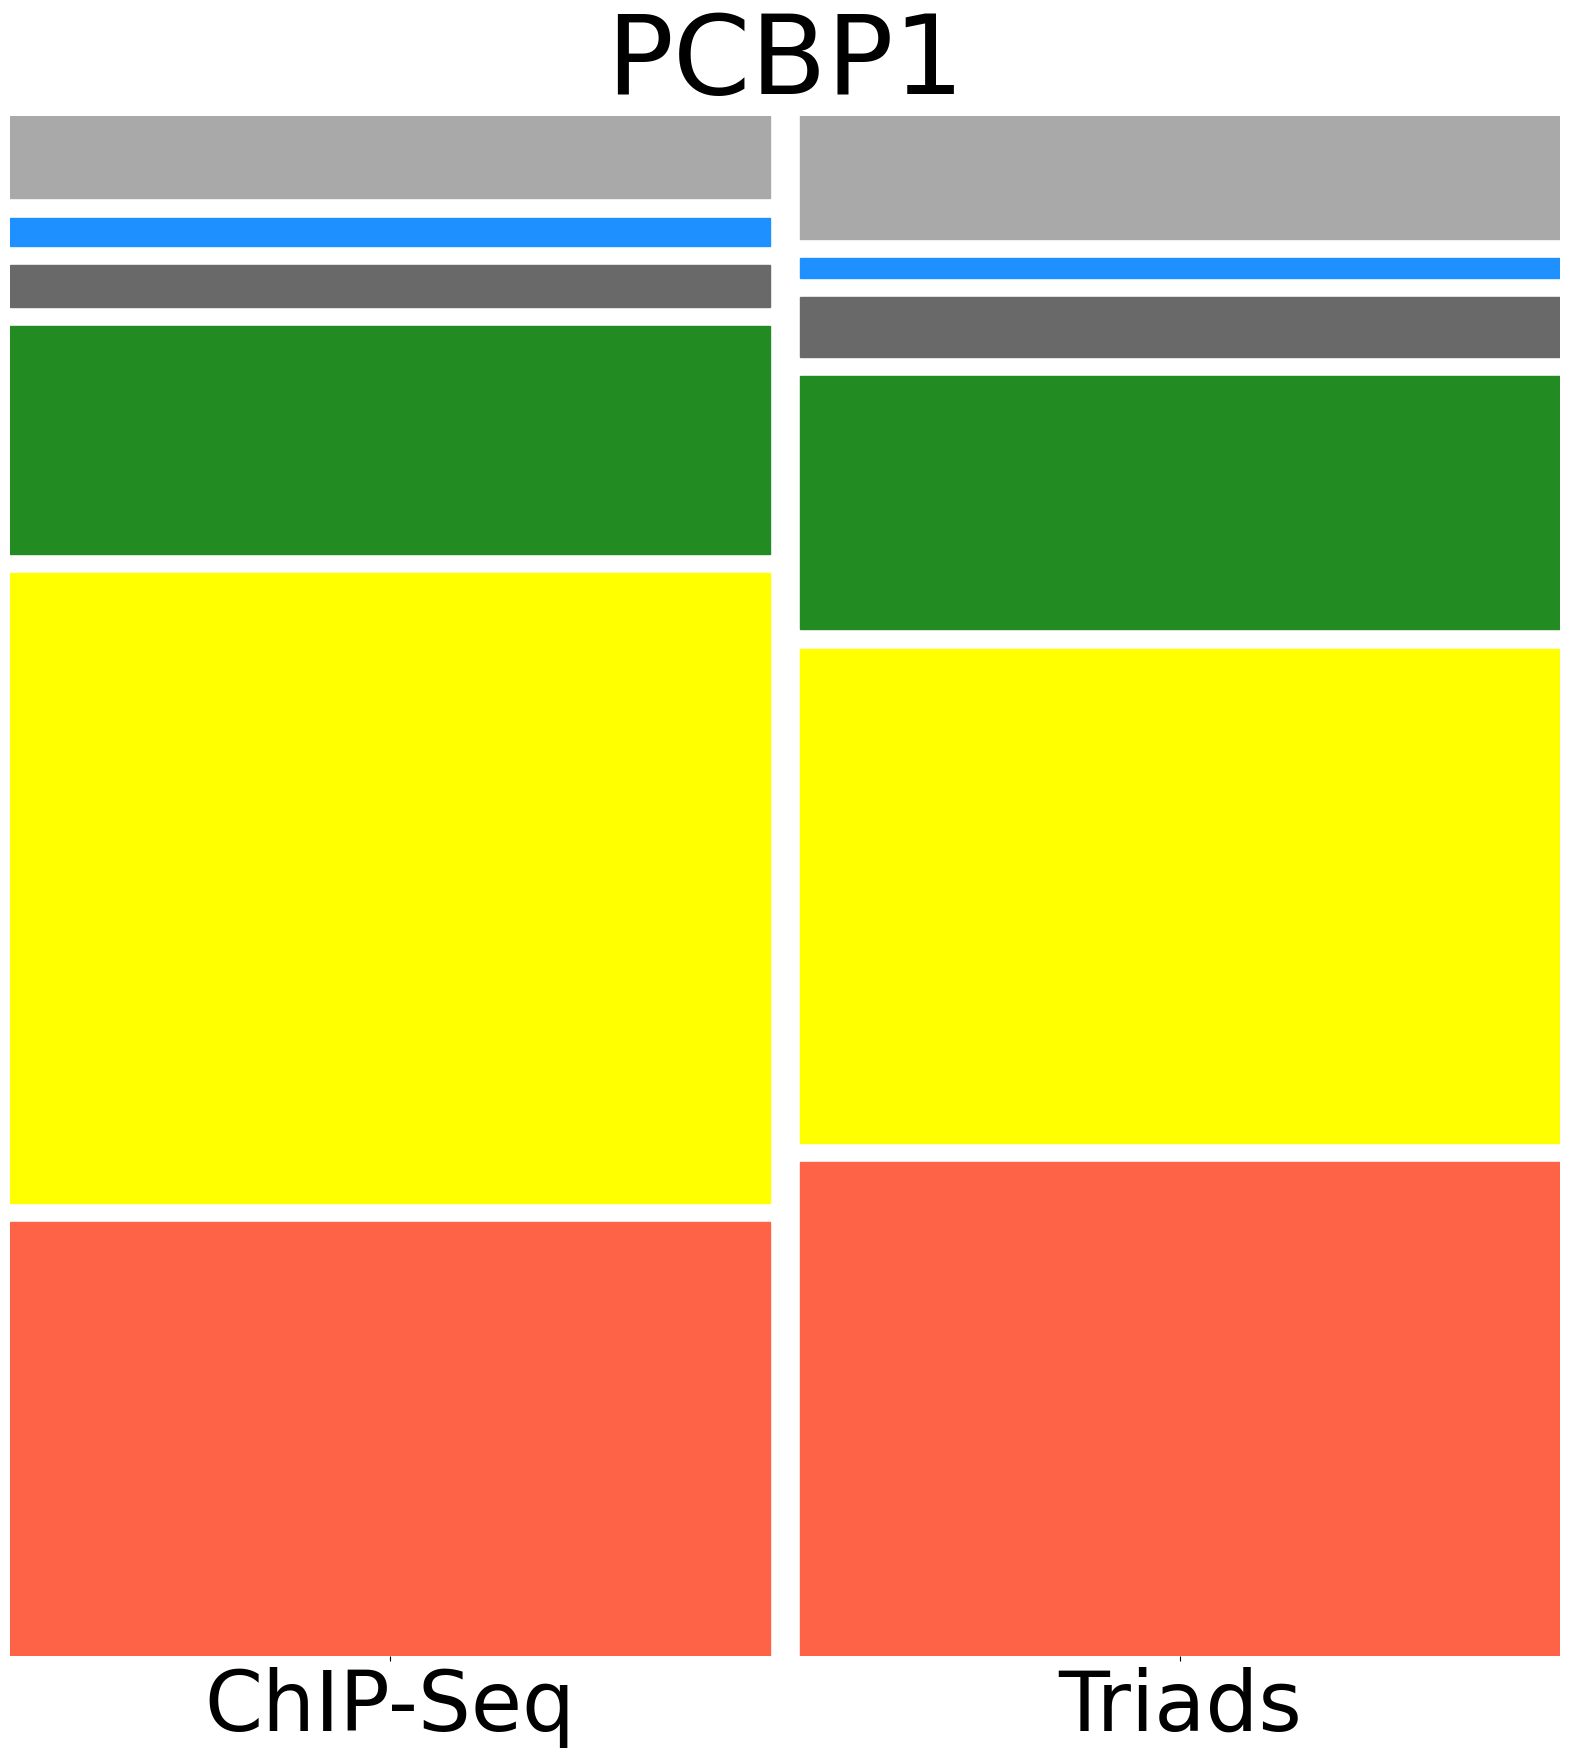

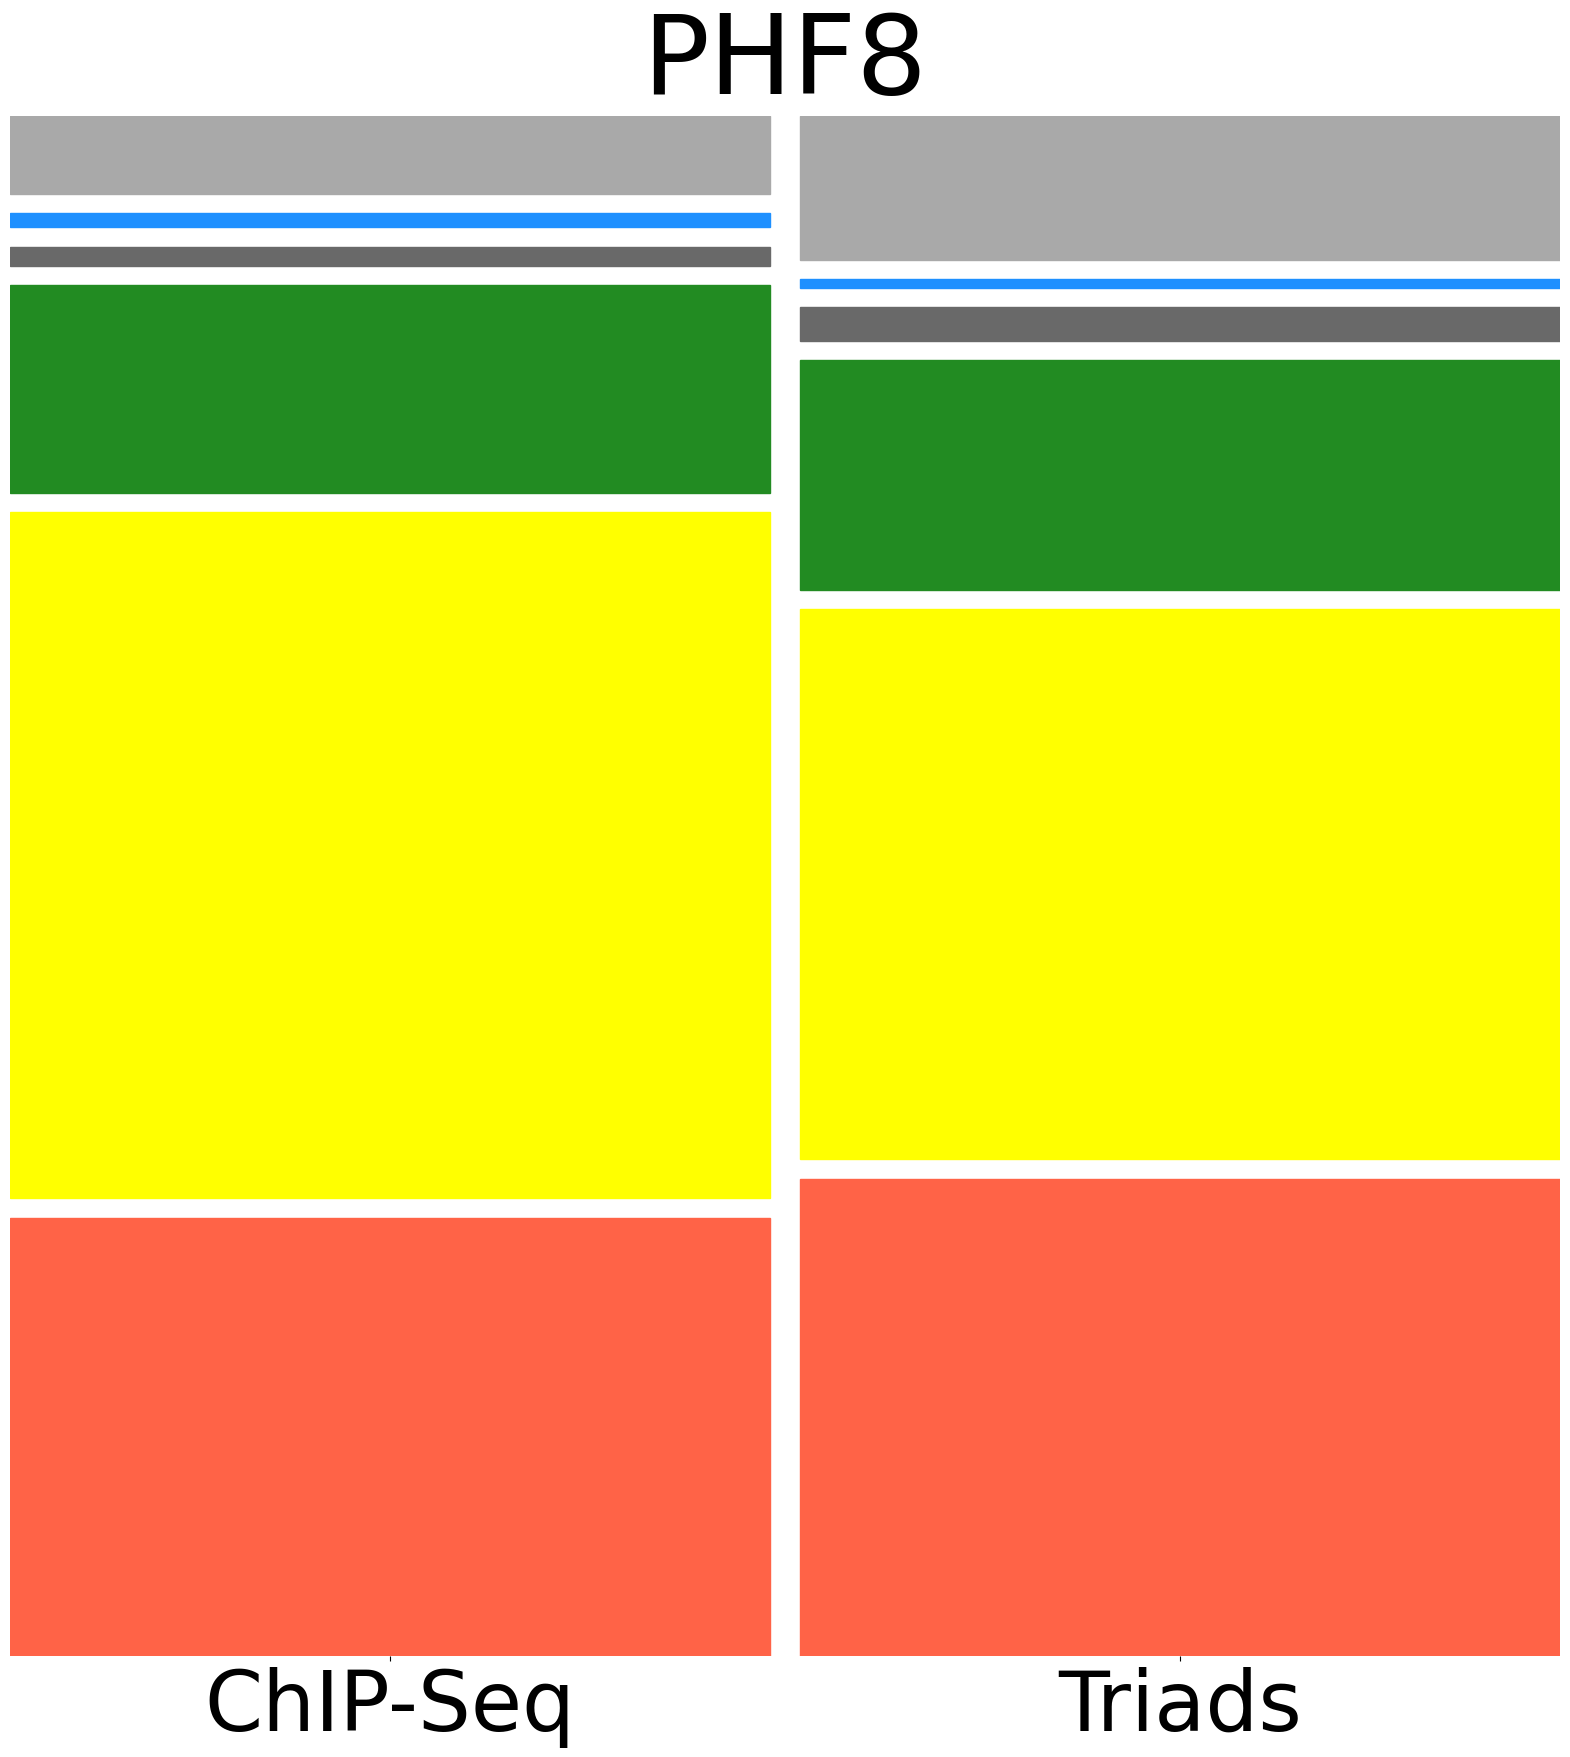

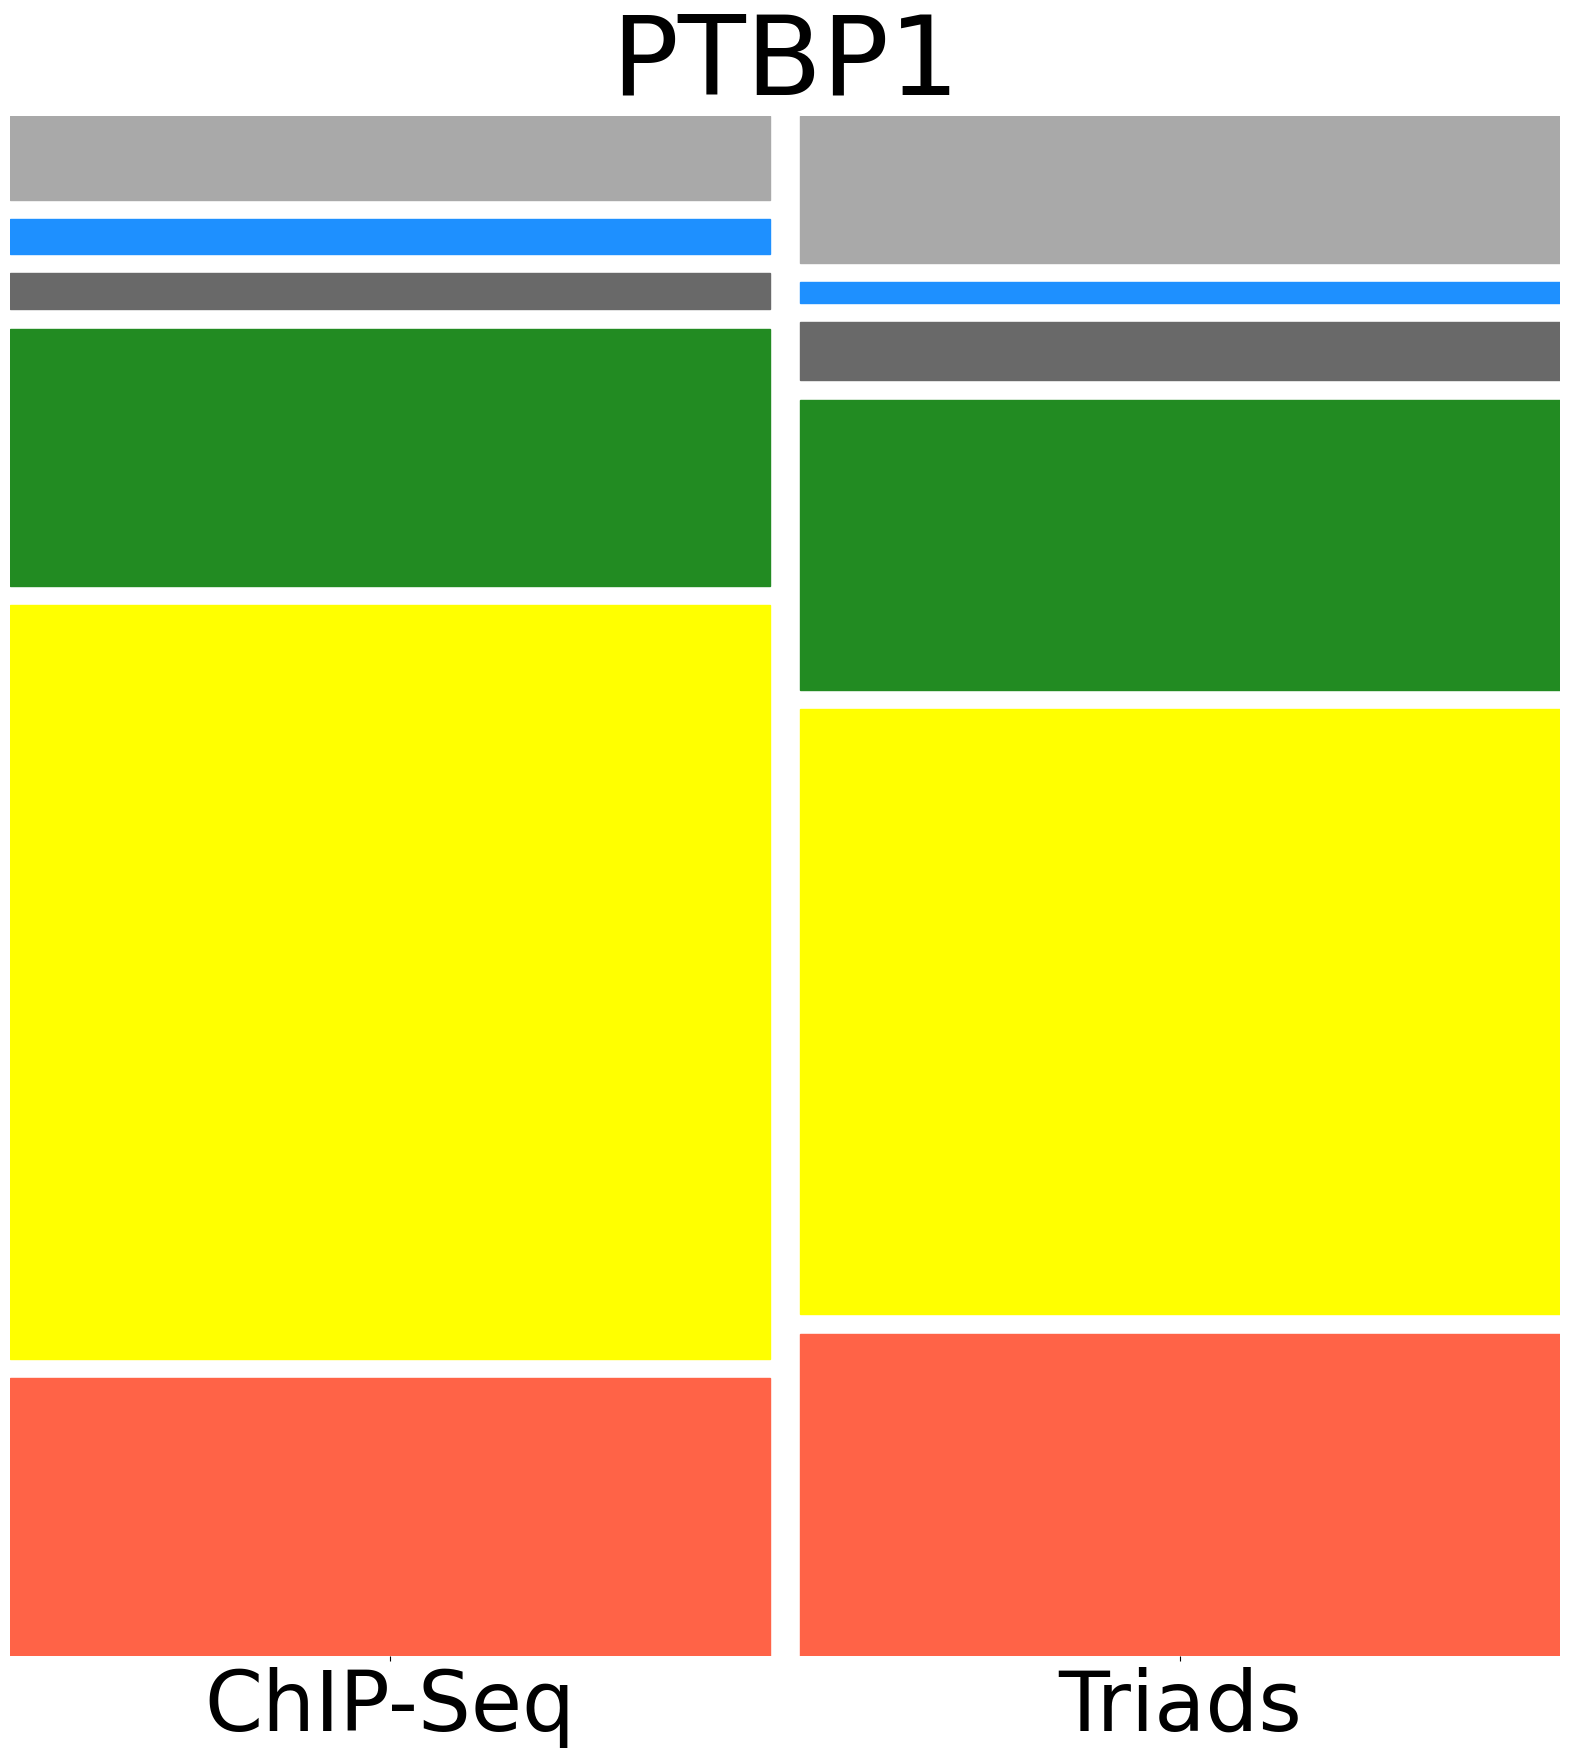

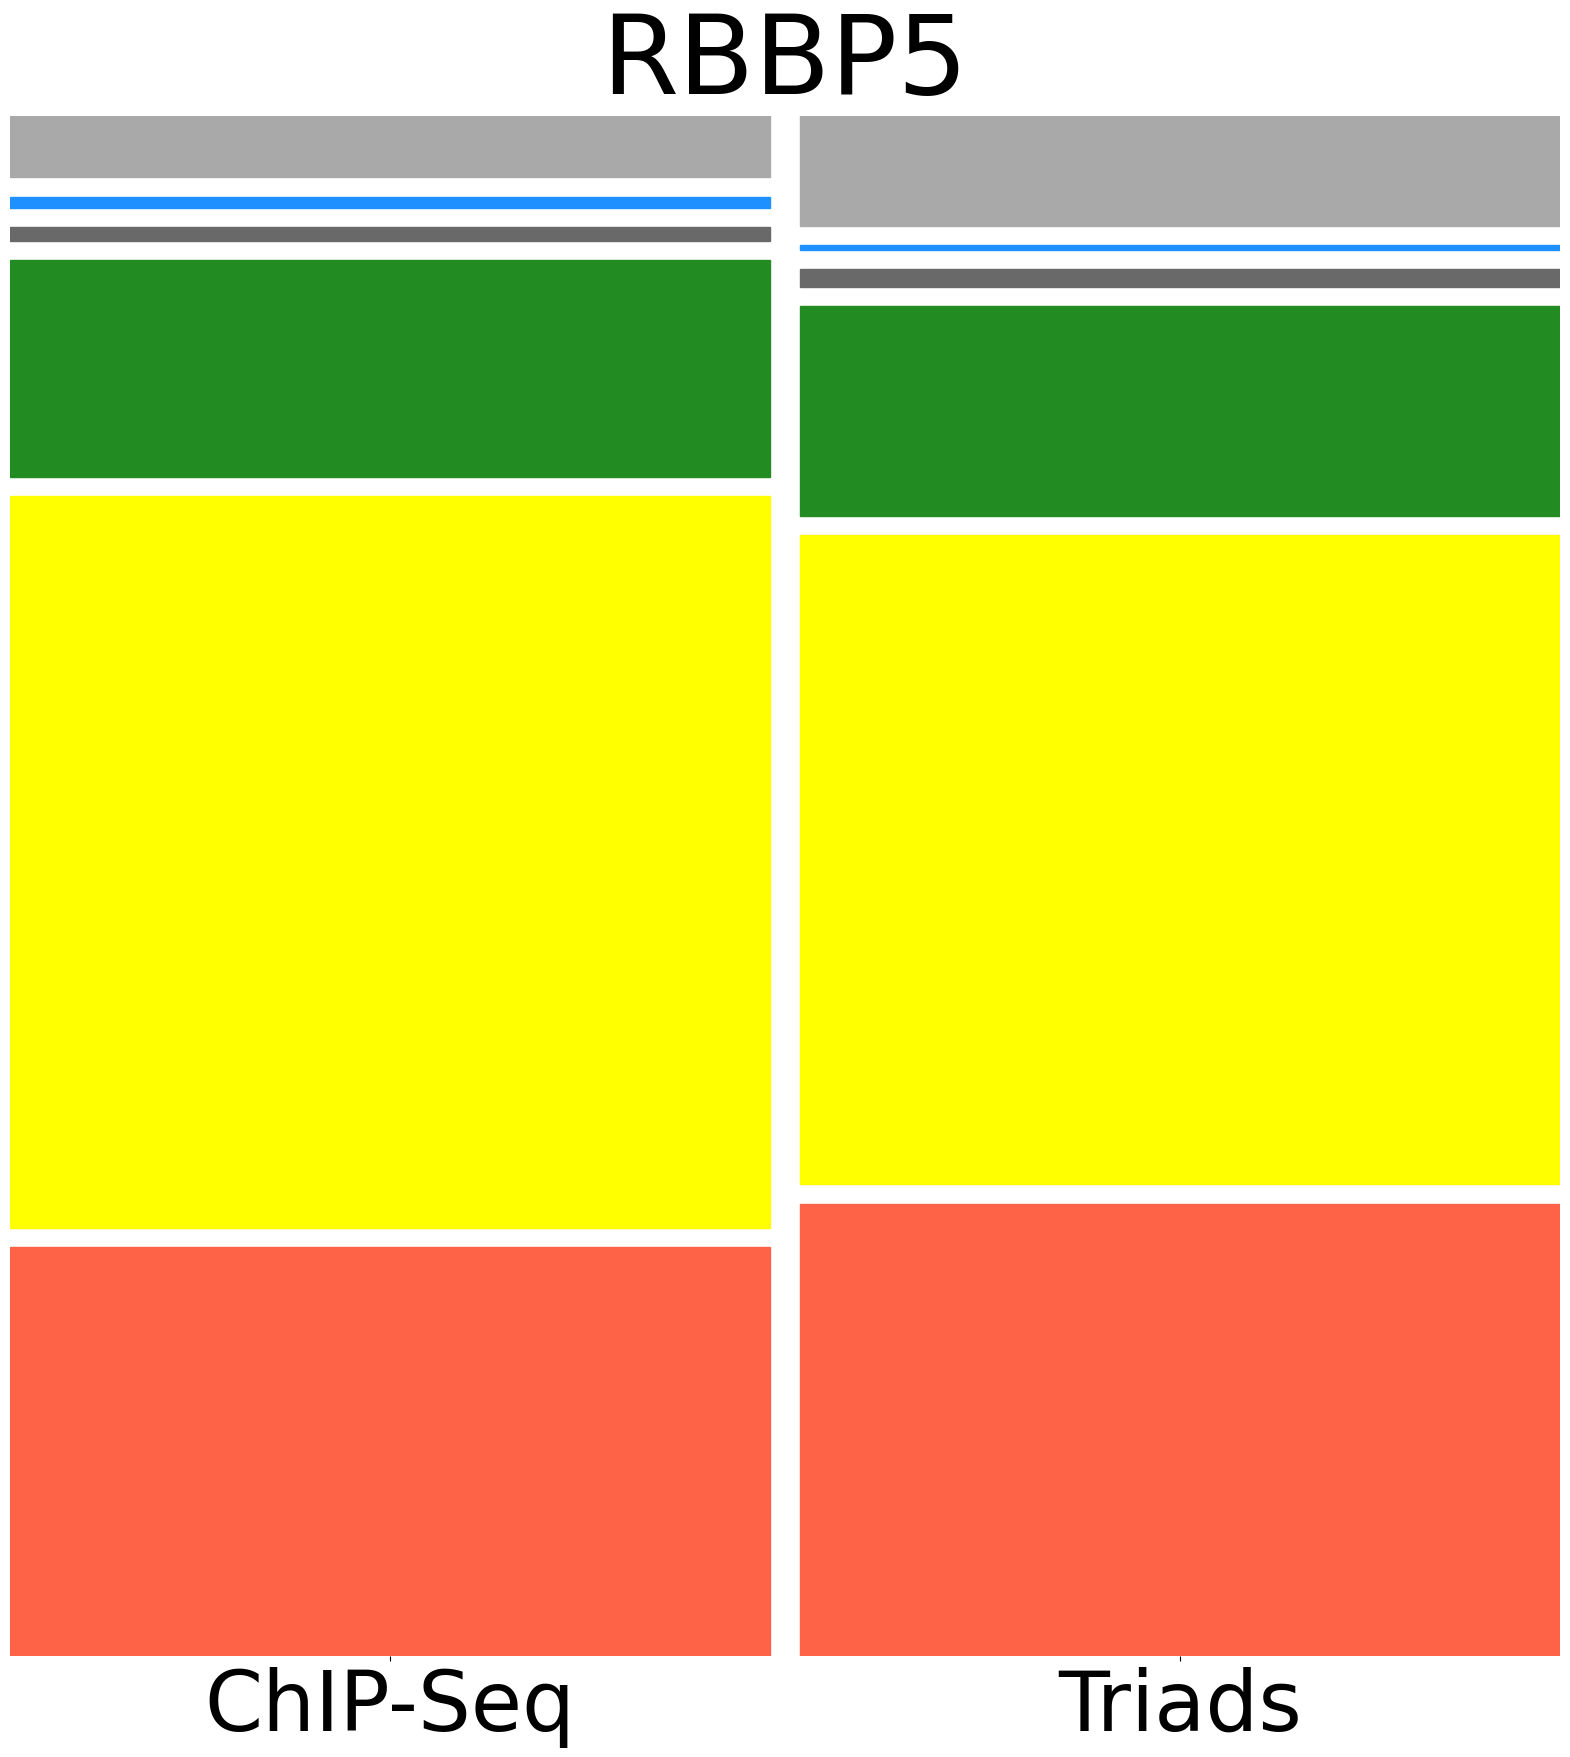

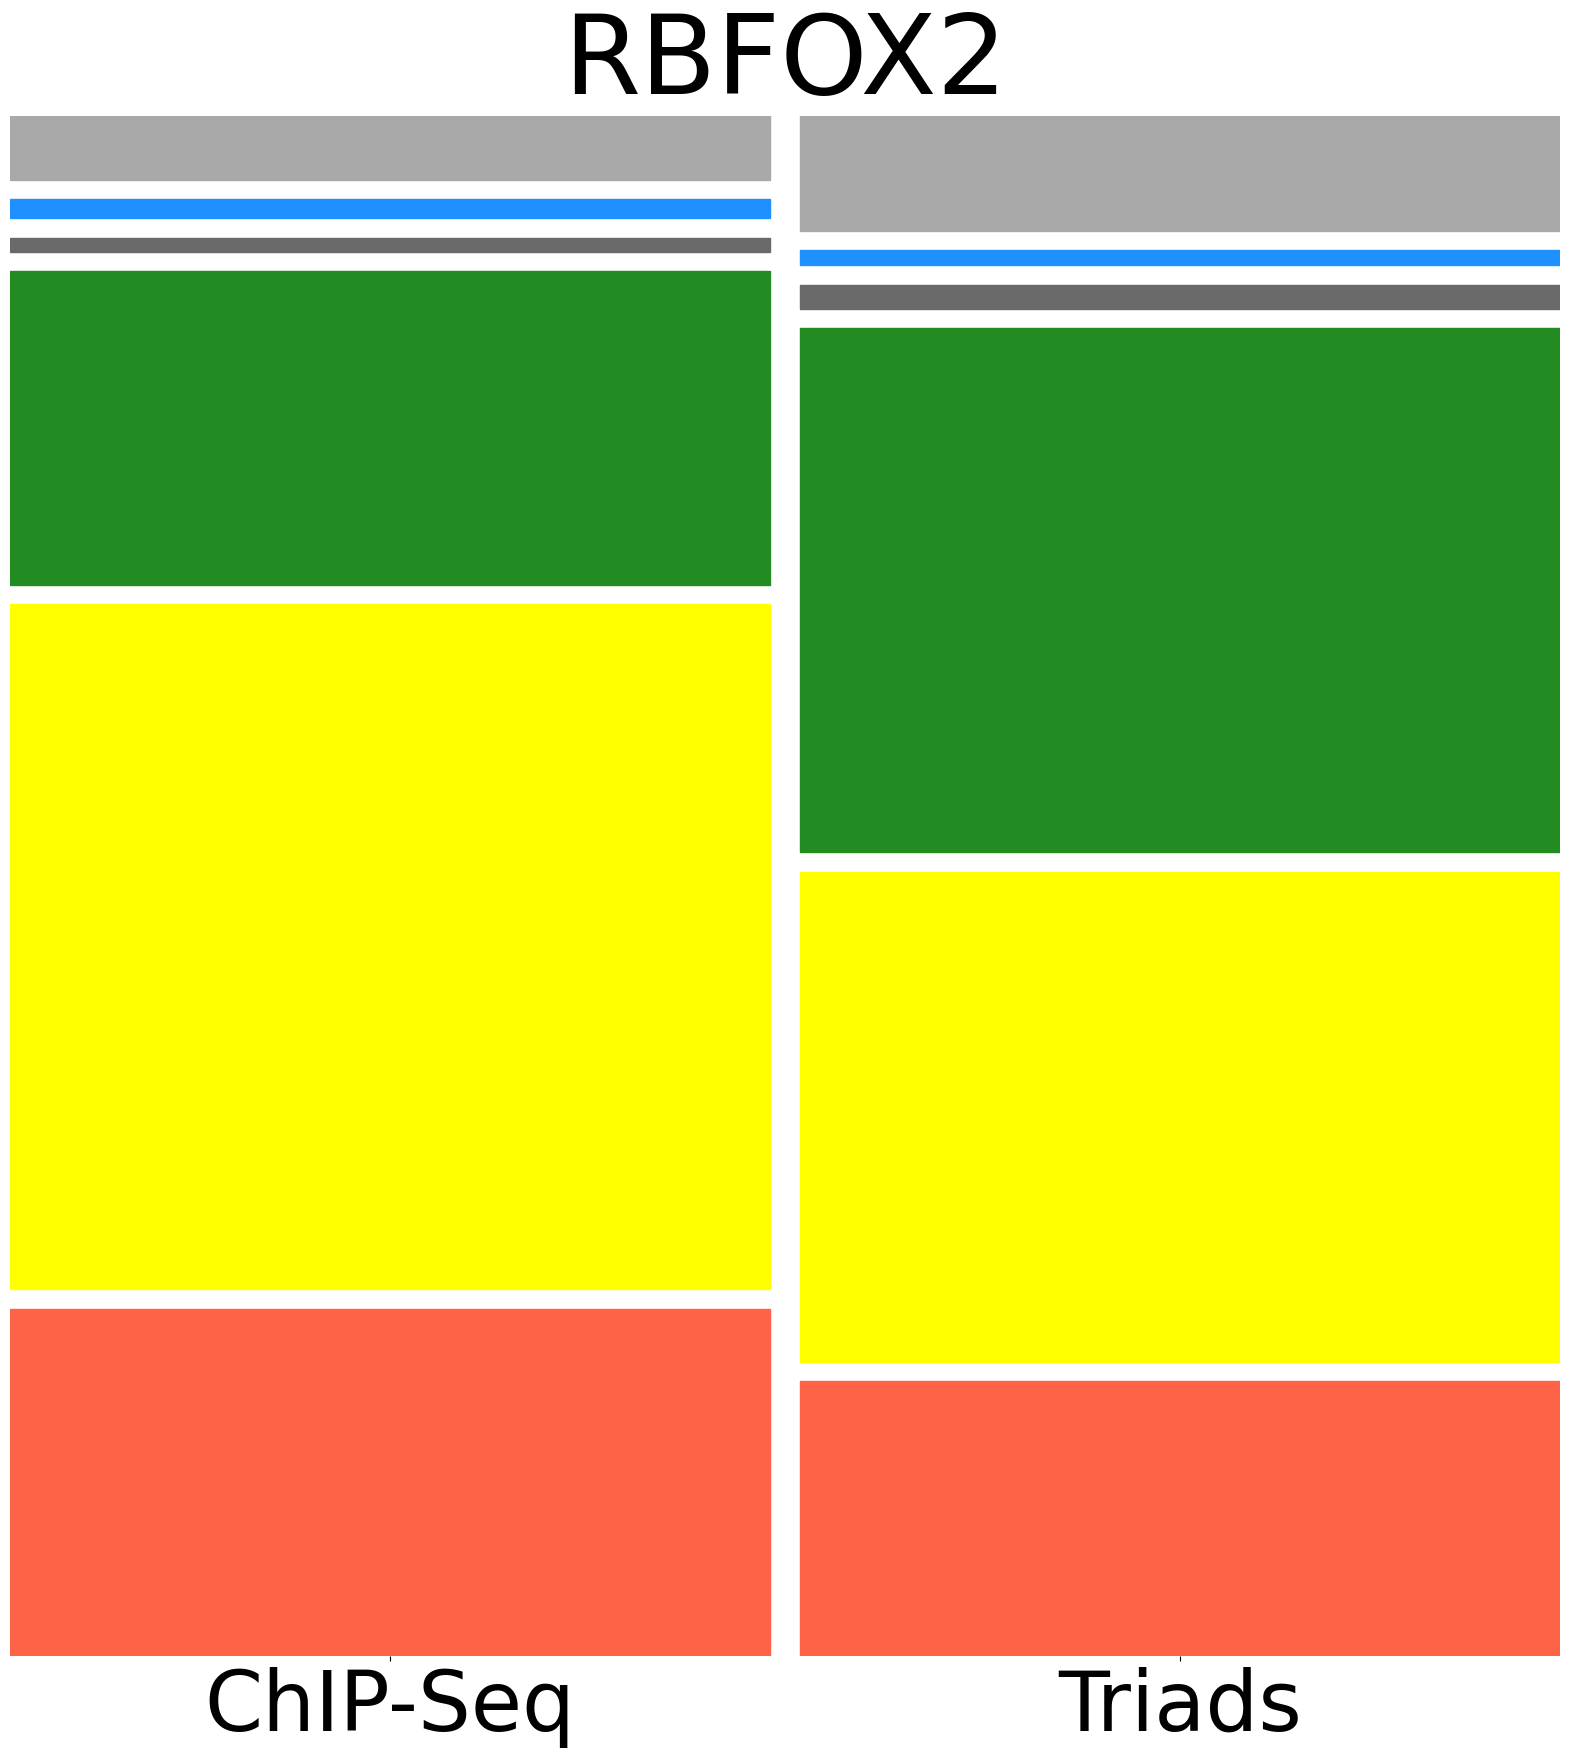

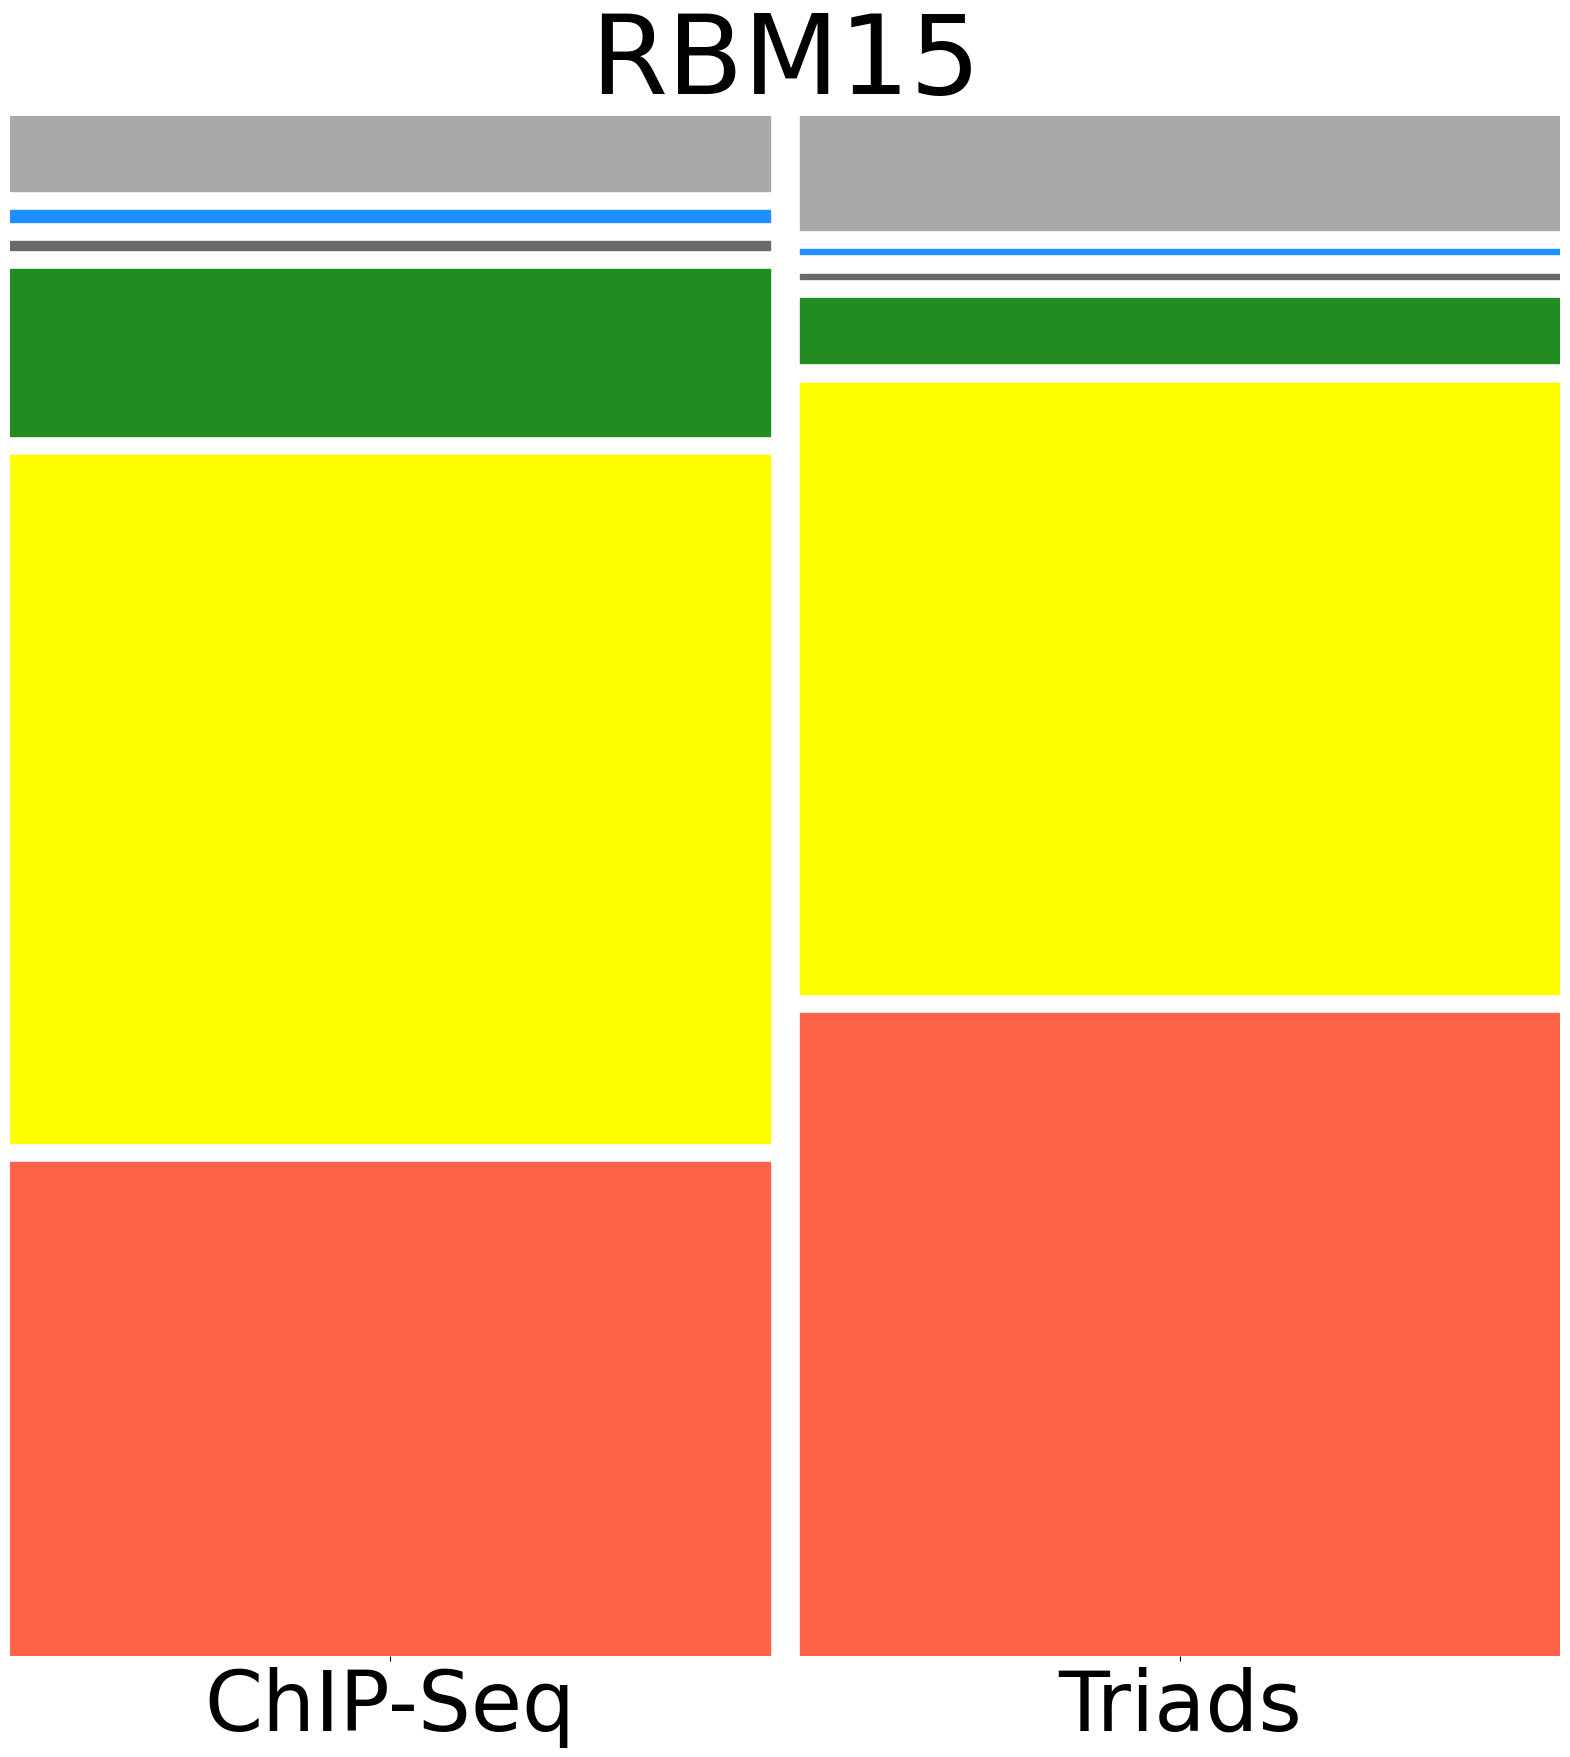

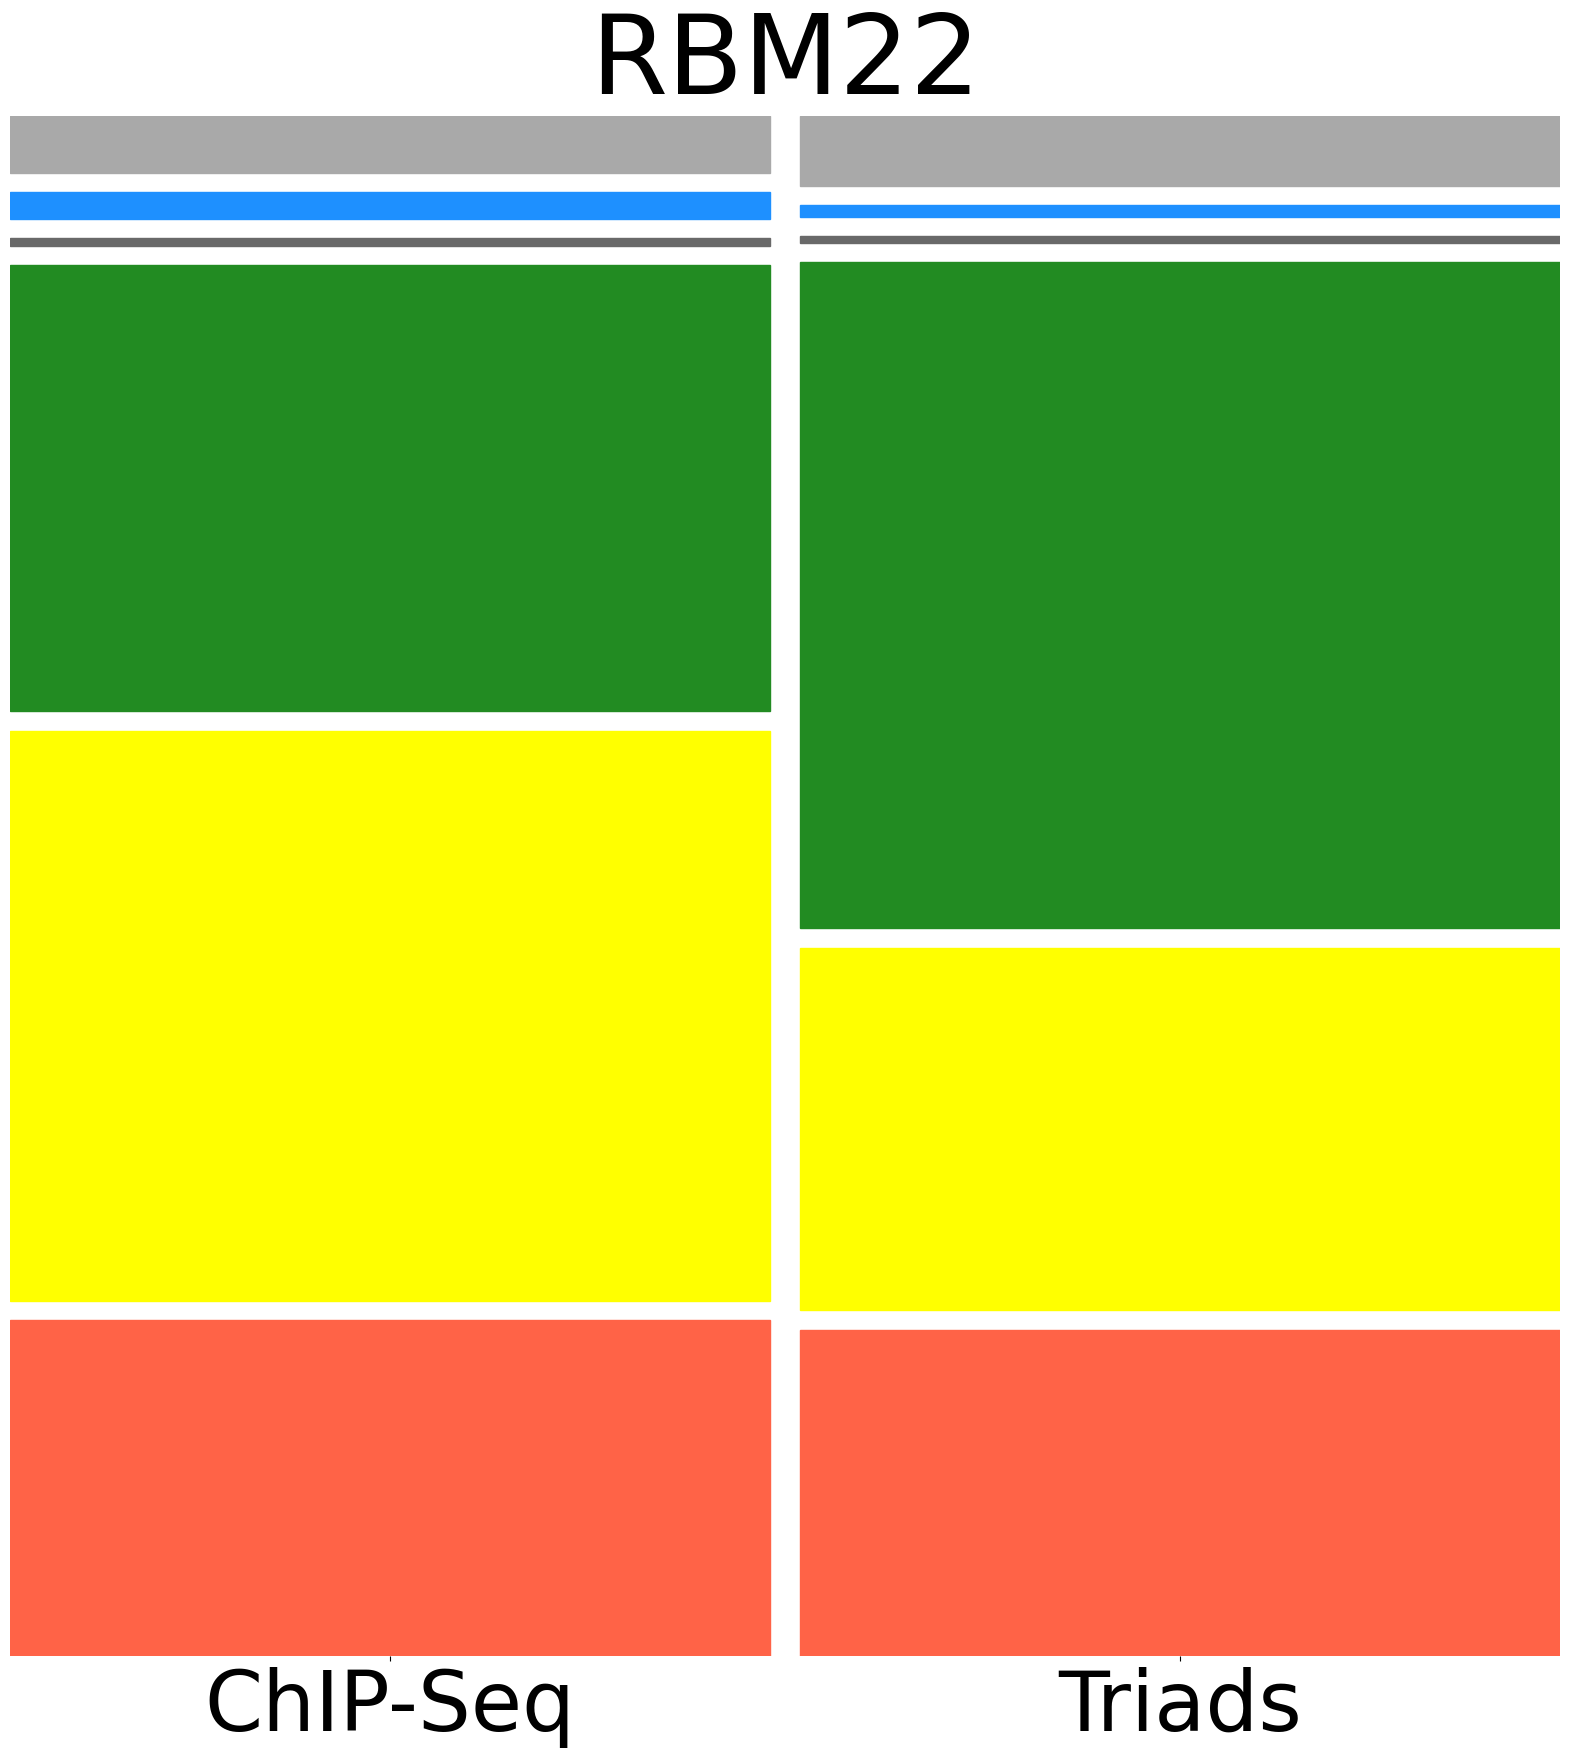

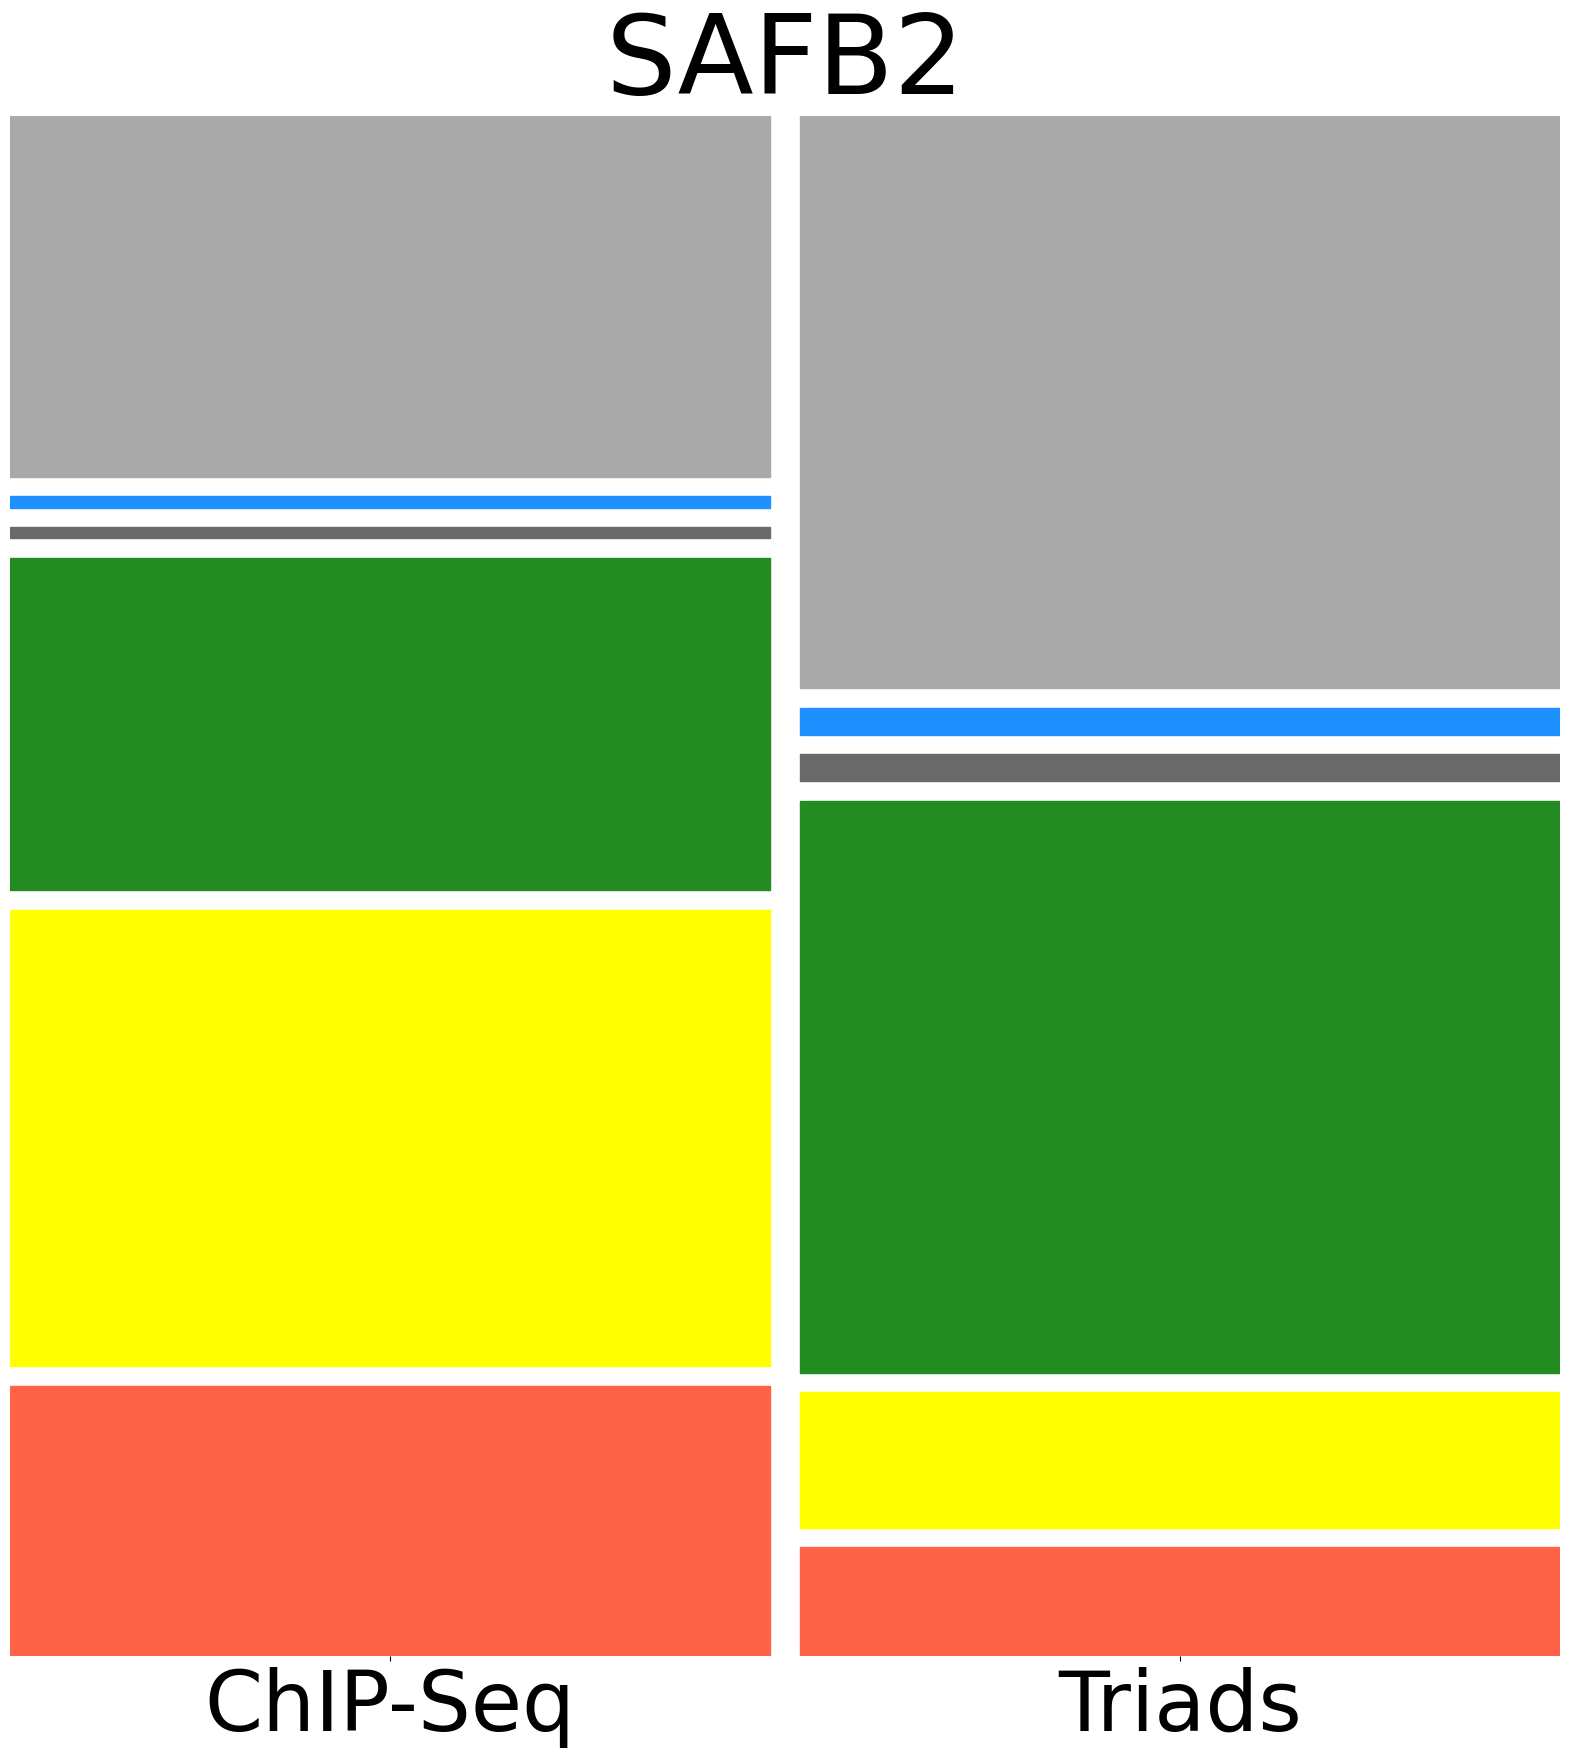

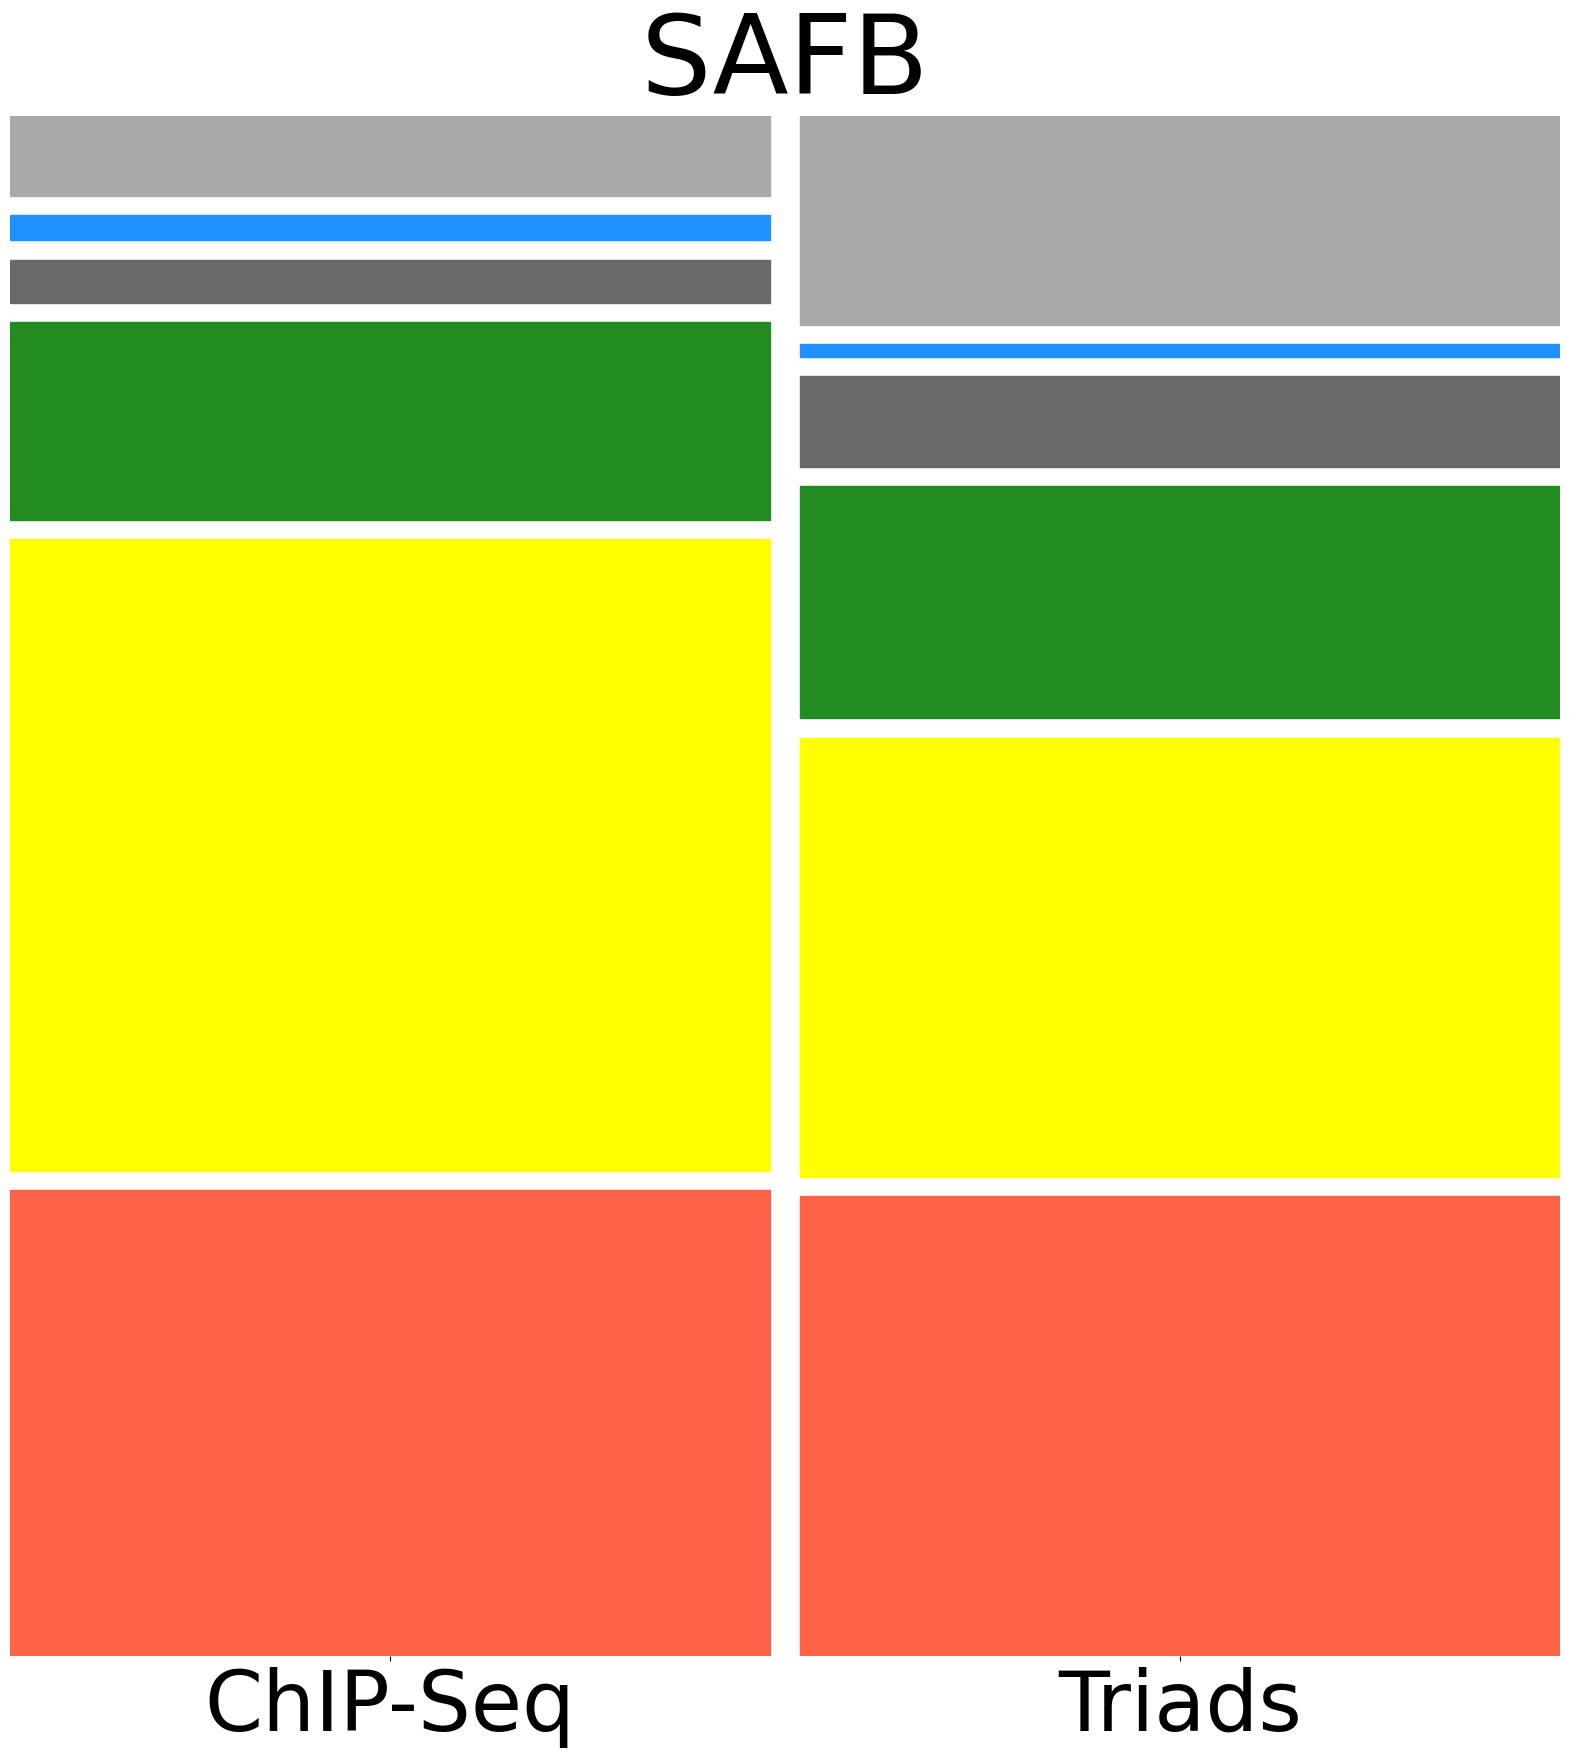

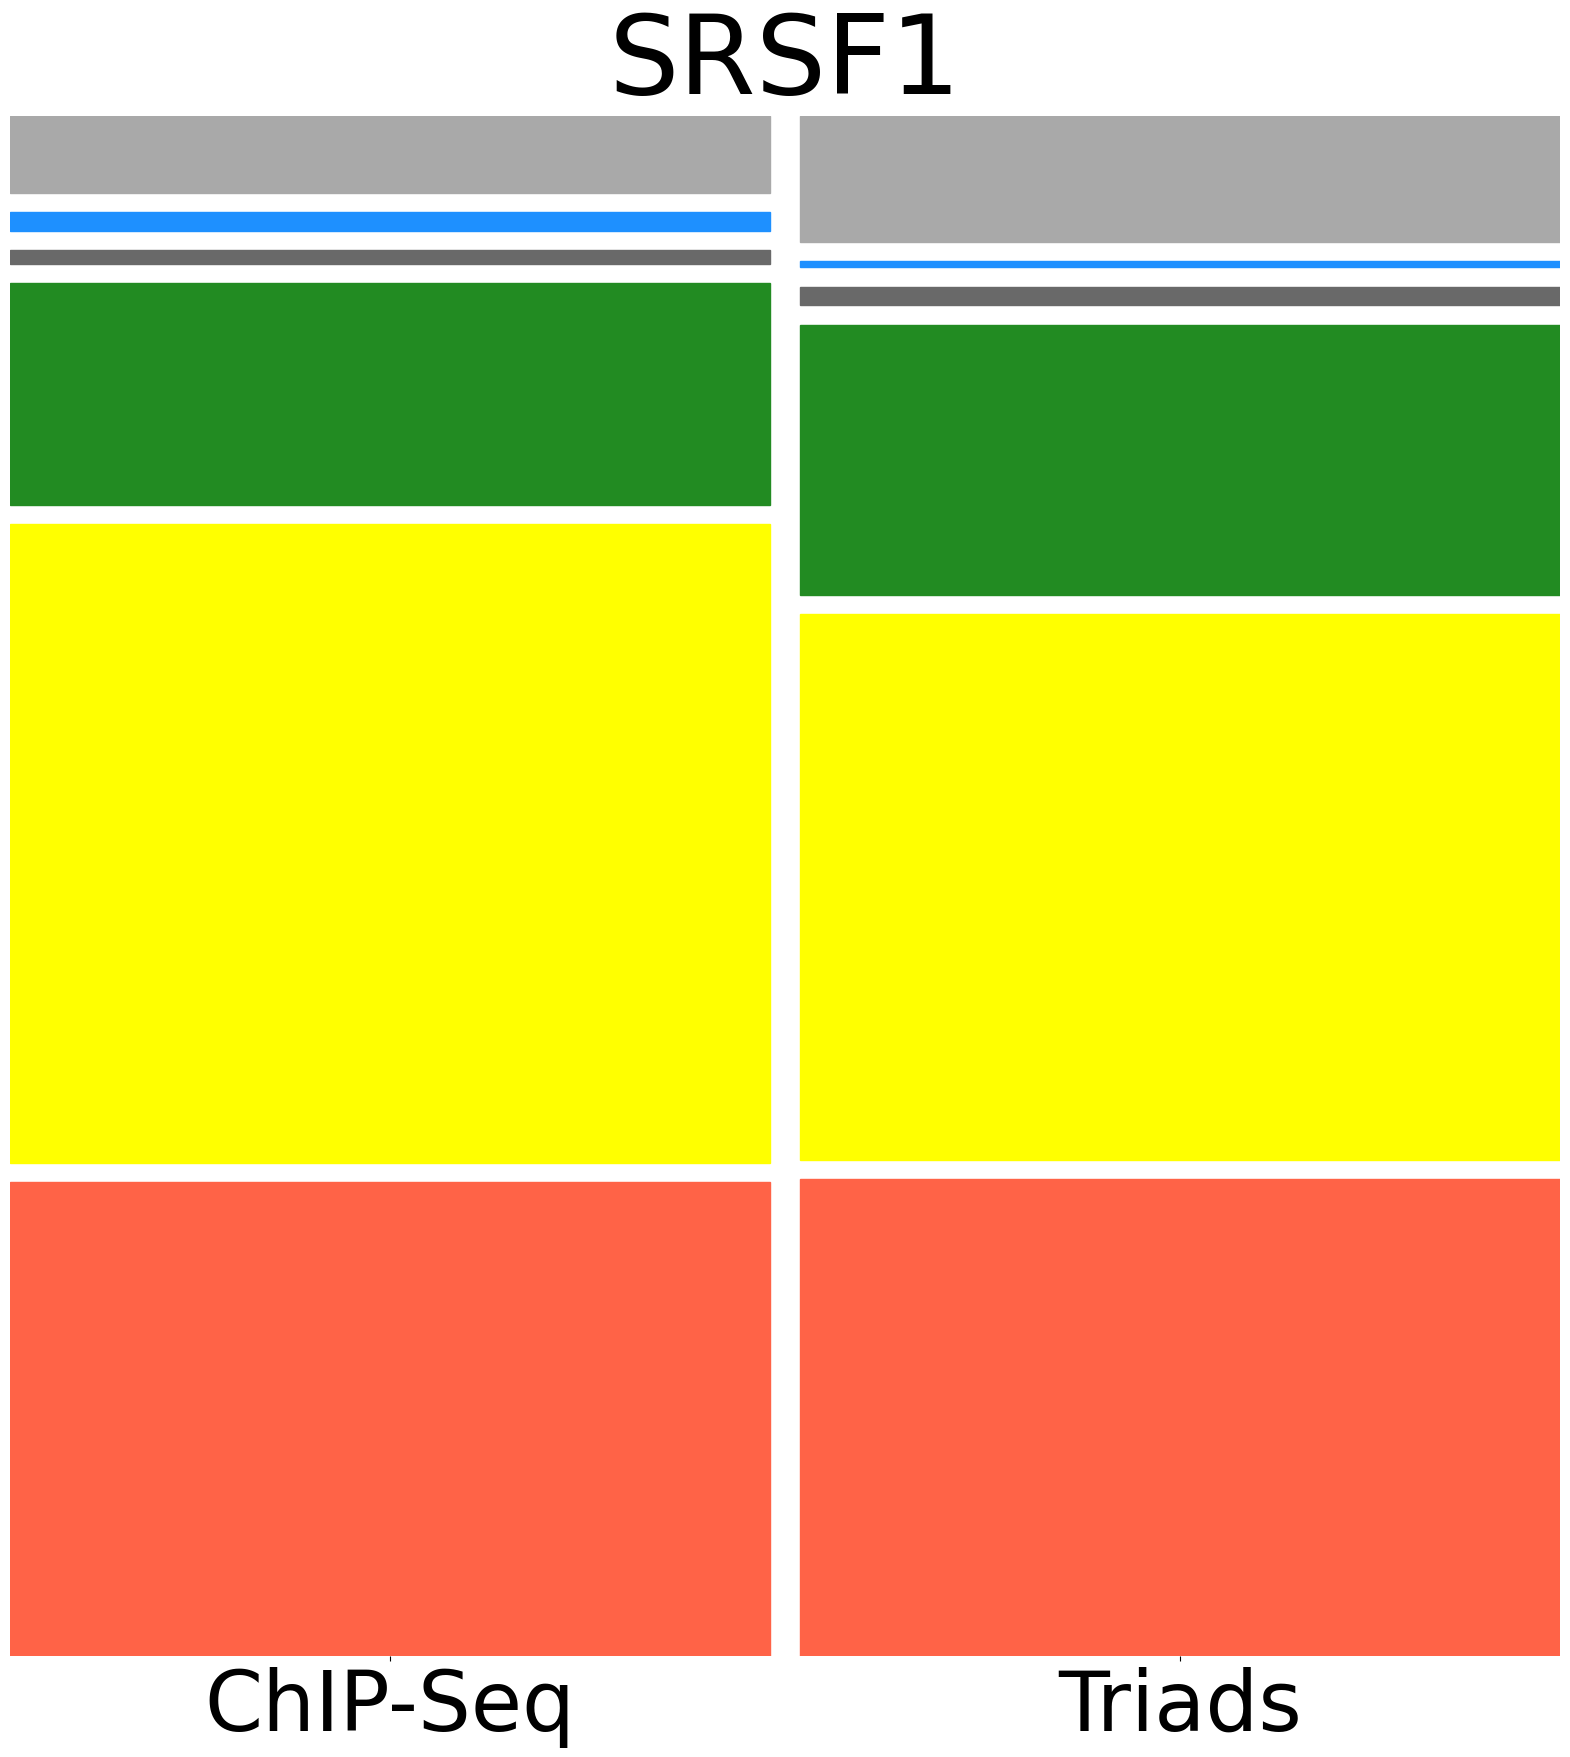

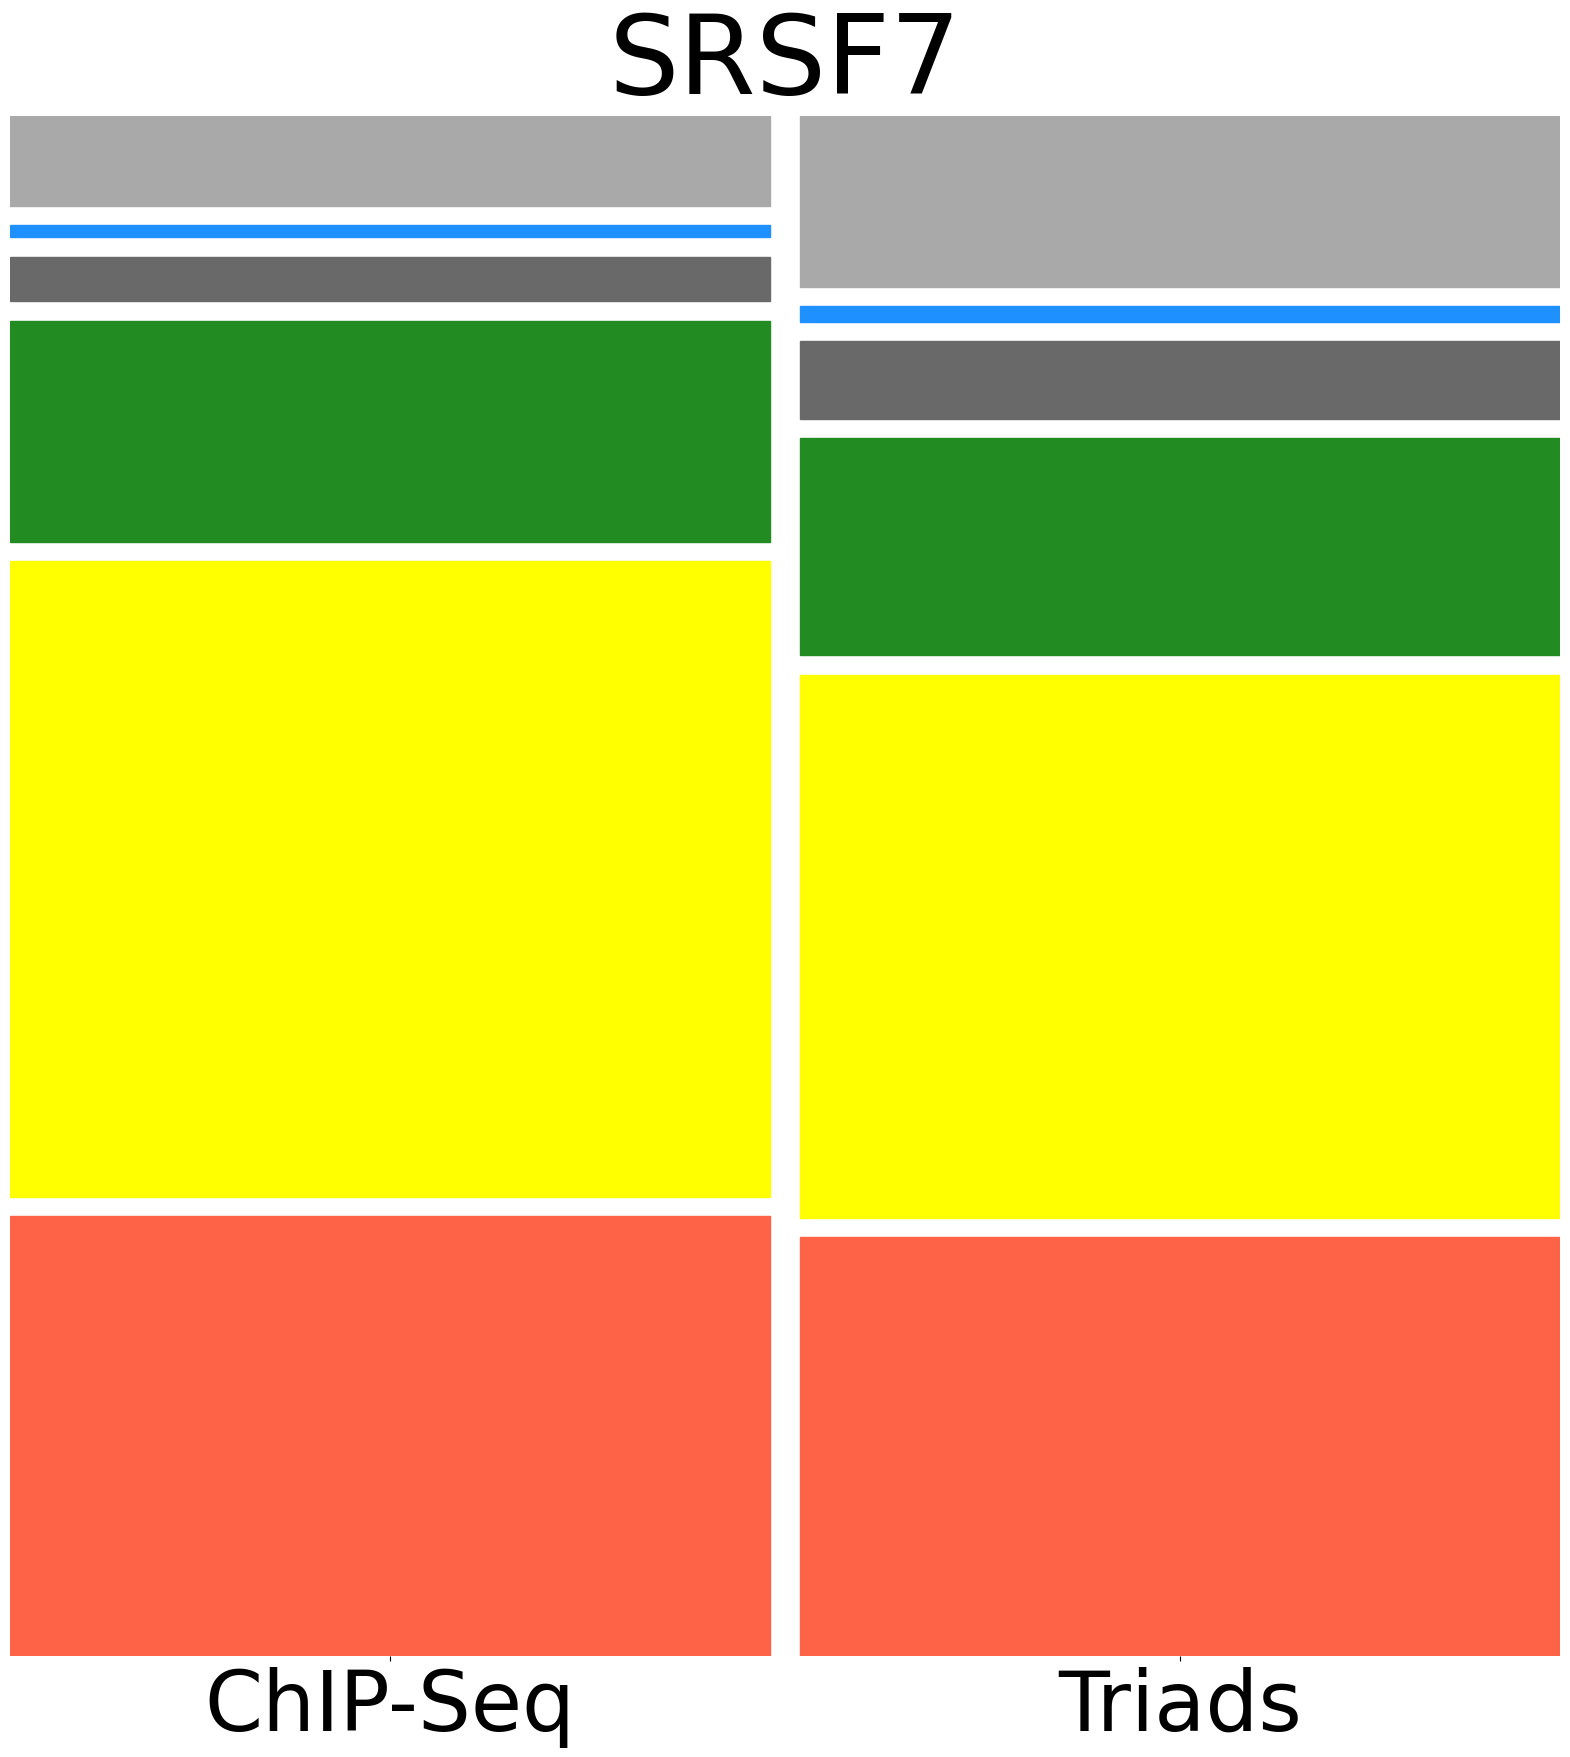

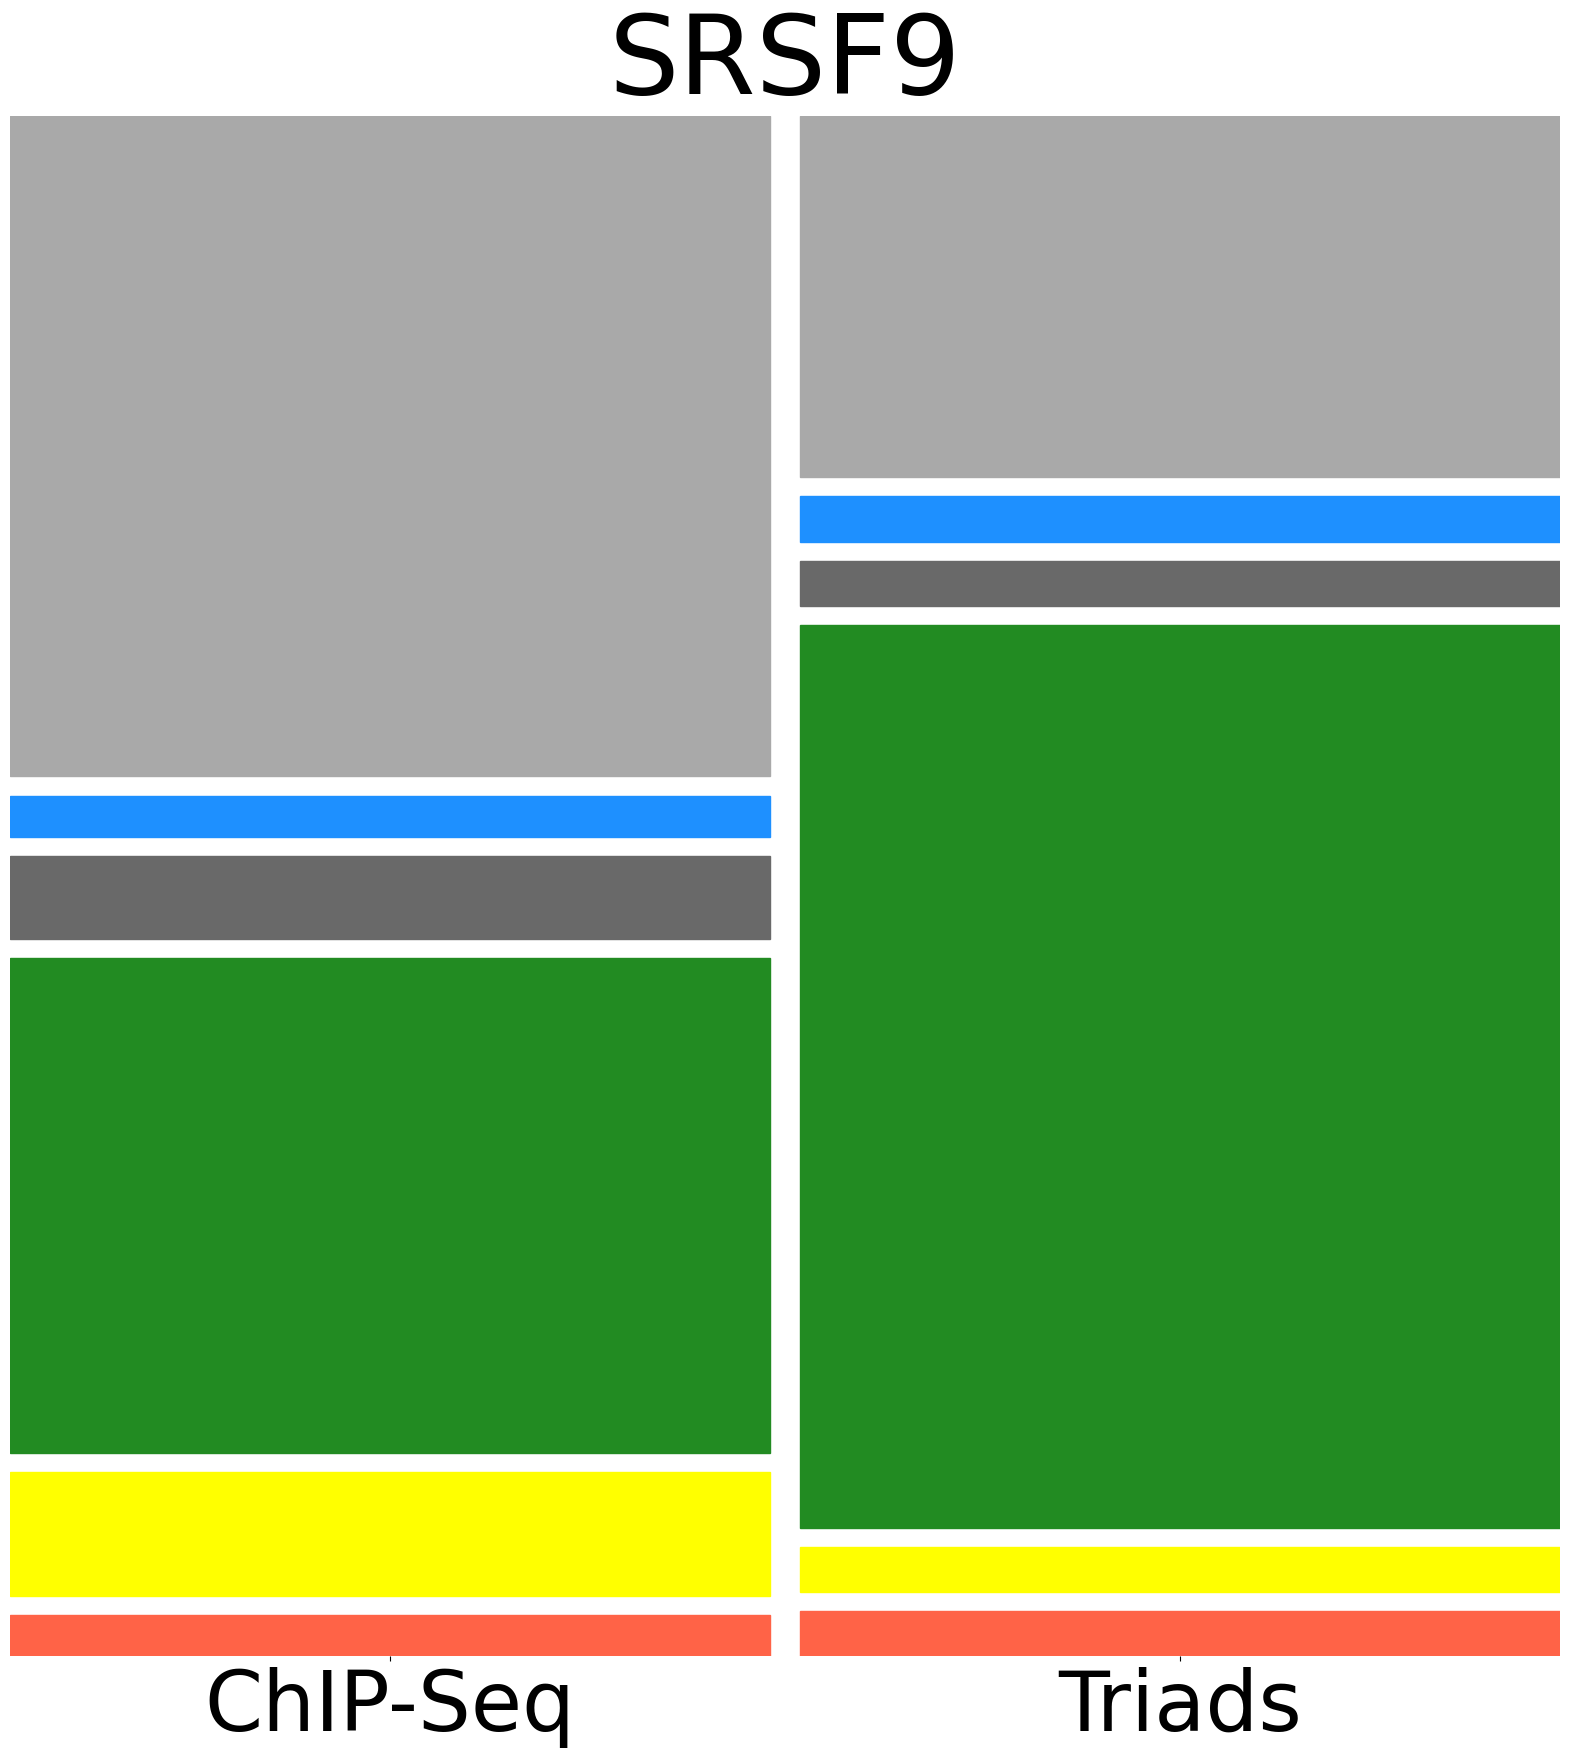

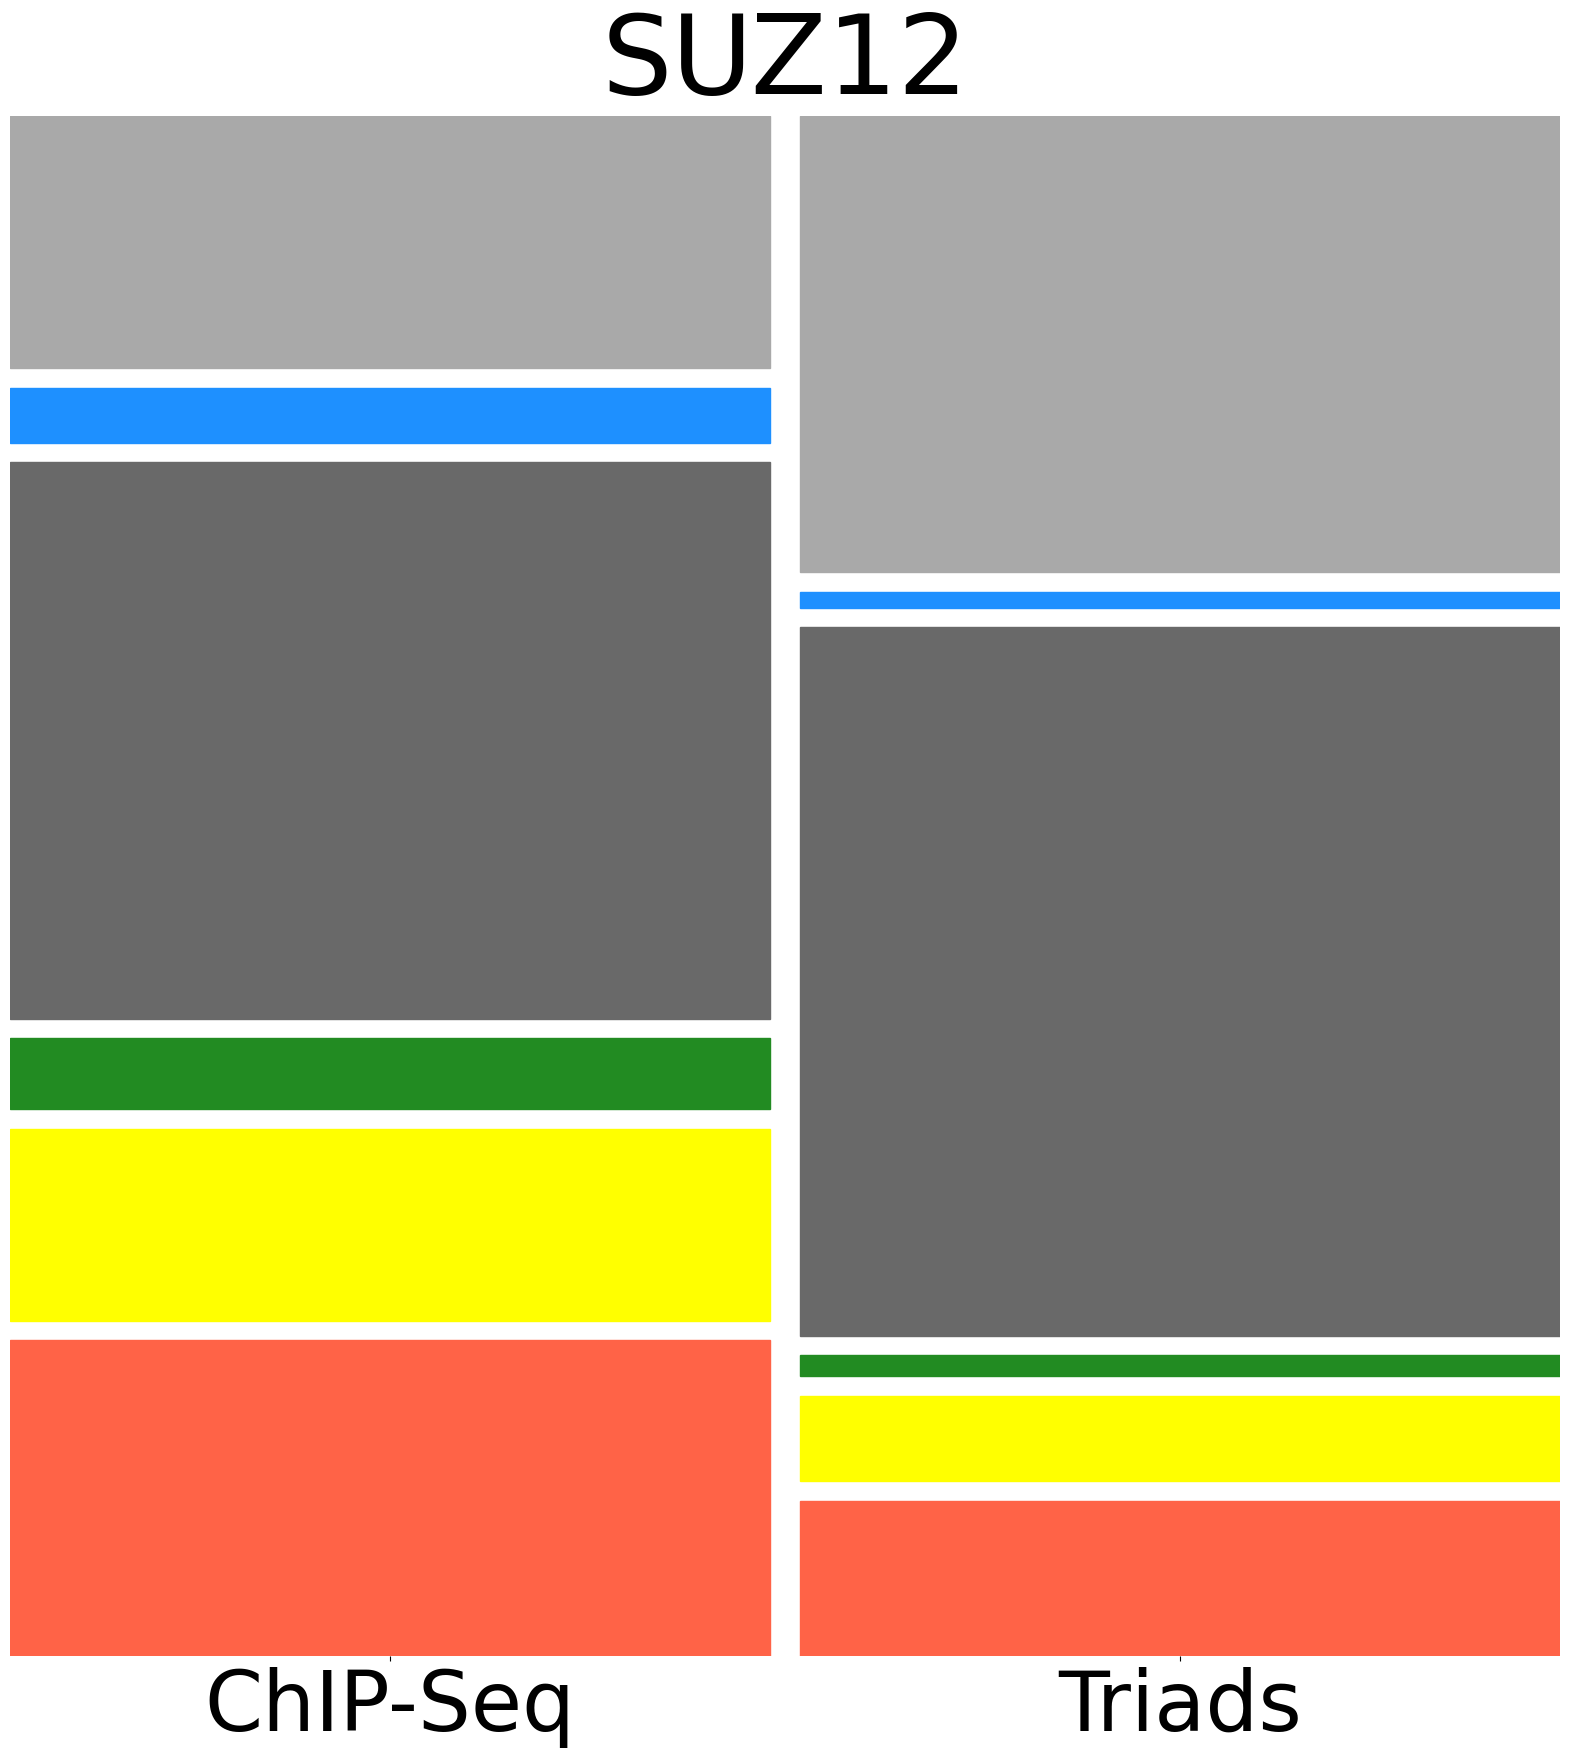

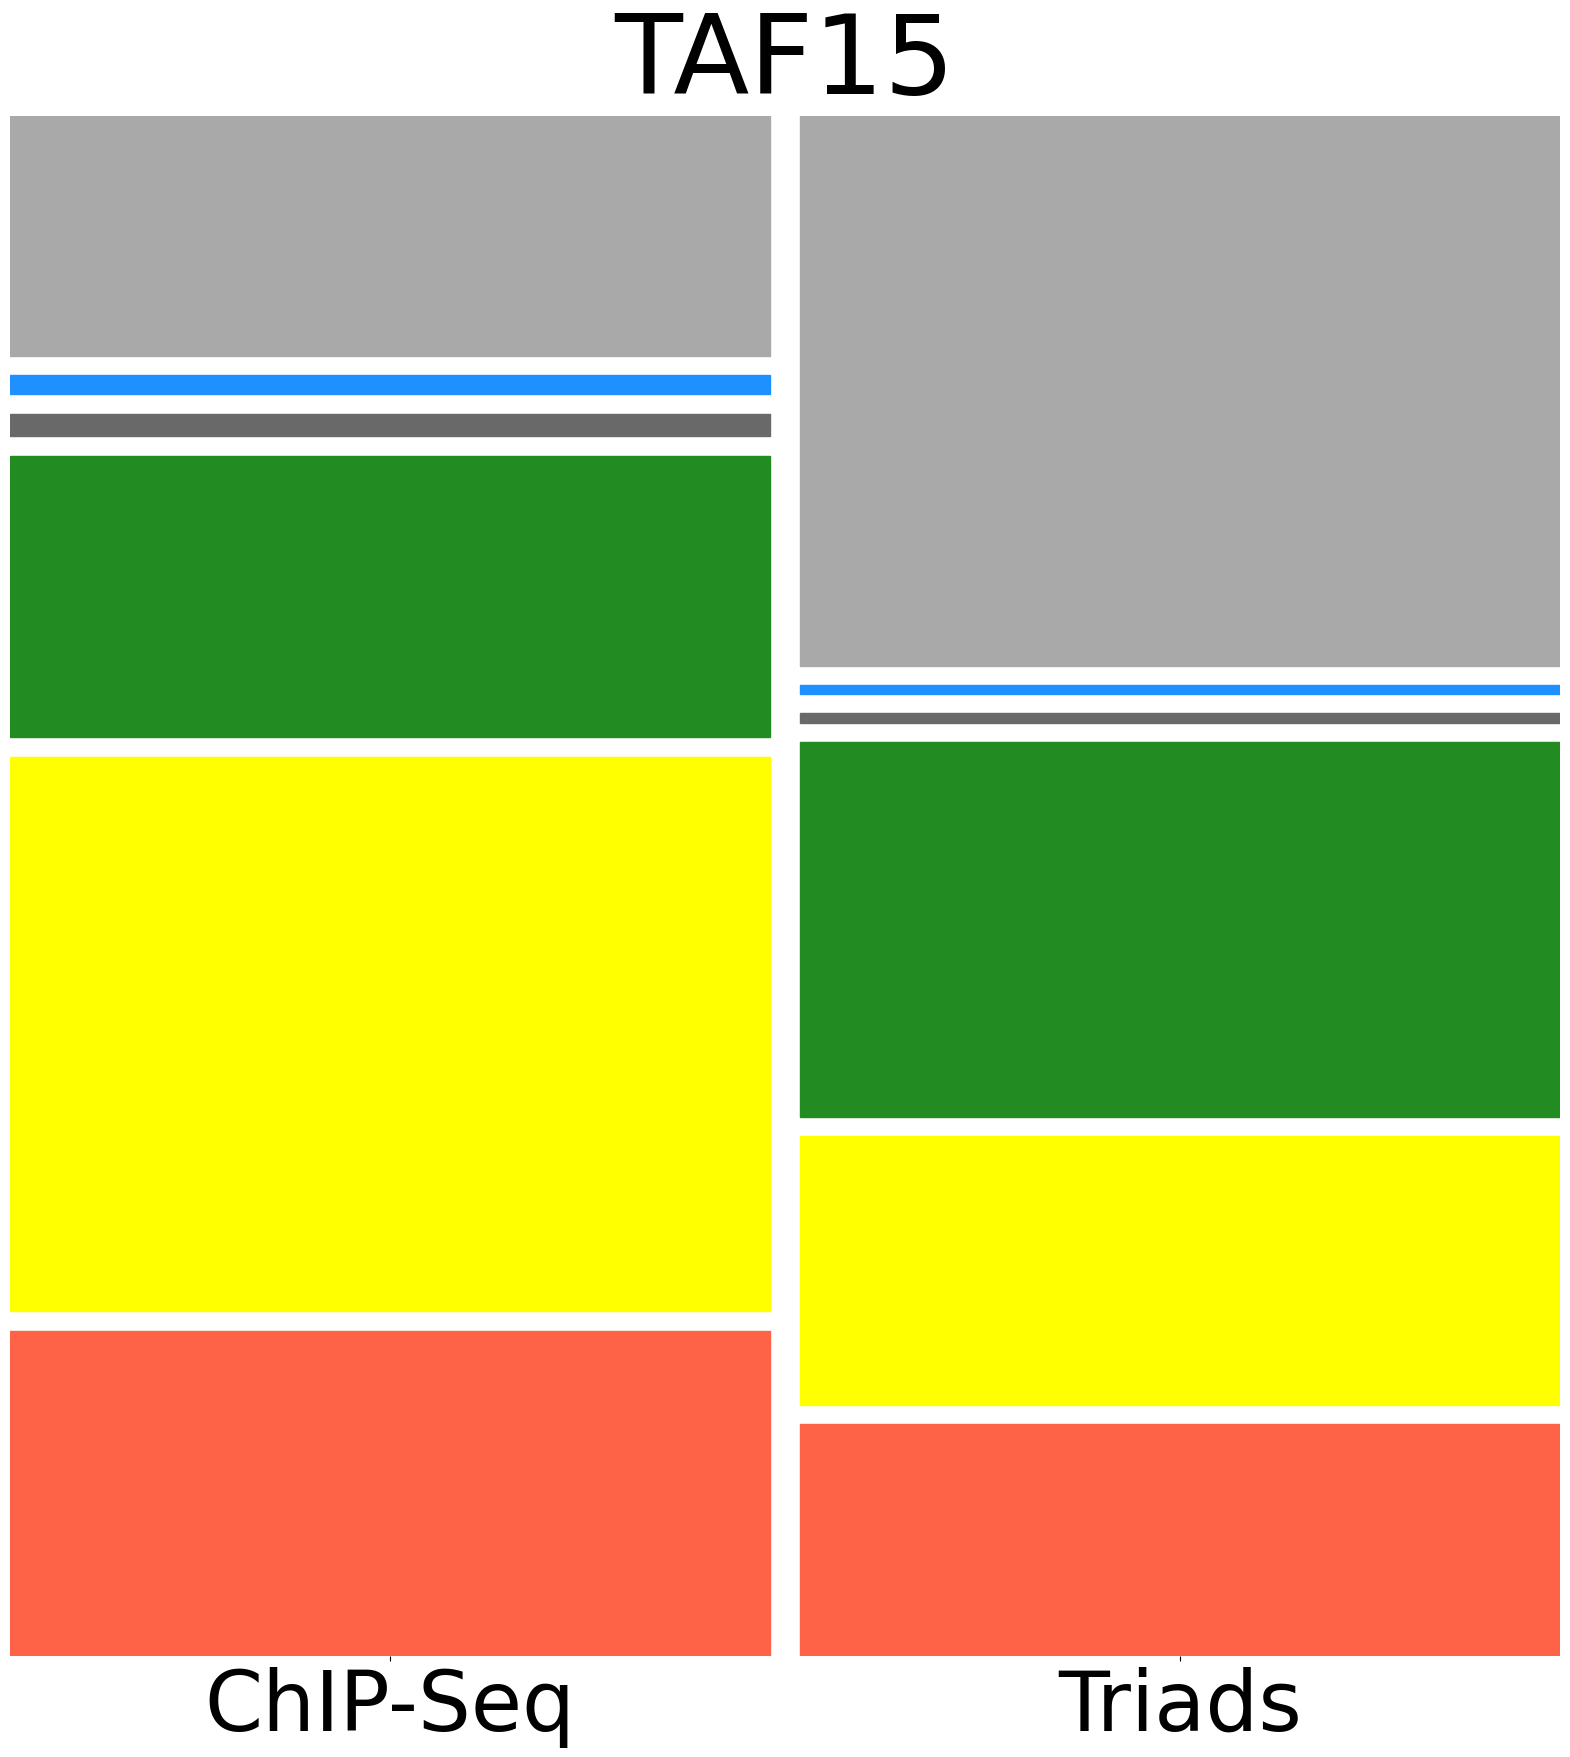

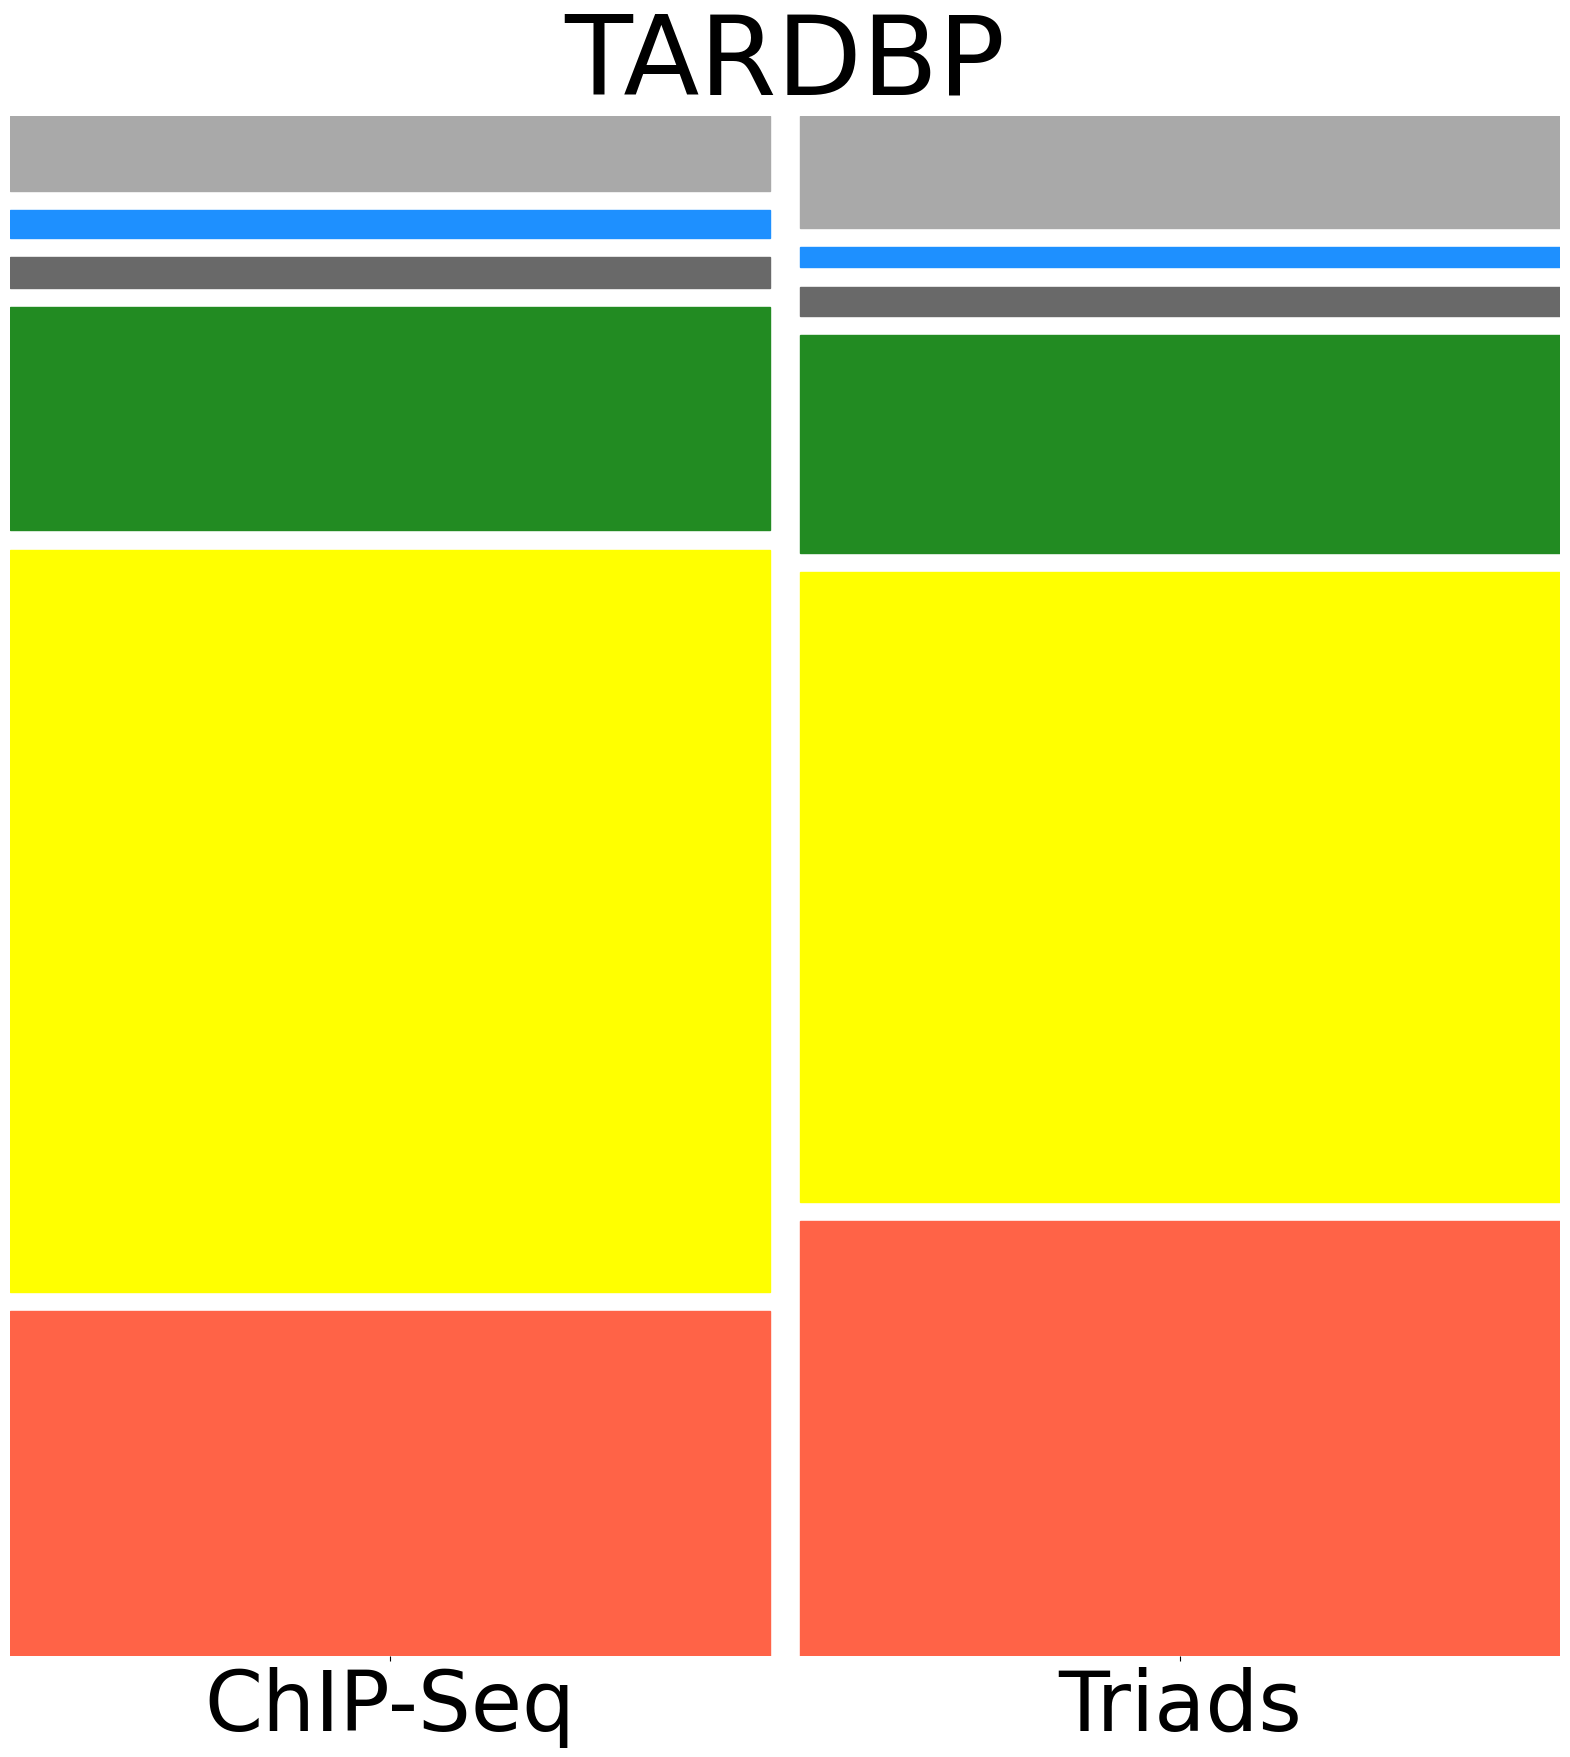

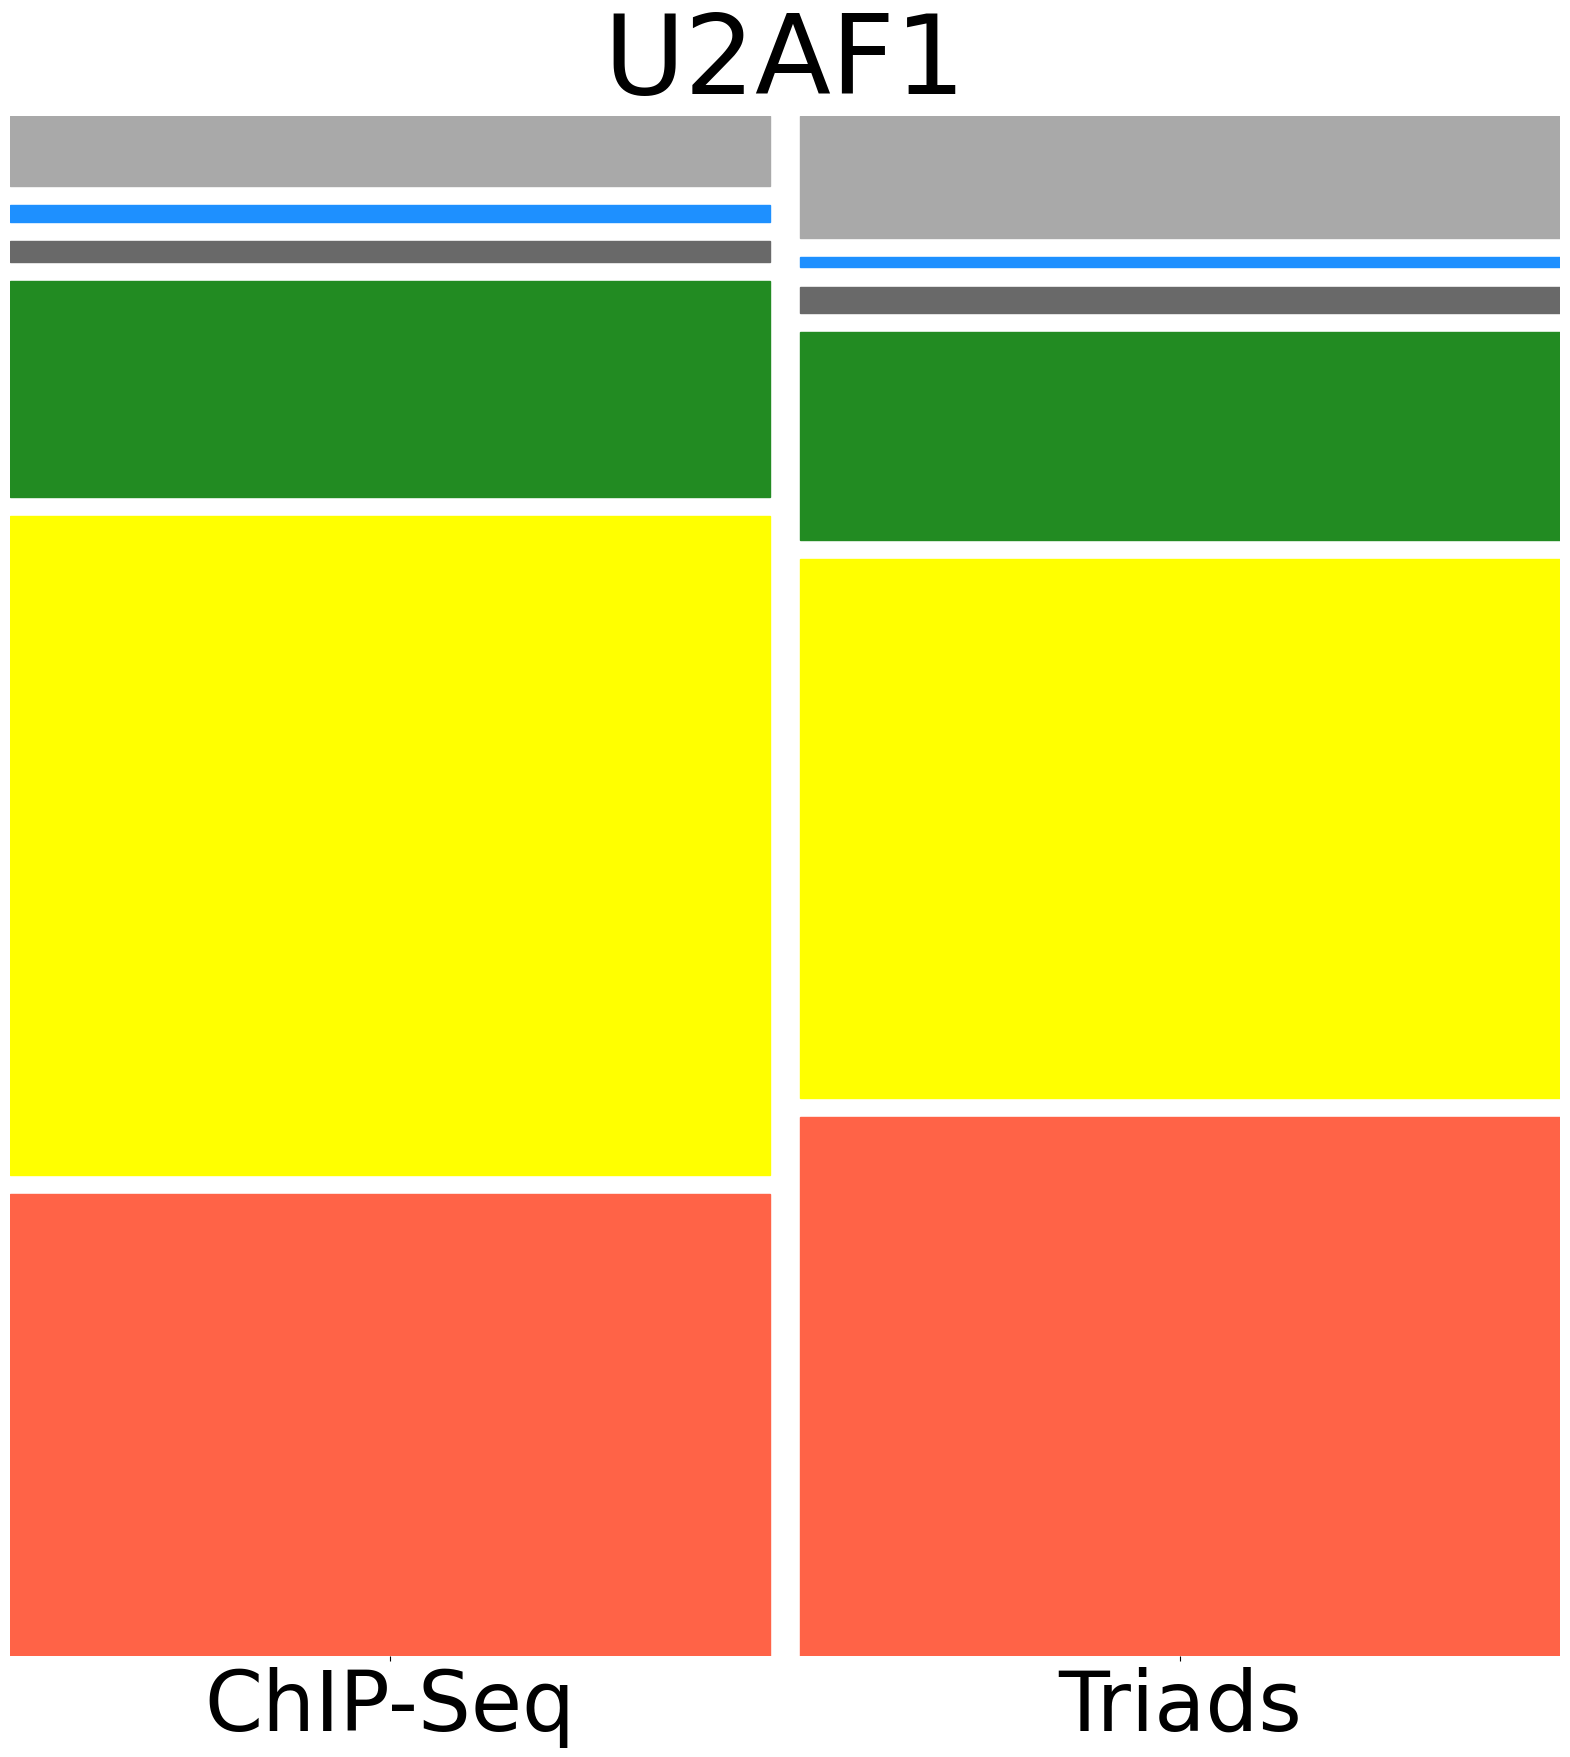

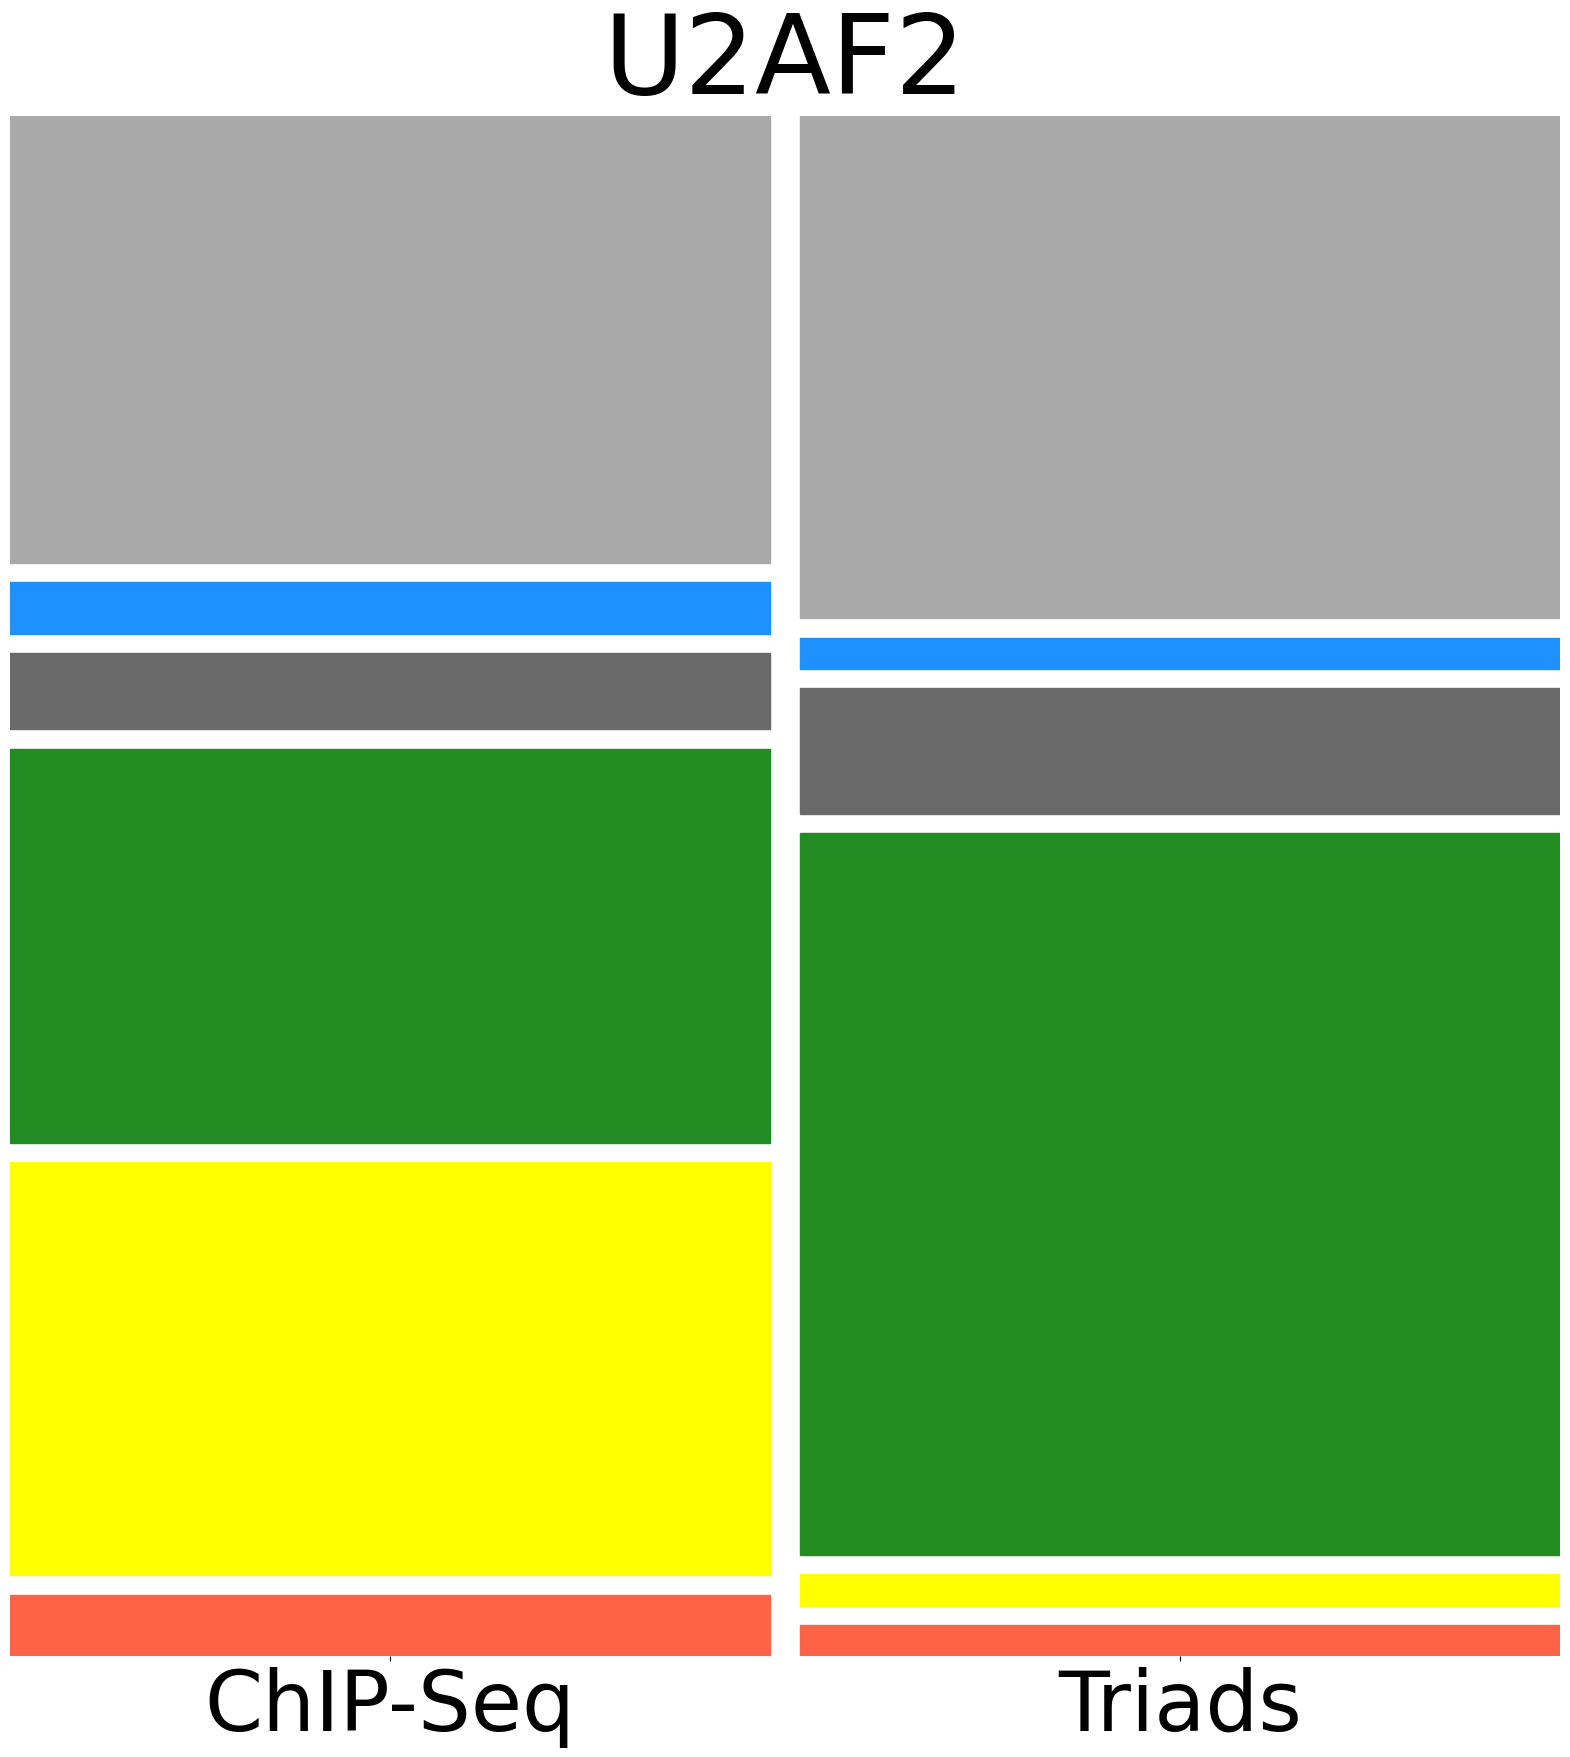

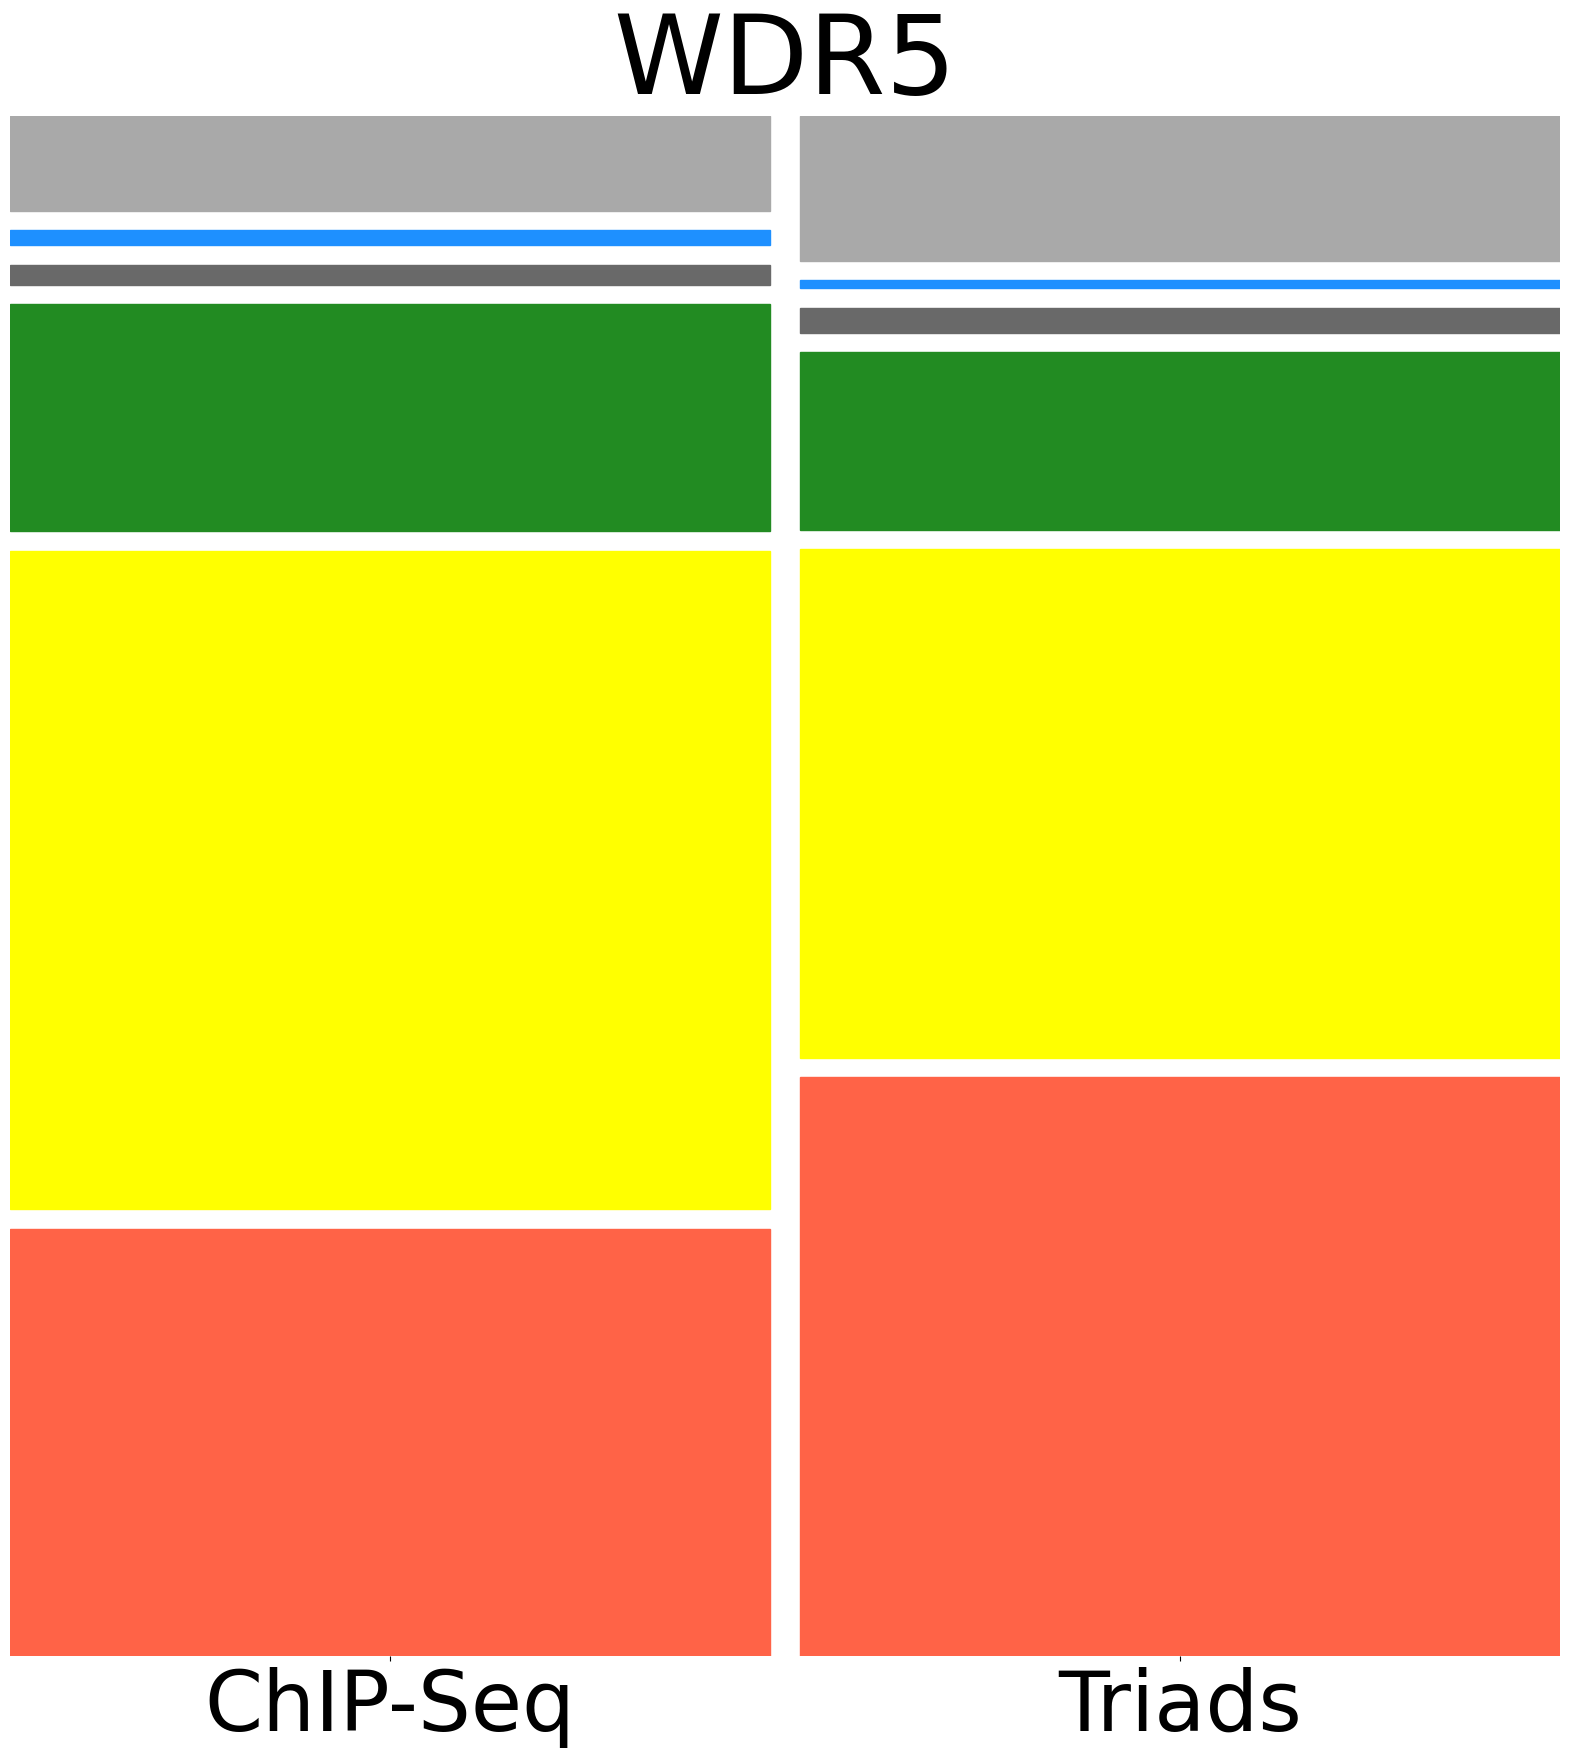

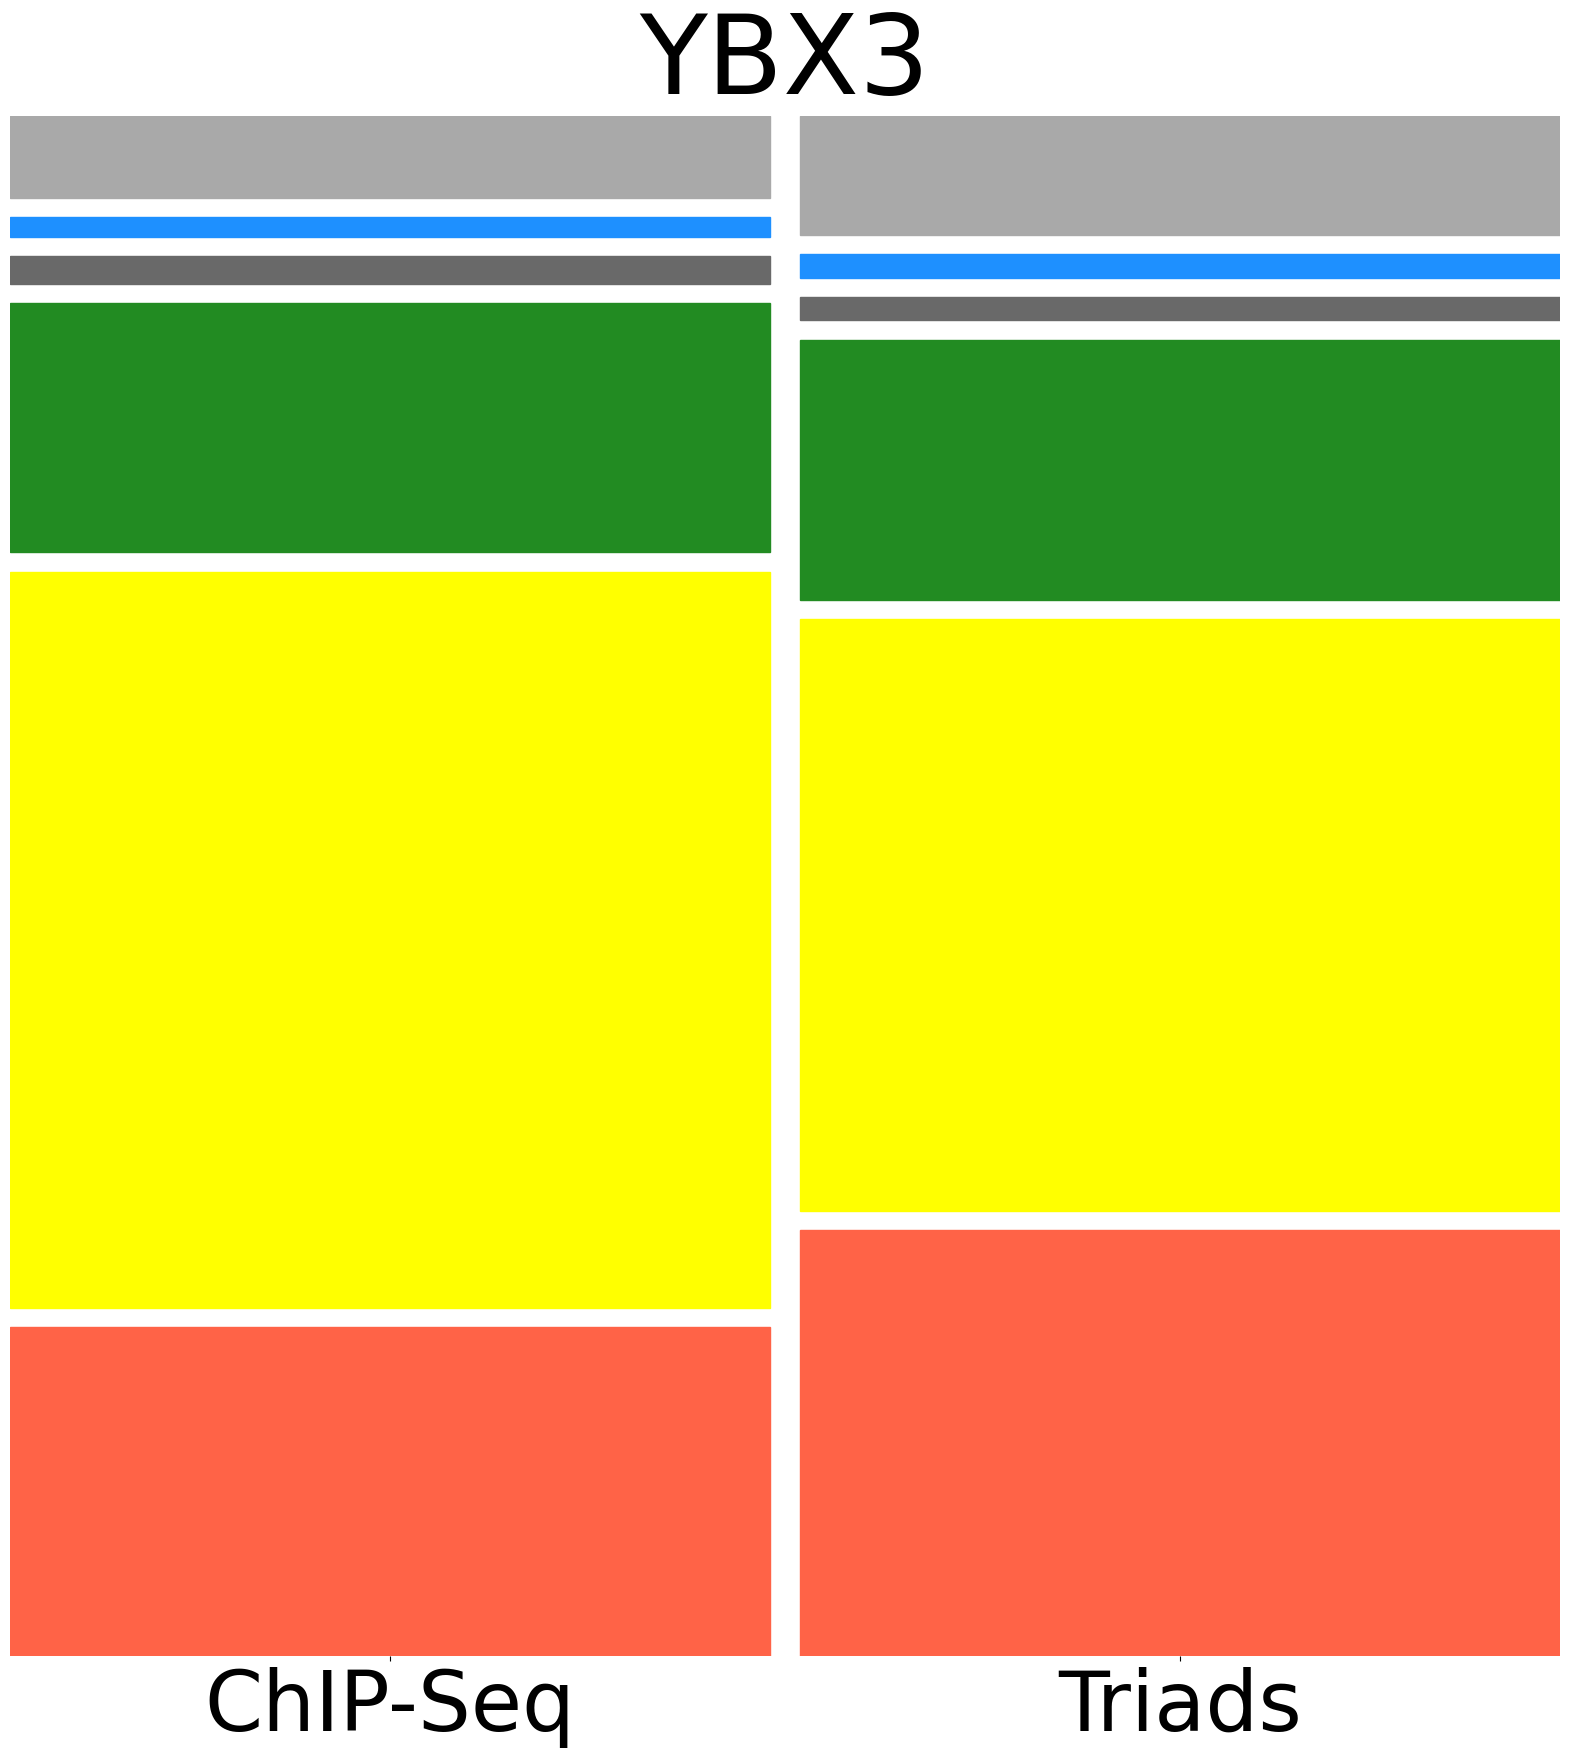

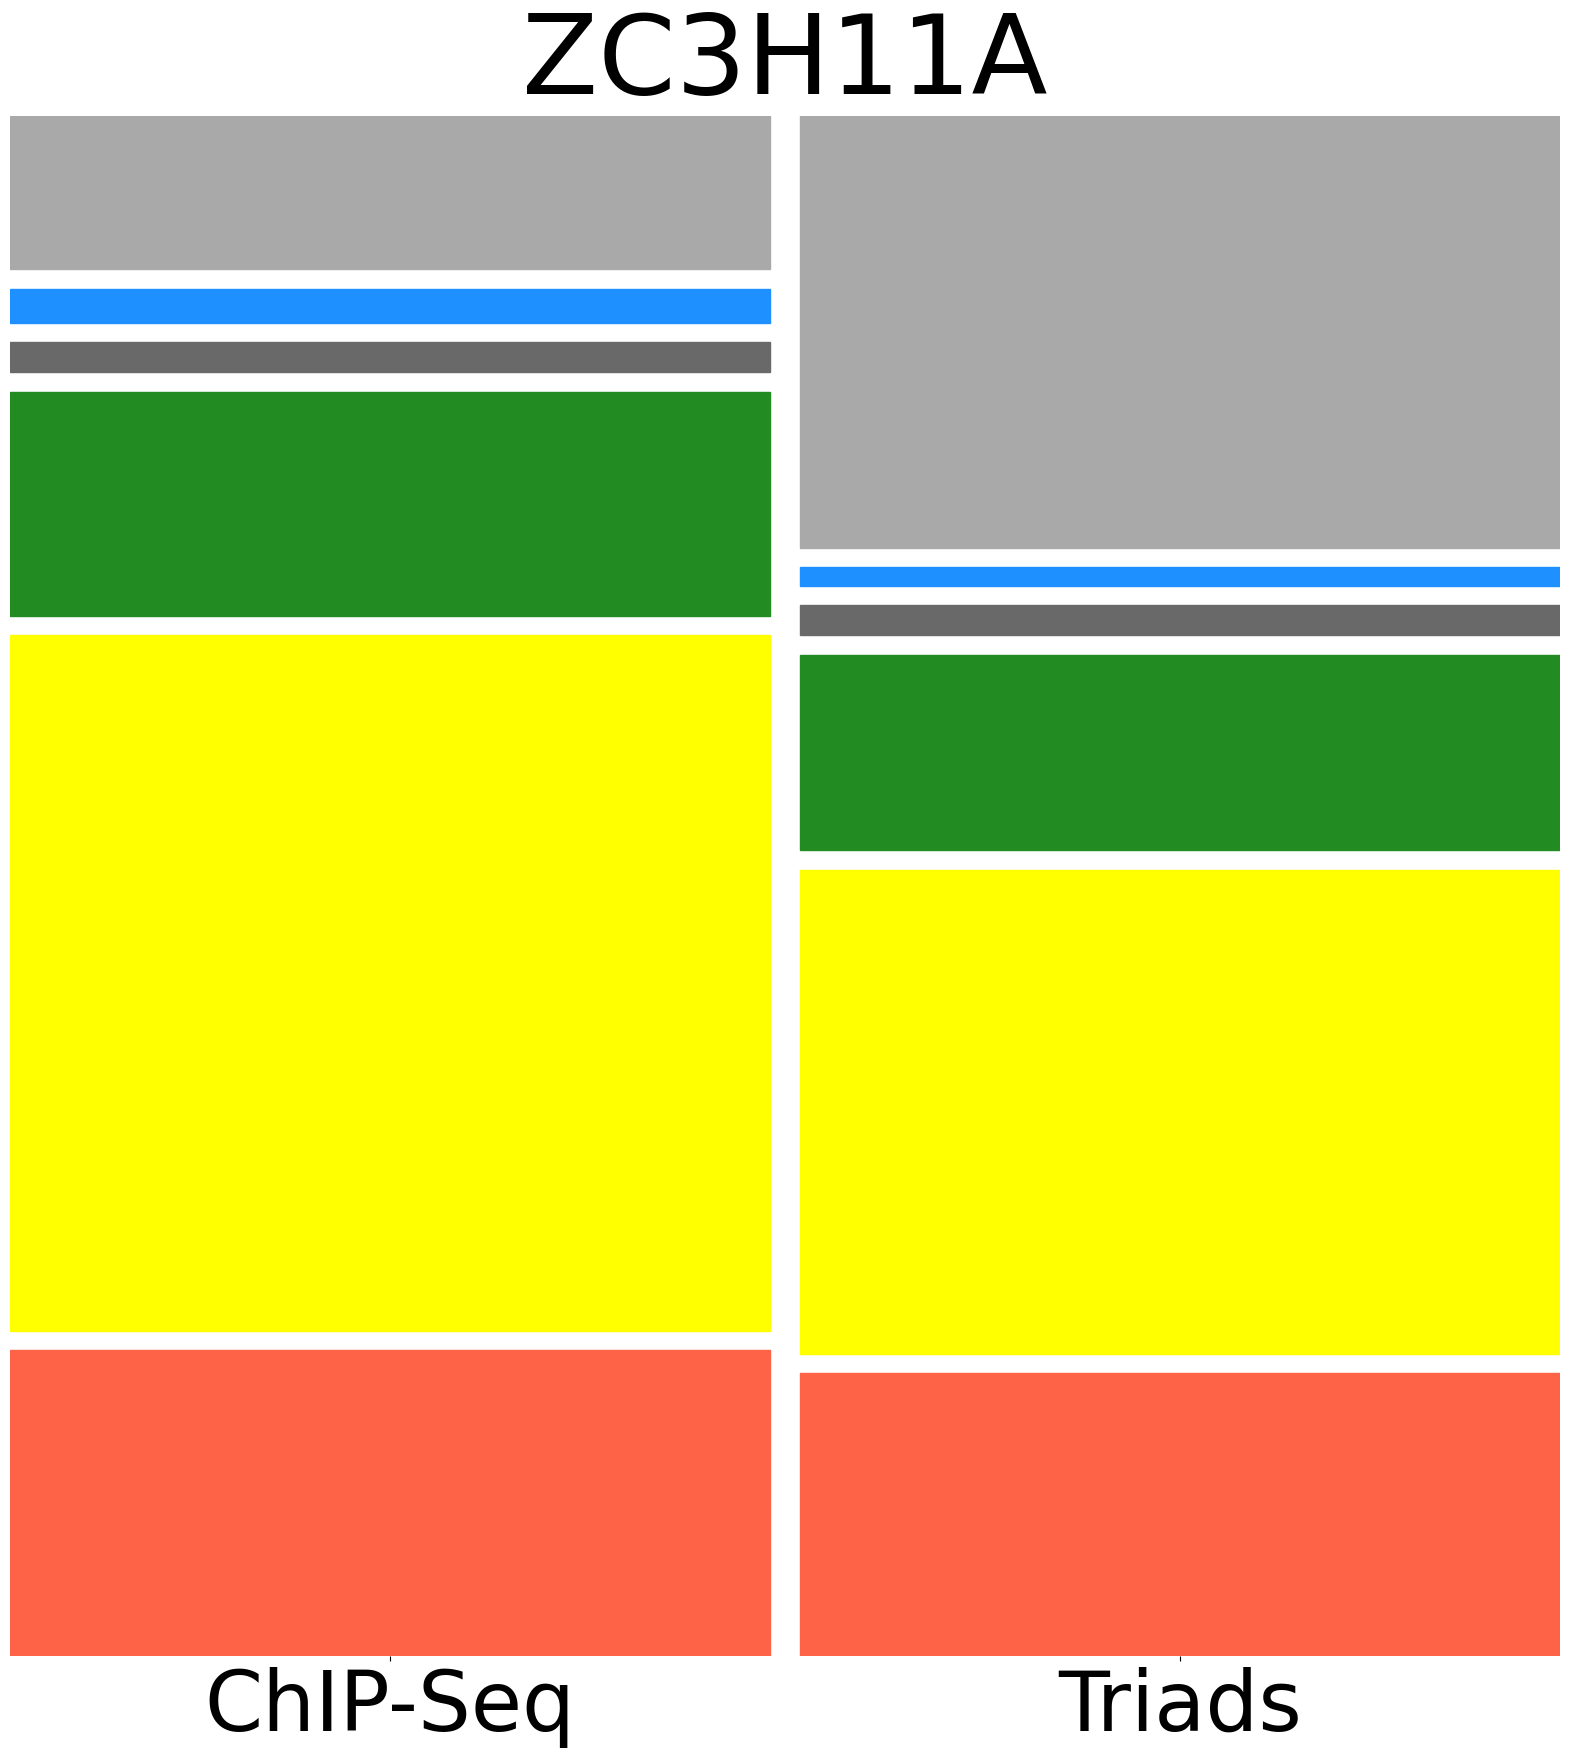

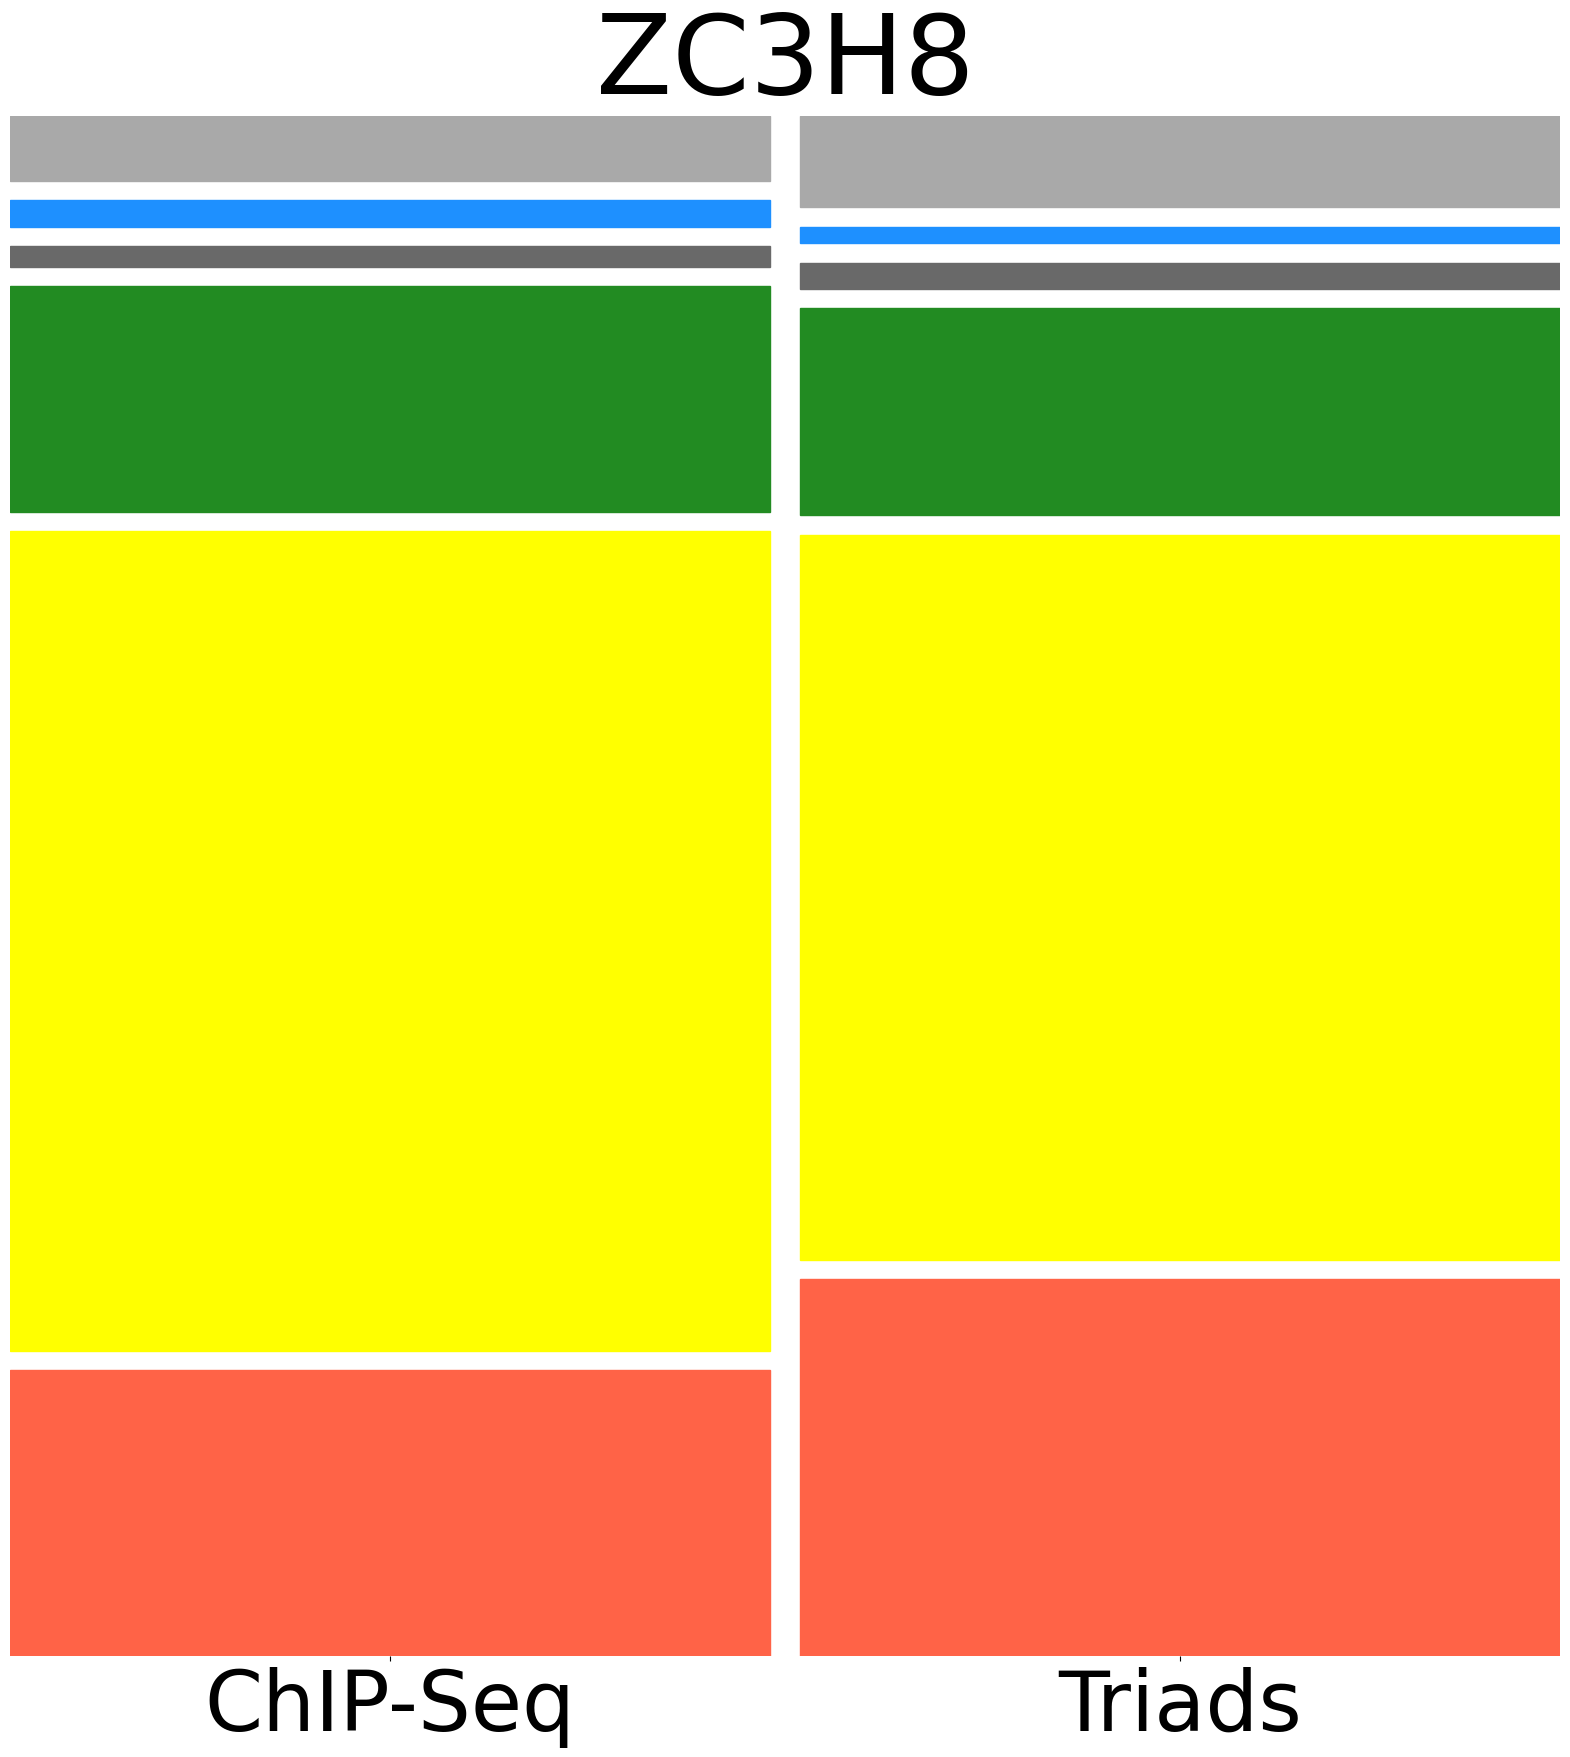

In [7]:
plt.rcParams["xtick.labelbottom"] = True


for i in ["top", "bottom", "left", "right"]:
    plt.rcParams[f"axes.spines.{i}"] = False

plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20

plt.rcParams["figure.figsize"]=(20, 20)


for ind, PROTEIN in tqdm(enumerate(sorted(chip_df.index.unique()))):
    prot = PROTEIN.split('_')[0]
    dt_new = {}
    tmp_dt = chip_df[chip_df.index.str.startswith(prot)].transpose().to_dict()
    triads_tmp = triads[triads.index.str.startswith(prot)].transpose().to_dict()
    for prot, states in sorted(list(tmp_dt.items())):
        for k, v in states.items():
            dt_new[("ChIP-Seq", k)] = v * 10_000_000
    for prot, states in sorted(list(triads_tmp.items())):
        for k, v in states.items():
            dt_new[("TRIAD", k)] = v * 10_000_000
    colors = {"Enhancer":"yellow", "Promoter":"tomato", "Insulator":"dodgerblue", 
              "PRC_Repressed":"dimgray", "HetChrom_CNV":"darkgray", "Transcribed":"forestgreen"}
    props = lambda state : {'color' : colors[state[1]]}
    fig, ax = plt.subplots(figsize=(20,20))
    p = mosaic(dt_new, properties=props, label_rotation=0, gap=0.02, labelizer=lambda k : "", ax=ax)
    ax.set_yticks([])
    ax.set_xticklabels(["ChIP-Seq", "Triads"], fontsize=60)
    plt.title(f"{PROTEIN.split('_')[0]}", fontsize=80)
    plt.savefig(f"pictures/{PROTEIN.split('_')[0]}.svg", transparent=True)

### Для тестов:

In [123]:
dt = {}

for FILE in glob.glob(f"ChromHMM_annotation/ChIP-Seq/WINDOW_2000/*"):
        protein = '_'.join(FILE.split('/')[-1].split('.')[0::2])
        window = FILE.split('/')[-2]
        dt[(protein,window)] = parse_file_to_dt(FILE)
        
chip_df = pd.DataFrame.from_dict(dt).transpose()
chip_df = chip_df.reset_index().rename(columns={"level_0":"PROTEIN", "level_1":"WINDOW"})
del chip_df["WINDOW"]
chip_df = chip_df[chip_df["PROTEIN"].str.endswith("K562")]
chip_df["PROTEIN"] = chip_df.PROTEIN.apply(lambda k: k.split('_')[0])
chip_df = chip_df.set_index("PROTEIN").astype("int")

In [124]:
dt = {}

for FILE in glob.glob(f"ChromHMM_annotation/RNA_WINDOW_100_DNA_WINDOW_2000/*"):
        protein = '_'.join(FILE.split('/')[-1].split('.')[0::2])
        window = FILE.split('/')[-2]
        dt[(protein,window)] = parse_file_to_dt(FILE)
        
triads = pd.DataFrame.from_dict(dt).transpose()
triads = triads.reset_index().rename(columns={"level_0":"PROTEIN", "level_1":"WINDOW"})
del triads["WINDOW"]
triads = triads[triads["PROTEIN"].str.endswith("K562")]
triads["PROTEIN"] = triads.PROTEIN.apply(lambda k: k.split('_')[0])
triads = triads.set_index("PROTEIN").astype("int")

In [154]:
from scipy.stats import chisquare

dt = {}
for PROTEIN in tqdm(sorted(list(chip_df.index))):
    vals_chip = chip_df[chip_df.index == PROTEIN].transpose()[PROTEIN]
    vals_trds = triads[triads.index == PROTEIN].transpose()[PROTEIN]
    vals_chip = vals_chip / vals_chip.sum() * vals_trds.sum() 
    vals_trds = vals_trds / vals_trds.sum() * vals_trds.sum()

    dt[PROTEIN] = {K : V for K, V in zip(["statistic", "p-value"], chisquare(vals_trds, vals_chip))}

  0%|          | 0/47 [00:00<?, ?it/s]

In [165]:
from statsmodels.stats.multitest import fdrcorrection as FDR

df = pd.DataFrame.from_dict(dt).transpose()
df["q-value"] = FDR(df["p-value"])[1]
df.to_csv("test_res.tsv", sep='\t')